In [1]:
# standard data analysis modules
import pandas as pd
import numpy as np

from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.ticker as ticker

from datetime import datetime

import io
import requests

import time

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# check on the panda version and its dependencies
#pd.__version__
#pd.show_versions()

In [3]:
# to read a directory on my PC
import glob # not used in this code, data taken direct from government website

In [4]:
# to take dates from file names and convert currency columns to integers
import re # actually, i dont use that in this code

In [5]:
# to prepare the powerpoint presentation
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.enum.text import MSO_ANCHOR
from pptx.enum.dml import MSO_FILL
from pptx.dml.color import RGBColor

In [6]:
# Presentation preperation and image saving

# toggle to switch on image saving: 0 = off, 1 = on (i.e.save images and also slide titles)
savePNG = 0

# toggle to switch on powerpoint preparation: 0 = off, 1 = on (automatically saves the images also)
PwrptPrep = 1

# list of slide titles, text and images to add
monthNow = ''
presentationTitle = ['Covid UK data visualisation', 'Andrew Neville']
saveFileName = 'presentationPrep - coviduk.pptx'
slideTitle = []
slideText = []
imagePath = []

In [7]:
# download direct from the UK government website

def load_from_website(url):
    
    #url="https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
    s=requests.get(url).content
    c=pd.read_csv(io.StringIO(s.decode('utf-8')))
    
    return c

In [8]:
# delay each download by 10 seconds to abide by fair use policy

url_list = [
'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesBySpecimenDate%22:%22newCasesBySpecimenDate%22,%22cumCasesBySpecimenDate%22:%22cumCasesBySpecimenDate%22%7D&format=csv',
'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newDeaths28DaysByDeathDate%22:%22newDeaths28DaysByDeathDate%22,%22cumDeaths28DaysByDeathDate%22:%22cumDeaths28DaysByDeathDate%22%7D&format=csv',
'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newAdmissions%22:%22newAdmissions%22,%22cumAdmissions%22:%22cumAdmissions%22%7D&format=csv',
'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22hospitalCases%22:%22hospitalCases%22%7D&format=csv',
'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22covidOccupiedMVBeds%22:%22covidOccupiedMVBeds%22%7D&format=csv',
'https://coronavirus.data.gov.uk/api/v1/data?filters=areaName=United%2520Kingdom;areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newVirusTests%22:%22newVirusTests%22,%22cumVirusTests%22:%22cumVirusTests%22%7D&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newCasesBySpecimenDateAgeDemographics&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=newCasesBySpecimenDateAgeDemographics&metric=newDeaths28DaysByDeathDateAgeDemographics&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=cumAdmissionsByAge&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=cumPeopleVaccinatedFirstDoseByVaccinationDate&metric=cumPeopleVaccinatedSecondDoseByVaccinationDate&metric=weeklyPeopleVaccinatedFirstDoseByVaccinationDate&metric=weeklyPeopleVaccinatedSecondDoseByVaccinationDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000004&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',    
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000006&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000007&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000001&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000001&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000008&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000009&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000005&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000003&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',   
            ]

i=0
sleep_time = 10

df_cases = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_deaths = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_hospital_a = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_hospital_t = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_hospital_v = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_testing = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_casesAge = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_eng_cd = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_eng_cumadmissionsbyage = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_vac = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_EM = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_EE = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_LO = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_NE = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_NW = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_SE = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_SW = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_WM = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1

df_YH = load_from_website(url_list[i])
time.sleep(sleep_time)
i=i+1


In [9]:
# sort all dataframes by date

df_cases = df_cases.sort_values('date').reset_index(drop=True)
df_deaths = df_deaths.sort_values('date').reset_index(drop=True)
df_hospital_a = df_hospital_a.sort_values('date').reset_index(drop=True)
df_hospital_t = df_hospital_t.sort_values('date').reset_index(drop=True)
df_hospital_v = df_hospital_v.sort_values('date').reset_index(drop=True)
df_testing = df_testing.sort_values('date').reset_index(drop=True)
df_casesAge = df_casesAge.sort_values('date').reset_index(drop=True)
df_eng_cd = df_eng_cd.sort_values('date').reset_index(drop=True)
df_eng_cumadmissionsbyage = df_eng_cumadmissionsbyage.sort_values('date').reset_index(drop=True)
df_vac = df_vac.sort_values('date').reset_index(drop=True)
df_EM = df_EM.sort_values('date').reset_index(drop=True)
df_EE = df_EE.sort_values('date').reset_index(drop=True)
df_LO = df_LO.sort_values('date').reset_index(drop=True)
df_NE = df_NE.sort_values('date').reset_index(drop=True)
df_NW = df_NW.sort_values('date').reset_index(drop=True)
df_SE = df_SE.sort_values('date').reset_index(drop=True)
df_SW = df_SW.sort_values('date').reset_index(drop=True)
df_WM = df_WM.sort_values('date').reset_index(drop=True)
df_YH = df_YH.sort_values('date').reset_index(drop=True)


In [10]:
df_casesAge.tail()

date  areaType   areaCode        areaName  \
7673  2021-01-12  overview  K02000001  United Kingdom   
7674  2021-01-12  overview  K02000001  United Kingdom   
7675  2021-01-12  overview  K02000001  United Kingdom   
7676  2021-01-12  overview  K02000001  United Kingdom   
7677  2021-01-12  overview  K02000001  United Kingdom   

                                     metric         age  cases  rollingRate  \
7673  newCasesBySpecimenDateAgeDemographics  unassigned     49          NaN   
7674  newCasesBySpecimenDateAgeDemographics         60+   8658        355.4   
7675  newCasesBySpecimenDateAgeDemographics       00_59  35310        484.5   
7676  newCasesBySpecimenDateAgeDemographics       55_59   3468        516.9   
7677  newCasesBySpecimenDateAgeDemographics       00_04    974        160.1   

      rollingSum  
7673         293  
7674       57327  
7675      245468  
7676       22776  
7677        6175

In [11]:
# # function to create dataframes

# def create_dataframe(file_name):
       
#     #upload the files to seperate dataframes   
#     file = str(folder[0]) + '/' + str(file_name) + '.csv'
       
#     # recognise the date column as a date
#     try:
#         dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')
#         df = pd.read_csv(file, parse_dates={'datetime': ['date']}, date_parser=dateparse)
#     except:
#         dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
#         df = pd.read_csv(file, parse_dates={'datetime': ['date']}, date_parser=dateparse)
    
#     df = df.sort_values(by=['datetime']).reset_index(drop=True)
    
#     return df    

In [12]:
# read the deaths by ages excel file

url = 'https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fweeklyprovisionalfiguresondeathsregisteredinenglandandwales%2f2020/publishedweek532020.xlsx'

s=requests.get(url).content
df_deathsAges = pd.read_excel(io.BytesIO(s),
                              nrows = 25, header = 5, sheet_name='Covid-19 - Weekly occurrences')

df_deathsAges_all = pd.read_excel(io.BytesIO(s),
                              nrows = 35, header = 5, sheet_name='Weekly figures 2020')

In [13]:
# sources

# df_deathsAges
# https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales
# https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fweeklyprovisionalfiguresondeathsregisteredinenglandandwales%2f2020/publishedweek532020.xlsx

In [14]:
df_deathsAges = df_deathsAges.drop([0,1,2,3,4]).reset_index(drop=True)
df_deathsAges.drop(['Week ended'], axis=1, inplace=True)
df_deathsAges.rename(columns={"Unnamed: 1": "age"}, inplace=True)

In [15]:
df_deathsAges_all[0:5]

Week ended Unnamed: 1  \
0                                                NaN        NaN   
1                                                NaN        NaN   
2                             Total deaths, all ages        NaN   
3             Total deaths: average of corresponding        NaN   
4  week over the previous 5 years 1, 10, 11 (Engl...        NaN   

   2020-01-03 00:00:00  2020-01-10 00:00:00  2020-01-17 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              12254.0              14058.0              12990.0   
3                  NaN                  NaN                  NaN   
4              12175.0              13822.0              13216.0   

   2020-01-24 00:00:00  2020-01-31 00:00:00  2020-02-07 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              11856.0              11612.0              10986.0   
3                  NaN                  NaN                  NaN   
4              12760.0              12206.0              11925.0   

   2020-02-14 00:00:00  2020-02-21 00:00:00  2020-02-28 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              10944.0              10841.0              10816.0   
3                  NaN                  NaN                  NaN   
4              11627.0              11548.0              11183.0   

   2020-03-06 00:00:00  2020-03-13 00:00:00  2020-03-20 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              10895.0              11019.0              10645.0   
3                  NaN                  NaN                  NaN   
4              11498.0              11205.0              10573.0   

   2020-03-27 00:00:00  2020-04-03 00:00:00  2020-04-10 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              11141.0              16387.0              18516.0   
3                  NaN                  NaN                  NaN   
4              10130.0              10305.0              10520.0   

   2020-04-17 00:00:00  2020-04-24 00:00:00  2020-05-01 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              22351.0              21997.0              17953.0   
3                  NaN                  NaN                  NaN   
4              10497.0              10458.0               9941.0   

   2020-05-08 00:00:00  2020-05-15 00:00:00  2020-05-22 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2              12657.0              14573.0              12288.0   
3                  NaN                  NaN                  NaN   
4               9576.0              10188.0               9940.0   

   2020-05-29 00:00:00  2020-06-05 00:00:00  2020-06-12 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2               9824.0              10709.0               9976.0   
3                  NaN                  NaN                  NaN   
4               8171.0               9977.0               9417.0   

   2020-06-19 00:00:00  2020-06-26 00:00:00  2020-07-03 00:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2               9339.0               8979.0               9140.0   
3                  NaN                  NaN                  NaN   
4               9404.0     

In [16]:
df_deathsAges_all_totals = df_deathsAges_all.loc[[2,4]].reset_index(drop=True)

In [17]:
df_deathsAges_all = df_deathsAges_all.loc[15:].reset_index(drop=True)
df_deathsAges_all.drop(['Week ended'], axis=1, inplace=True)
df_deathsAges_all.rename(columns={"Unnamed: 1": "age"}, inplace=True)

In [18]:
# convert column headers from datetime to dates strings
# drop surplus columns at end

df_deathsAges.columns = df_deathsAges.columns.astype(str)
col_list = df_deathsAges.columns.tolist()

col_names = []
endcol = 999
for i in range(len(col_list)):
    if len(col_list[i]) > 10:
        col_names.append(col_list[i][:10])
    else:
        col_names.append(col_list[i])
        if i > 0:
            endcol = i

df_deathsAges = df_deathsAges.drop(df_deathsAges.columns[endcol:],axis=1)
df_deathsAges.columns = col_names[0:endcol]

In [19]:
df_deathsAges.tail()

age  2020-01-03  2020-01-10  2020-01-17  2020-01-24  2020-01-31  \
15  70-74         0.0         0.0         0.0         0.0         0.0   
16  75-79         0.0         0.0         0.0         0.0         0.0   
17  80-84         0.0         0.0         0.0         0.0         1.0   
18  85-89         0.0         0.0         0.0         0.0         0.0   
19    90+         0.0         0.0         0.0         0.0         0.0   

    2020-02-07  2020-02-14  2020-02-21  2020-02-28  2020-03-06  2020-03-13  \
15         0.0         0.0         0.0         0.0         1.0         6.0   
16         0.0         0.0         0.0         0.0         3.0         2.0   
17         0.0         0.0         0.0         0.0         1.0         8.0   
18         0.0         0.0         0.0         0.0         0.0         8.0   
19         0.0         0.0         0.0         0.0         1.0         7.0   

    2020-03-20  2020-03-27  2020-04-03  2020-04-10  2020-04-17  2020-04-24  \
15        40.0       217.0       600.0       864.0       788.0       582.0   
16        46.0       291.0       813.0      1228.0      1090.0       848.0   
17        74.0       355.0      1014.0      1579.0      1569.0      1332.0   
18        84.0       335.0       867.0      1534.0      1734.0      1471.0   
19        68.0       273.0       793.0      1429.0      1715.0      1642.0   

    2020-05-01  2020-05-08  2020-05-15  2020-05-22  2020-05-29  2020-06-05  \
15       396.0       342.0       202.0       187.0       139.0       111.0   
16       674.0       477.0       347.0       278.0       206.0       163.0   
17       990.0       714.0       545.0       420.0       358.0       256.0   
18      1118.0       902.0       652.0       533.0       394.0       284.0   
19      1342.0      1046.0       768.0       611.0       456.0       334.0   

    2020-06-12  2020-06-19  2020-06-26  2020-07-03  2020-07-10  2020-07-17  \
15        68.0        70.0        48.0        37.0        34.0        32.0   
16       119.0        88.0        80.0        57.0        39.0        33.0   
17       198.0       129.0       122.0        85.0        63.0        41.0   
18       210.0       143.0       118.0        91.0        65.0        43.0   
19       237.0       158.0       145.0       100.0        88.0        51.0   

    2020-07-24  2020-07-31  2020-08-07  2020-08-14  2020-08-21  2020-08-28  \
15        15.0        14.0        14.0        10.0         5.0         6.0   
16        27.0        23.0        15.0        25.0        14.0         9.0   
17        34.0        35.0        24.0        29.0        24.0        18.0   
18        47.0        27.0        23.0        31.0        23.0        17.0   
19        39.0        36.0        33.0        26.0        12.0        19.0   

    2020-09-04  2020-09-11  2020-09-18  2020-09-25  2020-10-02  2020-10-09  \
15         9.0        10.0        13.0        27.0        52.0        53.0   
16        11.0        19.0        22.0        30.0        59.0        87.0   
17        11.0        15.0        33.0        43.0        78.0       104.0   
18        14.0        18.0        46.0        42.0        65.0        95.0   
19        15.0        20.0        27.0        54.0        68.0        99.0   

    2020-10-16  2020-10-23  2020-10-30  2020-11-06  2020-11-13  2020-11-20  \
15        89.0       142.0       171.0       224.0       284.0       275.0   
16       118.0       217.0       260.0       315.0       366.0       438.0   
17       152.0       238.0       341.0       467.0       511.0       553.0   
18       140.0       250.0       341.0       416.0       540.0       606.0   
19       151.0       218.0       330.0       446.0       504.0       609.0   

    2020-11-27  2020-12-04  2020-12-11  2020-12-18  2020-12-25  2021-01-01  
15       314.0       282.0       235.0       276.0       358.0       327.0  
16       436.0       431.0       404.0       411.0       455.0       466.0  
17       560.0       519.0       494.0       617.0   

In [20]:
# convert column headers from datetime to dates strings
# drop surplus columns at end

df_deathsAges_all.columns = df_deathsAges_all.columns.astype(str)
col_list = df_deathsAges_all.columns.tolist()

col_names = []
endcol = 999
for i in range(len(col_list)):
    if len(col_list[i]) > 10:
        col_names.append(col_list[i][:10])
    else:
        col_names.append(col_list[i])
        if i > 0:
            endcol = i

df_deathsAges_all = df_deathsAges_all.drop(df_deathsAges_all.columns[endcol:],axis=1)
df_deathsAges_all.columns = col_names[0:endcol]

In [21]:
df_deathsAges_all.dropna(axis=1, how='all', inplace=True)

In [22]:
df_deathsAges_all.head()

age  2020-01-03  2020-01-10  2020-01-17  2020-01-24  2020-01-31  \
0     <1        48.0        50.0        69.0        53.0        50.0   
1    1-4         8.0         9.0         7.0         9.0         6.0   
2    5-9         4.0         8.0         5.0         4.0         5.0   
3  10-14         4.0         9.0         4.0         8.0         4.0   
4  15-19         6.0        16.0        10.0        15.0        23.0   

   2020-02-07  2020-02-14  2020-02-21  2020-02-28  2020-03-06  2020-03-13  \
0        30.0        43.0        51.0        49.0        56.0        53.0   
1         8.0         6.0         5.0         7.0        11.0        13.0   
2         4.0         2.0         6.0         6.0         2.0         3.0   
3         4.0         4.0         7.0         7.0         7.0         6.0   
4        10.0        16.0        20.0        24.0        21.0        18.0   

   2020-03-20  2020-03-27  2020-04-03  2020-04-10  2020-04-17  2020-04-24  \
0        44.0        49.0        51.0        38.0        51.0        54.0   
1         2.0         8.0         8.0         6.0         6.0         6.0   
2         6.0         1.0         5.0         4.0         5.0         3.0   
3         4.0         4.0         8.0         4.0         4.0         3.0   
4        15.0        12.0         9.0         8.0        20.0        11.0   

   2020-05-01  2020-05-08  2020-05-15  2020-05-22  2020-05-29  2020-06-05  \
0        48.0        28.0        56.0        51.0        40.0        44.0   
1         8.0         6.0        10.0         4.0         6.0         4.0   
2         0.0         4.0         5.0         5.0         3.0         4.0   
3         3.0        10.0         4.0         7.0         5.0         8.0   
4        14.0         9.0        13.0        13.0         7.0        10.0   

   2020-06-12  2020-06-19  2020-06-26  2020-07-03  2020-07-10  2020-07-17  \
0        44.0        48.0        47.0        47.0        58.0        35.0   
1         4.0        10.0         4.0         7.0         3.0         6.0   
2         2.0         5.0         4.0         2.0         2.0         4.0   
3         5.0         4.0         3.0         4.0         5.0         0.0   
4        10.0         9.0         2.0        14.0        11.0        10.0   

   2020-07-24  2020-07-31  2020-08-07  2020-08-14  2020-08-21  2020-08-28  \
0        49.0        45.0        44.0        50.0        49.0        38.0   
1         3.0        11.0         4.0         5.0         7.0         5.0   
2         5.0         5.0         5.0         2.0         4.0         7.0   
3         4.0         3.0         6.0         8.0         5.0         6.0   
4         9.0        12.0        13.0        12.0        14.0        14.0   

   2020-09-04  2020-09-11  2020-09-18  2020-09-25  2020-10-02  2020-10-09  \
0        29.0        39.0        36.0        45.0        47.0        45.0   
1         3.0         6.0         4.0         7.0         3.0         6.0   
2         2.0         5.0         4.0         3.0         3.0         5.0   
3         5.0         3.0         7.0         7.0        10.0         6.0   
4         7.0        15.0        15.0        13.0        12.0        12.0   

   2020-10-16  2020-10-23  2020-10-30  2020-11-06  2020-11-13  2020-11-20  \
0        41.0        34.0        31.0        43.0        45.0        54.0   
1         6.0         2.0         6.0         6.0         8.0        11.0   
2         4.0         7.0         2.0         2.0         7.0         6.0   
3         3.0         5.0         5.0         4.0         3.0         4.0   
4        15.0        14.0        15.0        12.0         7.0        17.0   

   2020-11-27  2020-12-04  2020-12-11  2020-12-18  2020-12-25  2021-01-01  
0        44.0        50.0        45.0        46.0        33.0        32.0  
1         7.0         4.0         3.0         5.0         7.0         4.0  
2         5.0         3.0        11.0         4.0         5.0         1.0  
3         5.0         8.0  

In [23]:
# # uploading the files from my pc


# # build a list of all the folders

# folder = []
# folder = glob.glob("C:/Users/andre/OneDrive/Documents/Covid UK")

# files_list = ['casesbyspec', 'deaths']


In [24]:
df_deathsAges_all_totals.head()

Week ended Unnamed: 1  \
0                             Total deaths, all ages        NaN   
1  week over the previous 5 years 1, 10, 11 (Engl...        NaN   

   2020-01-03 00:00:00  2020-01-10 00:00:00  2020-01-17 00:00:00  \
0              12254.0              14058.0              12990.0   
1              12175.0              13822.0              13216.0   

   2020-01-24 00:00:00  2020-01-31 00:00:00  2020-02-07 00:00:00  \
0              11856.0              11612.0              10986.0   
1              12760.0              12206.0              11925.0   

   2020-02-14 00:00:00  2020-02-21 00:00:00  2020-02-28 00:00:00  \
0              10944.0              10841.0              10816.0   
1              11627.0              11548.0              11183.0   

   2020-03-06 00:00:00  2020-03-13 00:00:00  2020-03-20 00:00:00  \
0              10895.0              11019.0              10645.0   
1              11498.0              11205.0              10573.0   

   2020-03-27 00:00:00  2020-04-03 00:00:00  2020-04-10 00:00:00  \
0              11141.0              16387.0              18516.0   
1              10130.0              10305.0              10520.0   

   2020-04-17 00:00:00  2020-04-24 00:00:00  2020-05-01 00:00:00  \
0              22351.0              21997.0              17953.0   
1              10497.0              10458.0               9941.0   

   2020-05-08 00:00:00  2020-05-15 00:00:00  2020-05-22 00:00:00  \
0              12657.0              14573.0              12288.0   
1               9576.0              10188.0               9940.0   

   2020-05-29 00:00:00  2020-06-05 00:00:00  2020-06-12 00:00:00  \
0               9824.0              10709.0               9976.0   
1               8171.0               9977.0               9417.0   

   2020-06-19 00:00:00  2020-06-26 00:00:00  2020-07-03 00:00:00  \
0               9339.0               8979.0               9140.0   
1               9404.0               9293.0               9183.0   

   2020-07-10 00:00:00  2020-07-17 00:00:00  2020-07-24 00:00:00  \
0               8690.0               8823.0               8891.0   
1               9250.0               9093.0               9052.0   

   2020-07-31 00:00:00  2020-08-07 00:00:00  2020-08-14 00:00:00  \
0               8946.0               8945.0               9392.0   
1               9036.0               9102.0               9085.0   

   2020-08-21 00:00:00  2020-08-28 00:00:00  2020-09-04 00:00:00  \
0               9631.0               9032.0               7739.0   
1               9157.0               8241.0               9182.0   

   2020-09-11 00:00:00  2020-09-18 00:00:00  2020-09-25 00:00:00  \
0               9811.0               9523.0               9634.0   
1               9306.0               9264.0               9377.0   

   2020-10-02 00:00:00  2020-10-09 00:00:00  2020-10-16 00:00:00  \
0               9945.0               9954.0              10534.0   
1               9555.0               9811.0               9865.0   

   2020-10-23 00:00:00  2020-10-30 00:00:00  2020-11-06 00:00:00  \
0              10739.0              10887.0              11812.0   
1               9759.0               9891.0              10331.0   

   2020-11-13 00:00:00  2020-11-20 00:00:00  2020-11-27 00:00:00  \
0              12254.0              12535.0              12456.0   
1              10350.0              10380.0              10357.0   

   2020-12-04 00:00:00  2020-12-11 00:00:00  2020-12-18 00:00:00  \
0              12303.0              12292.0              13011.0   
1              10695.0              10750.0              11548.0   

   2020-12-25 00:00:00  2021-01-01 00:00:00  
0              11520.0              10069.0  
1               7954.0               7954.0

In [25]:
df_deathsAges_all_totals.drop(['Unnamed: 1'], axis=1, inplace=True)

In [26]:
# convert column headers from datetime to dates strings
# drop surplus columns at end

df_deathsAges_all_totals.columns = df_deathsAges_all_totals.columns.astype(str)
col_list = df_deathsAges_all_totals.columns.tolist()

col_names = []
endcol = 999
for i in range(len(col_list)):
    if len(col_list[i]) > 10:
        col_names.append(col_list[i][:10])
    else:
        col_names.append(col_list[i])
        if i > 0:
            endcol = i

df_deathsAges_all_totals = df_deathsAges_all_totals.drop(df_deathsAges_all_totals.columns[endcol:],axis=1)
df_deathsAges_all_totals.columns = col_names[0:endcol]

In [27]:
df_deathsAges_all_totals.dropna(axis=1, how='all', inplace=True)

In [28]:
df_deathsAges_all_totals.head()

Week ended  2020-01-03  2020-01-10  \
0                             Total deaths, all ages     12254.0     14058.0   
1  week over the previous 5 years 1, 10, 11 (Engl...     12175.0     13822.0   

   2020-01-17  2020-01-24  2020-01-31  2020-02-07  2020-02-14  2020-02-21  \
0     12990.0     11856.0     11612.0     10986.0     10944.0     10841.0   
1     13216.0     12760.0     12206.0     11925.0     11627.0     11548.0   

   2020-02-28  2020-03-06  2020-03-13  2020-03-20  2020-03-27  2020-04-03  \
0     10816.0     10895.0     11019.0     10645.0     11141.0     16387.0   
1     11183.0     11498.0     11205.0     10573.0     10130.0     10305.0   

   2020-04-10  2020-04-17  2020-04-24  2020-05-01  2020-05-08  2020-05-15  \
0     18516.0     22351.0     21997.0     17953.0     12657.0     14573.0   
1     10520.0     10497.0     10458.0      9941.0      9576.0     10188.0   

   2020-05-22  2020-05-29  2020-06-05  2020-06-12  2020-06-19  2020-06-26  \
0     12288.0      9824.0     10709.0      9976.0      9339.0      8979.0   
1      9940.0      8171.0      9977.0      9417.0      9404.0      9293.0   

   2020-07-03  2020-07-10  2020-07-17  2020-07-24  2020-07-31  2020-08-07  \
0      9140.0      8690.0      8823.0      8891.0      8946.0      8945.0   
1      9183.0      9250.0      9093.0      9052.0      9036.0      9102.0   

   2020-08-14  2020-08-21  2020-08-28  2020-09-04  2020-09-11  2020-09-18  \
0      9392.0      9631.0      9032.0      7739.0      9811.0      9523.0   
1      9085.0      9157.0      8241.0      9182.0      9306.0      9264.0   

   2020-09-25  2020-10-02  2020-10-09  2020-10-16  2020-10-23  2020-10-30  \
0      9634.0      9945.0      9954.0     10534.0     10739.0     10887.0   
1      9377.0      9555.0      9811.0      9865.0      9759.0      9891.0   

   2020-11-06  2020-11-13  2020-11-20  2020-11-27  2020-12-04  2020-12-11  \
0     11812.0     12254.0     12535.0     12456.0     12303.0     12292.0   
1     10331.0     10350.0     10380.0     10357.0     10695.0     10750.0   

   2020-12-18  2020-12-25  2021-01-01  
0     13011.0     11520.0     10069.0  
1     11548.0      7954.0      7954.0

In [29]:
df_temp = pd.merge(df_cases, df_deaths, left_on='date', right_on='date', how='left')
df_temp_1 = pd.merge(df_temp, df_hospital_a, left_on='date', right_on='date', how='left')
df_temp_2 = pd.merge(df_temp_1, df_hospital_t, left_on='date', right_on='date', how='left')
df_temp_3 = pd.merge(df_temp_2, df_hospital_v, left_on='date', right_on='date', how='left')
df_summary = pd.merge(df_temp_3, df_testing, left_on='date', right_on='date', how='left')


In [30]:
df_summary.tail()

areaType_x      areaName_x areaCode_x        date  newCasesBySpecimenDate  \
346   overview  United Kingdom  K02000001  2021-01-10                   36188   
347   overview  United Kingdom  K02000001  2021-01-11                   56263   
348   overview  United Kingdom  K02000001  2021-01-12                   48694   
349   overview  United Kingdom  K02000001  2021-01-13                   44243   
350   overview  United Kingdom  K02000001  2021-01-14                   39131   

     cumCasesBySpecimenDate areaType_y      areaName_y areaCode_y  \
346                 3176184   overview  United Kingdom  K02000001   
347                 3232447   overview  United Kingdom  K02000001   
348                 3281141   overview  United Kingdom  K02000001   
349                 3325384   overview  United Kingdom  K02000001   
350                 3364515   overview  United Kingdom  K02000001   

     newDeaths28DaysByDeathDate  cumDeaths28DaysByDeathDate areaType_x  \
346                       951.0                     84580.0   overview   
347                      1037.0                     85617.0   overview   
348                      1018.0                     86635.0   overview   
349                       963.0                     87598.0   overview   
350                       914.0                     88512.0        NaN   

         areaName_x areaCode_x  newAdmissions  cumAdmissions areaType_y  \
346  United Kingdom  K02000001         3900.0       326604.0   overview   
347  United Kingdom  K02000001         4275.0       330879.0   overview   
348  United Kingdom  K02000001         4534.0       335413.0   overview   
349  United Kingdom  K02000001         4179.0       339592.0   overview   
350             NaN        NaN            NaN            NaN   overview   

         areaName_y areaCode_y  hospitalCases areaType_x      areaName_x  \
346  United Kingdom  K02000001        35272.0   overview  United Kingdom   
347  United Kingdom  K02000001        36630.0   overview  United Kingdom   
348  United Kingdom  K02000001        36847.0   overview  United Kingdom   
349  United Kingdom  K02000001        37336.0   overview  United Kingdom   
350  United Kingdom  K02000001        37475.0   overview  United Kingdom   

    areaCode_x  covidOccupiedMVBeds areaType_y      areaName_y areaCode_y  \
346  K02000001               3264.0   overview  United Kingdom  K02000001   
347  K02000001               3363.0   overview  United Kingdom  K02000001   
348  K02000001               3496.0   overview  United Kingdom  K02000001   
349  K02000001               3626.0   overview  United Kingdom  K02000001   
350  K02000001               3672.0   overview  United Kingdom  K02000001   

     newVirusTests  cumVirusTests  
346       485874.0     57747184.0  
347       536947.0     58297536.0  
348       584760.0     58891289.0  
349       628556.0     59538320.0  
350       695148.0     60242686.0

In [31]:
df_summary.head(10)

areaType_x      areaName_x areaCode_x        date  newCasesBySpecimenDate  \
0   overview  United Kingdom  K02000001  2020-01-30                       2   
1   overview  United Kingdom  K02000001  2020-01-31                       1   
2   overview  United Kingdom  K02000001  2020-02-01                       1   
3   overview  United Kingdom  K02000001  2020-02-02                       0   
4   overview  United Kingdom  K02000001  2020-02-03                       0   
5   overview  United Kingdom  K02000001  2020-02-04                       0   
6   overview  United Kingdom  K02000001  2020-02-05                       1   
7   overview  United Kingdom  K02000001  2020-02-06                       0   
8   overview  United Kingdom  K02000001  2020-02-07                       0   
9   overview  United Kingdom  K02000001  2020-02-08                       4   

   cumCasesBySpecimenDate areaType_y areaName_y areaCode_y  \
0                       2        NaN        NaN        NaN   
1                       3        NaN        NaN        NaN   
2                       4        NaN        NaN        NaN   
3                       4        NaN        NaN        NaN   
4                       4        NaN        NaN        NaN   
5                       4        NaN        NaN        NaN   
6                       5        NaN        NaN        NaN   
7                       5        NaN        NaN        NaN   
8                       5        NaN        NaN        NaN   
9                       9        NaN        NaN        NaN   

   newDeaths28DaysByDeathDate  cumDeaths28DaysByDeathDate areaType_x  \
0                         NaN                         NaN        NaN   
1                         NaN                         NaN        NaN   
2                         NaN                         NaN        NaN   
3                         NaN                         NaN        NaN   
4                         NaN                         NaN        NaN   
5                         NaN                         NaN        NaN   
6                         NaN                         NaN        NaN   
7                         NaN                         NaN        NaN   
8                         NaN                         NaN        NaN   
9                         NaN                         NaN        NaN   

  areaName_x areaCode_x  newAdmissions  cumAdmissions areaType_y areaName_y  \
0        NaN        NaN            NaN            NaN        NaN        NaN   
1        NaN        NaN            NaN            NaN        NaN        NaN   
2        NaN        NaN            NaN            NaN        NaN        NaN   
3        NaN        NaN            NaN            NaN        NaN        NaN   
4        NaN        NaN            NaN            NaN        NaN        NaN   
5        NaN        NaN            NaN            NaN        NaN        NaN   
6        NaN        NaN            NaN            NaN        NaN        NaN   
7        NaN        NaN            NaN            NaN        NaN        NaN   
8        NaN        NaN            NaN            NaN        NaN        NaN   
9        NaN        NaN            NaN            NaN        NaN        NaN   

  areaCode_y  hospitalCases areaType_x areaName_x areaCode_x  \
0        NaN            NaN        NaN        NaN        NaN   
1        NaN            NaN        NaN        NaN        NaN   
2        NaN            NaN        NaN        NaN        NaN   
3        NaN            NaN        NaN        NaN        NaN   
4        NaN            NaN        NaN        NaN        NaN   
5        NaN            NaN        NaN        NaN        NaN   
6        NaN            NaN        NaN        NaN        NaN   
7        NaN            NaN        NaN        NaN        NaN   
8        NaN            NaN        NaN        NaN        NaN   
9        NaN            NaN        NaN        NaN        NaN   

   covidOccupiedMVBeds areaType_y areaName_y areaCode_y  newVirusTests  \
0      

In [32]:
#df_summary['date'] = df_summary['datetime'].dt.strftime('%d-%m-%Y')

In [33]:
# for the presentation
monthNow = df_summary['date'].iloc[-1]
presentationTitle.append(monthNow)
monthNow

'2021-01-14'

In [34]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('The most uptodate daily data: Tests, Cases, Hospitalisations, Deaths')
    slideText.append('')
    imagePath.append('')

plt.show()

In [35]:
cols_keep = ['date','newCasesBySpecimenDate','cumCasesBySpecimenDate','newDeaths28DaysByDeathDate',
             'cumDeaths28DaysByDeathDate','newAdmissions','cumAdmissions','hospitalCases','covidOccupiedMVBeds',
            'newVirusTests','cumVirusTests']

In [36]:
df_summary=df_summary[cols_keep]

In [37]:
df_summary.tail()

date  newCasesBySpecimenDate  cumCasesBySpecimenDate  \
346  2021-01-10                   36188                 3176184   
347  2021-01-11                   56263                 3232447   
348  2021-01-12                   48694                 3281141   
349  2021-01-13                   44243                 3325384   
350  2021-01-14                   39131                 3364515   

     newDeaths28DaysByDeathDate  cumDeaths28DaysByDeathDate  newAdmissions  \
346                       951.0                     84580.0         3900.0   
347                      1037.0                     85617.0         4275.0   
348                      1018.0                     86635.0         4534.0   
349                       963.0                     87598.0         4179.0   
350                       914.0                     88512.0            NaN   

     cumAdmissions  hospitalCases  covidOccupiedMVBeds  newVirusTests  \
346       326604.0        35272.0               3264.0       485874.0   
347       330879.0        36630.0               3363.0       536947.0   
348       335413.0        36847.0               3496.0       584760.0   
349       339592.0        37336.0               3626.0       628556.0   
350            NaN        37475.0               3672.0       695148.0   

     cumVirusTests  
346     57747184.0  
347     58297536.0  
348     58891289.0  
349     59538320.0  
350     60242686.0

In [38]:
# add new columns

df_summary['%_on_ventilation'] = df_summary['covidOccupiedMVBeds'] / df_summary['hospitalCases']
df_summary['%_positive_tests'] = (df_summary['newCasesBySpecimenDate'].rolling(5).mean() 
                                  / df_summary['newVirusTests'].rolling(5).mean())


In [39]:
# leaving hospital

leaving_hospital = []

in_hospital_start = [0] + df_summary['hospitalCases'][:-1].tolist()
in_hospital_end = df_summary['hospitalCases'].tolist()
new_in_hospital = df_summary['newAdmissions'].tolist()
new_deaths = df_summary['newDeaths28DaysByDeathDate'].tolist()

for i in range(len(in_hospital_start)):
    leaving_hospital.append(in_hospital_start[i] + new_in_hospital[i] - new_deaths[i] - in_hospital_end[i])
    
df_summary['leaving_hospital'] = leaving_hospital

In [40]:
df_summary['leavers_%_admissions'] = (df_summary['leaving_hospital'].rolling(5).mean() 
                                      / df_summary['newAdmissions'].rolling(5).mean())

df_summary['newAdmissions%_inHospital'] = (df_summary['newAdmissions'].rolling(5).mean() 
                                      / df_summary['hospitalCases'].rolling(5).mean())
df_summary['leavers_%_inHospital'] = (df_summary['leaving_hospital'].rolling(5).mean() 
                                      / df_summary['hospitalCases'].rolling(5).mean())

df_summary['deaths_%_vent'] = (df_summary['newDeaths28DaysByDeathDate'].rolling(5).mean() 
                                      / df_summary['covidOccupiedMVBeds'].rolling(5).mean())

In [41]:
def one_chart(column, chart_title, bar, percent):

    # plot 1 chart showing the % value  of STCs/STCM to total resi units on the site

    fig, ax = plt.subplots(figsize=(25,10))

    plt.subplots_adjust(hspace=0.6, wspace=0.2)

    x = df_summary.index.values

    labels = list(df_summary['date'])

    # prevent x-axis labels from overlapping by printing every nth label
    for i in range(4,len(labels),4):
        labels[i-1], labels[i-2], labels[i-3]='','',''

    labels[len(labels)-1]=list(df_summary['date'])[-1]
    labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

    y1 = df_summary[column]
    #y2 = df_rightmove['STCs_value_scdhd']/df_rightmove['resi_value_scdhd']
    #y3 = df_rightmove['STCs_value_new']/df_rightmove['resi_value_new']

    ax.set_title(chart_title, fontsize=25)
    ax.set_xticklabels(labels, rotation=90, fontsize=12)
    ax.set_xticks(x)
    
    if percent == 1:
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    
    ax.yaxis.set_tick_params(labelsize=15)
    
    if bar == 1:
        ax.bar(x, y1)
    else:
        ax.plot(x, y1)
        
    #ax.plot(x, y2)
    #ax.plot(x, y3)
    #ax.legend(('New Cases by Specimen Date'),fontsize=20)

    # if savePNG == 1 or PwrptPrep == 1:
    #     savefig = 'Rightmove LD - STCs and STCMs as a % of all resi sale units.png'
    #     plt.savefig(savefig, bbox_inches = 'tight')    
    #     slideTitle.append('Weekly offers on the site as a % of all units')
    #     slideText.append(str(first_data) + ' to '+ str(monthNow))
    #     imagePath.append(savefig)

    start_date = df_summary['date'].iloc[0]
    end_date = df_summary['date'].iloc[-1]
    
    fileName = 'Coviduk - onechart ' + str(chart_title) + '.png'  

    plt.savefig(fileName, bbox_inches = 'tight')
    
    slideTitle_ = chart_title
    slideText_ = (str(start_date) + ' to ' + str(end_date))
    imagePath_ = (fileName)  
    
    plt.show()
    
    return slideTitle_, slideText_, imagePath_

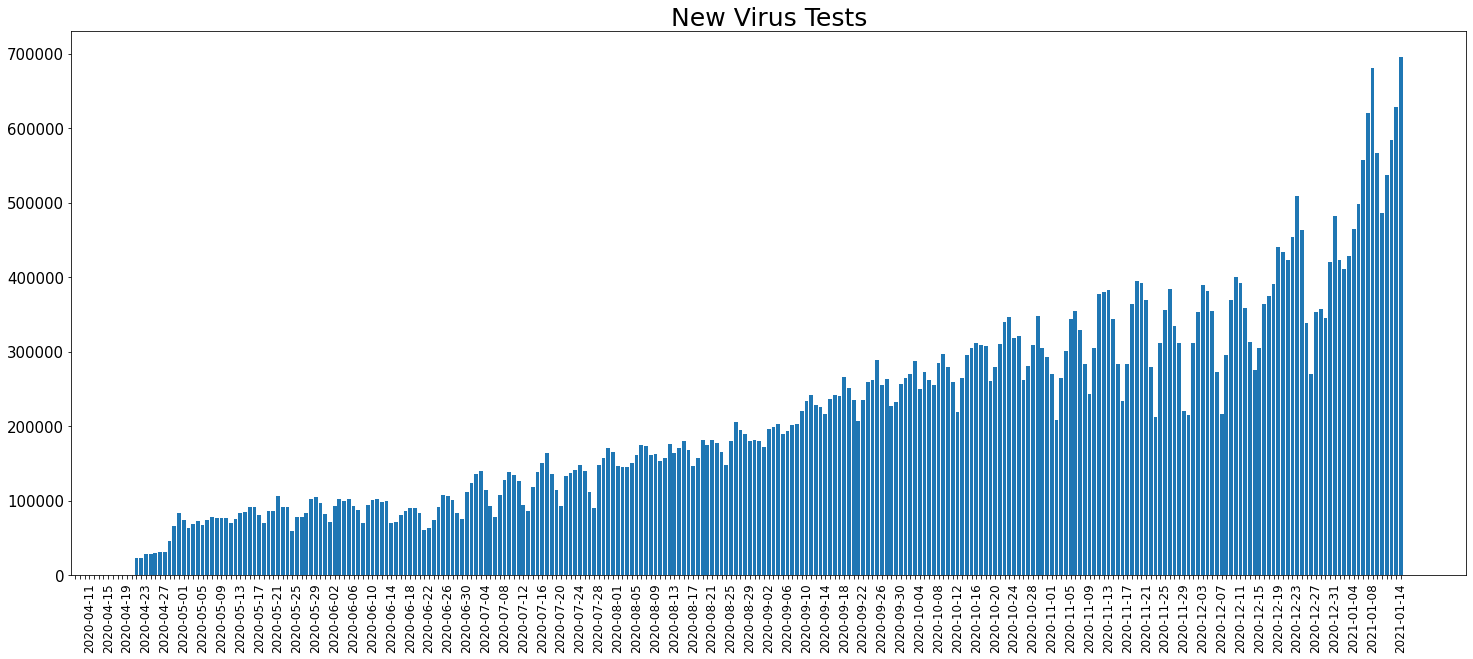

In [42]:
return1, return2, return3 = one_chart('newVirusTests', 'New Virus Tests',1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

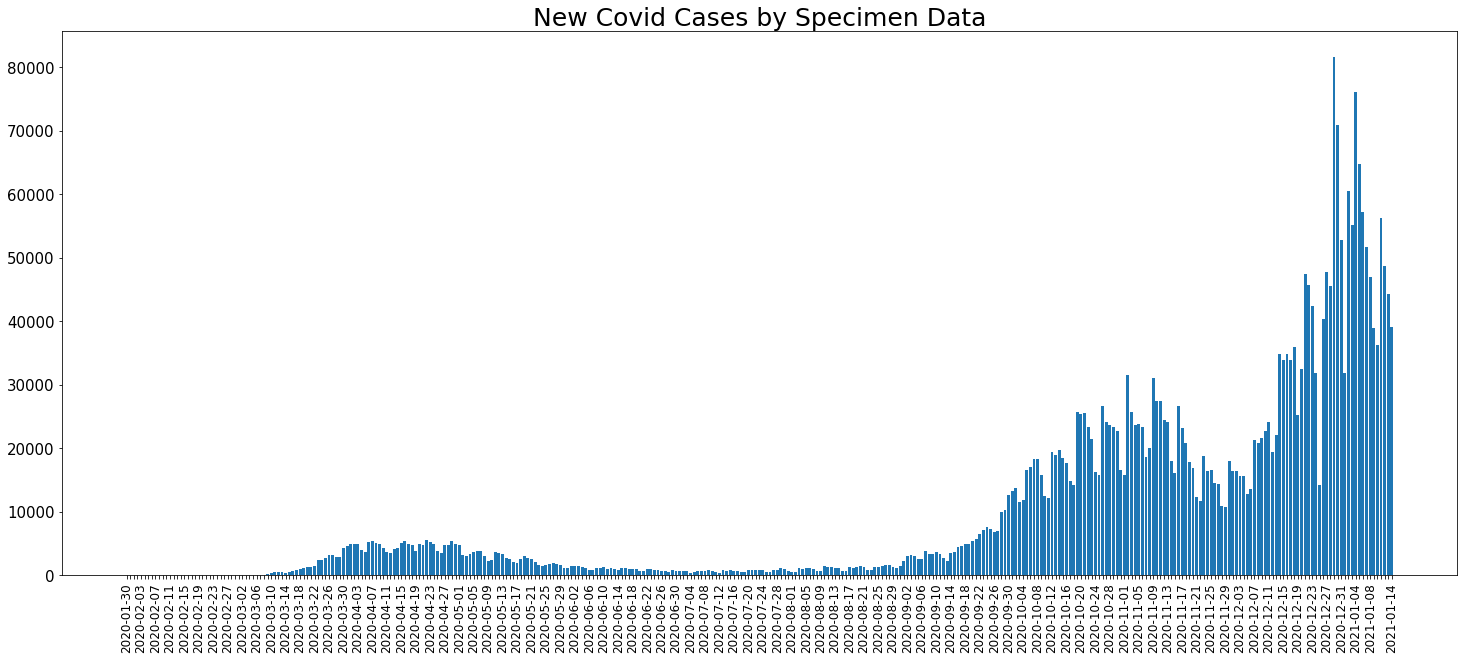

In [43]:
return1, return2, return3 = one_chart('newCasesBySpecimenDate', 'New Covid Cases by Specimen Data',1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

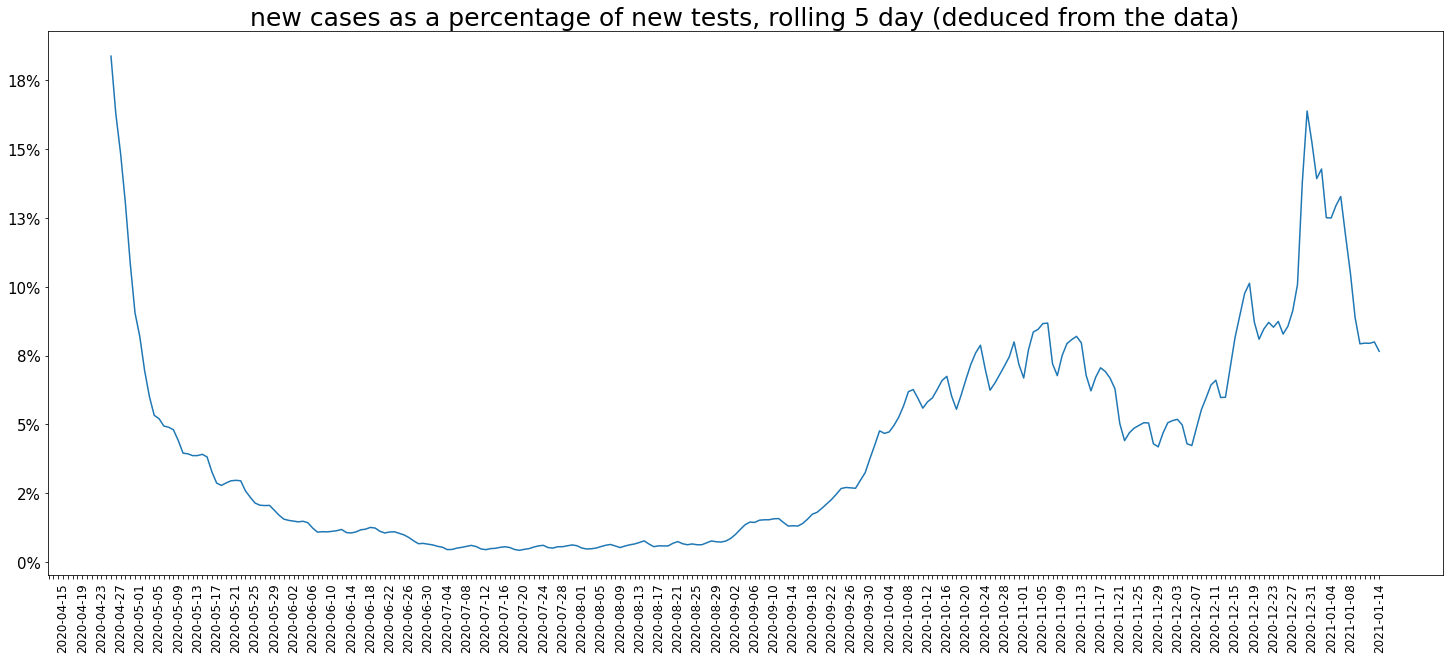

In [44]:
return1, return2, return3 = one_chart('%_positive_tests', 'new cases as a percentage of new tests, rolling 5 day (deduced from the data)',0,1)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

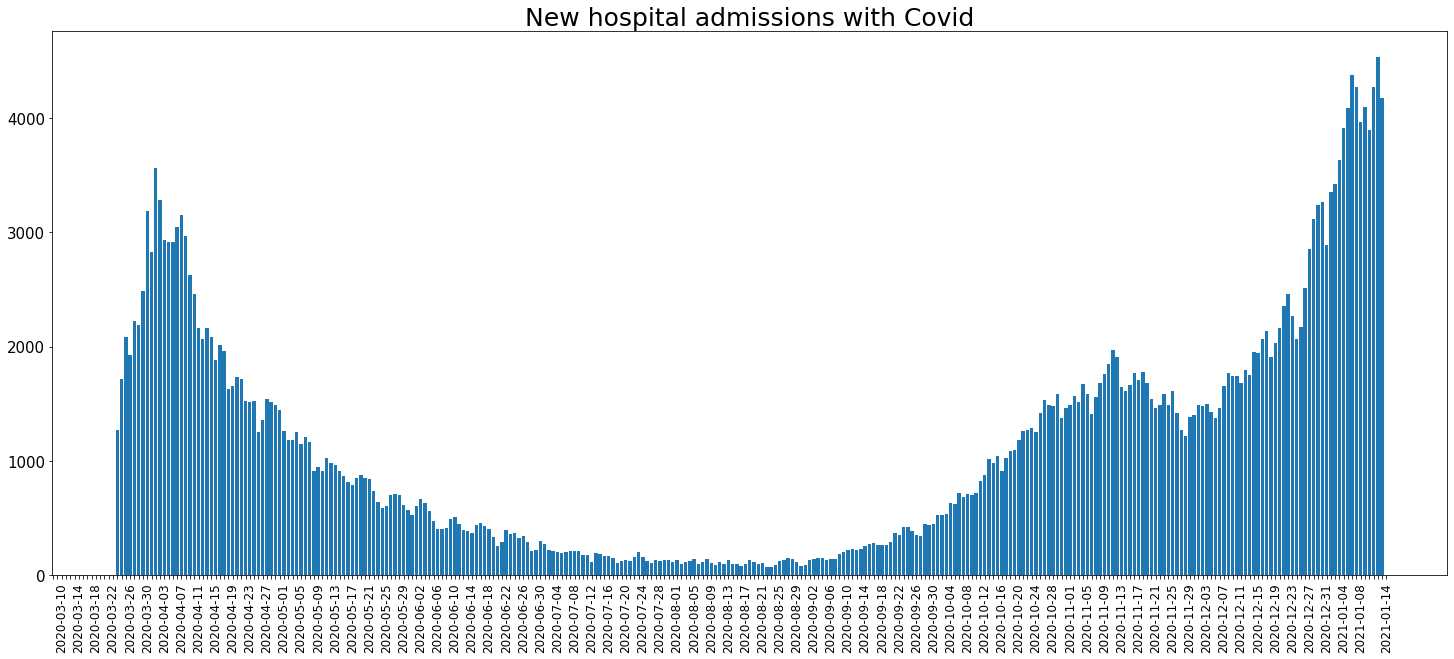

In [45]:
return1, return2, return3 = one_chart('newAdmissions', 'New hospital admissions with Covid',1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

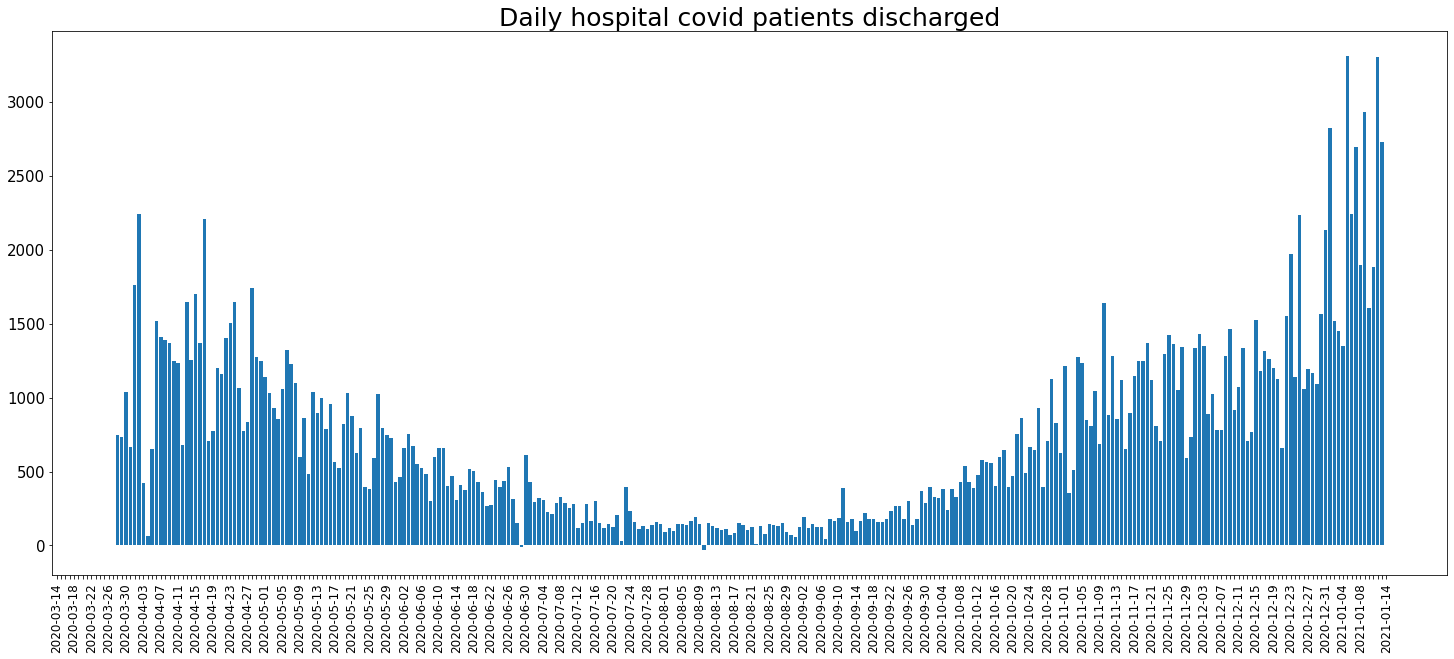

In [46]:
return1, return2, return3 = one_chart('leaving_hospital', 'Daily hospital covid patients discharged',1,0)

# slideTitle.append(return1)
# slideText.append(return2)
# imagePath.append(return3)

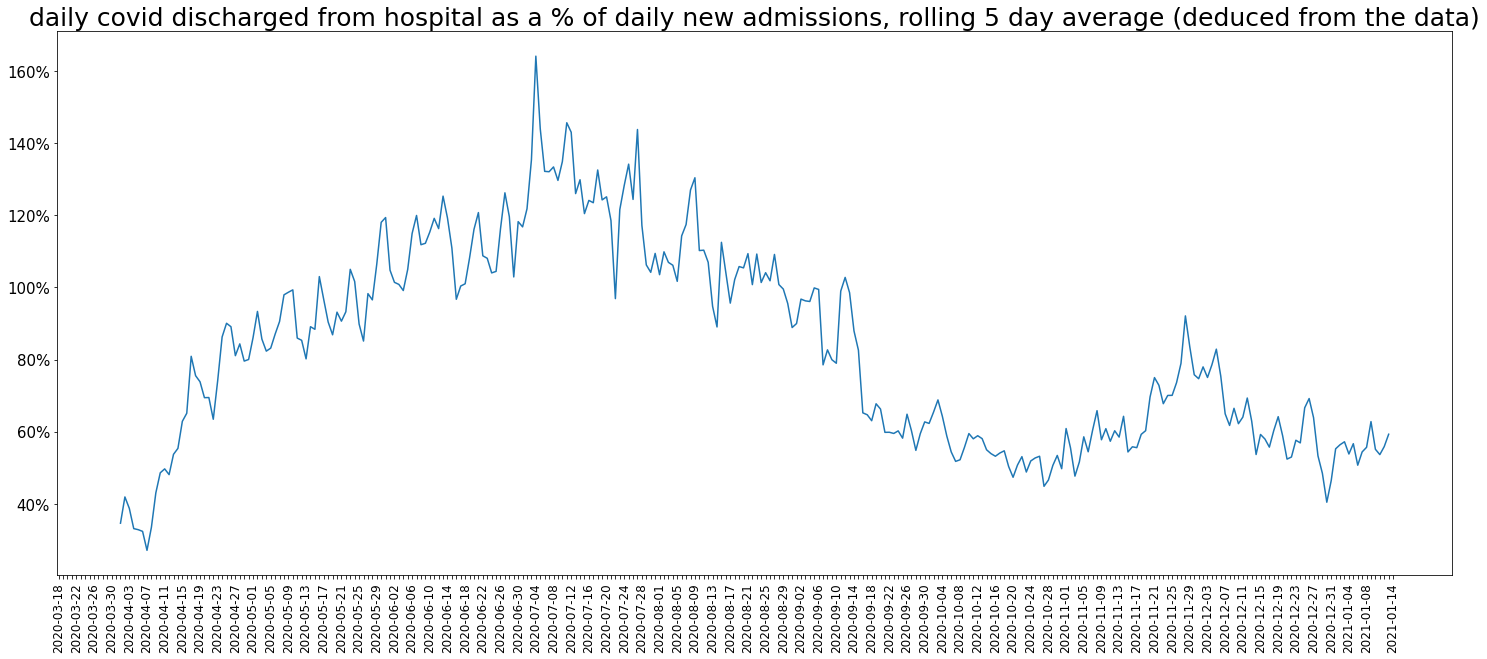

In [47]:

return1, return2, return3 = one_chart('leavers_%_admissions', 
                                      'daily covid discharged from hospital as a % of daily new admissions, rolling 5 day average (deduced from the data)',0,1)
# slideTitle.append(return1)
# slideText.append(return2)
# imagePath.append(return3)

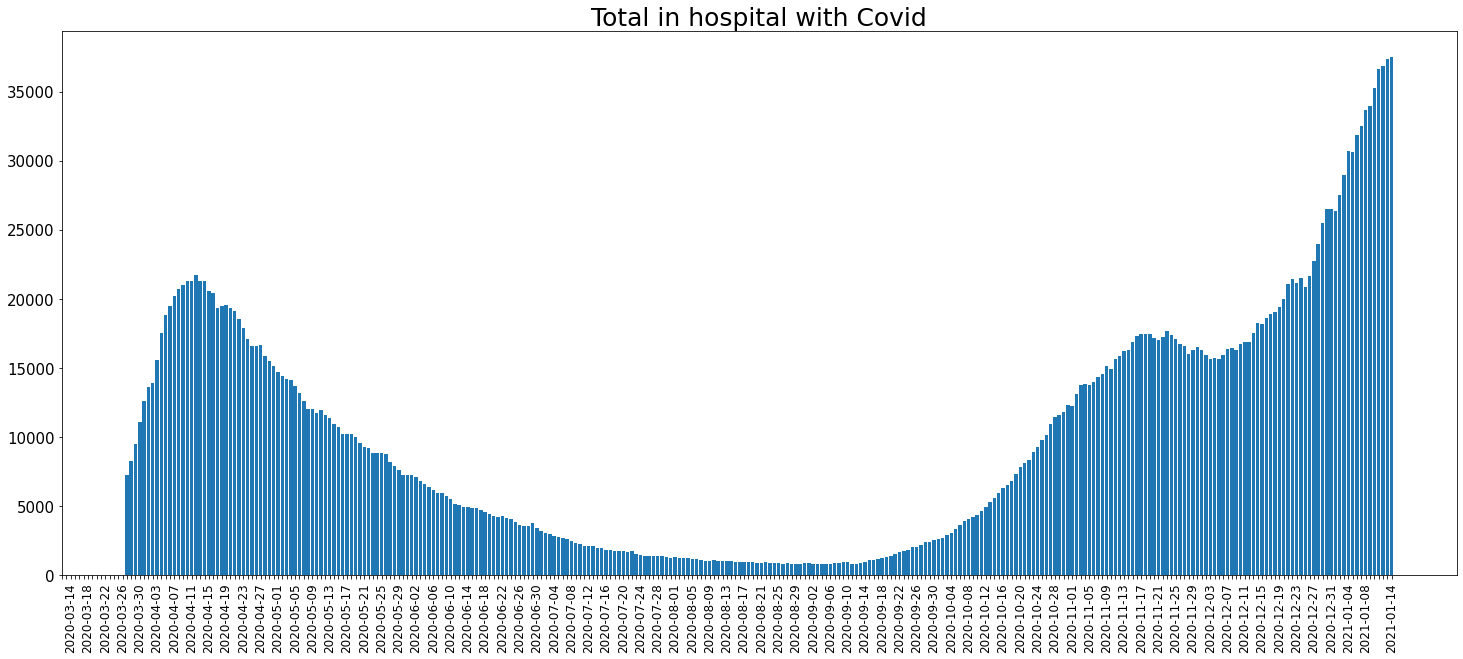

In [48]:
return1, return2, return3 = one_chart('hospitalCases', 'Total in hospital with Covid',1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

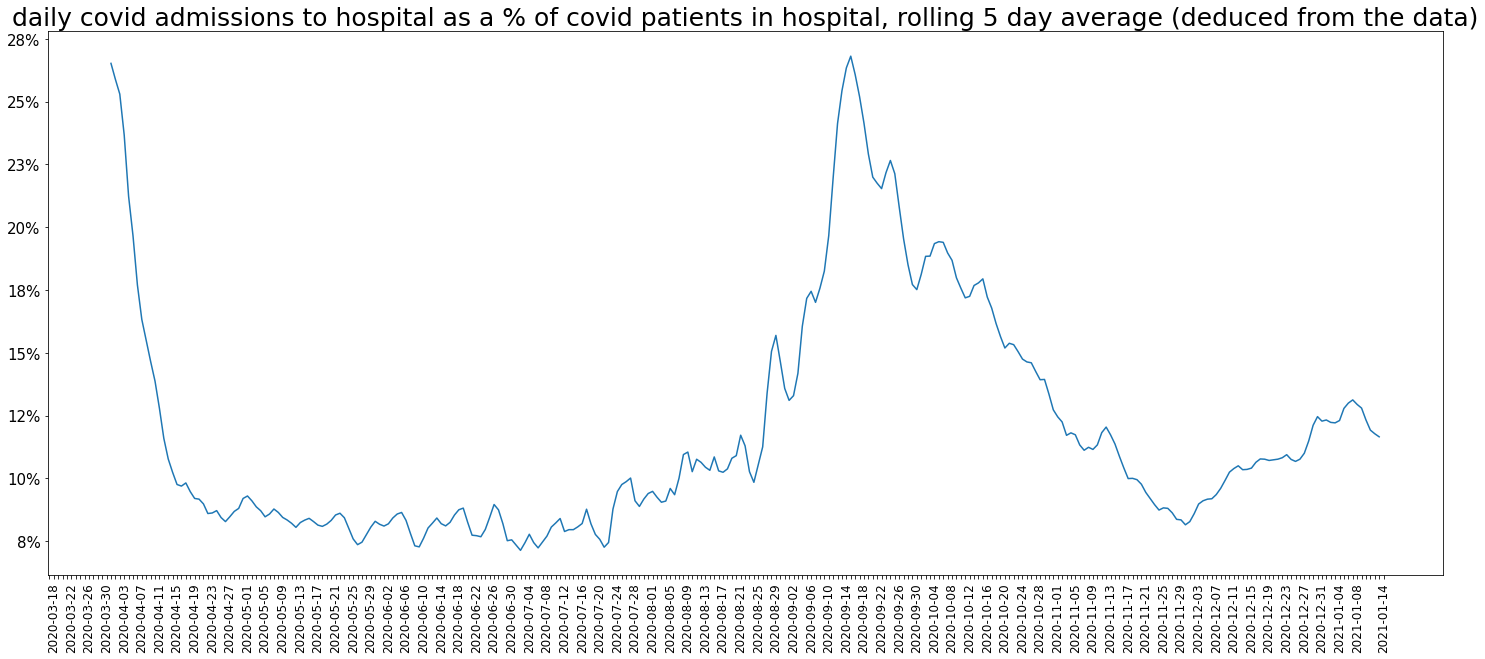

In [49]:
return1, return2, return3 = one_chart('newAdmissions%_inHospital', 
                                      'daily covid admissions to hospital as a % of covid patients in hospital, rolling 5 day average (deduced from the data)',0,1)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

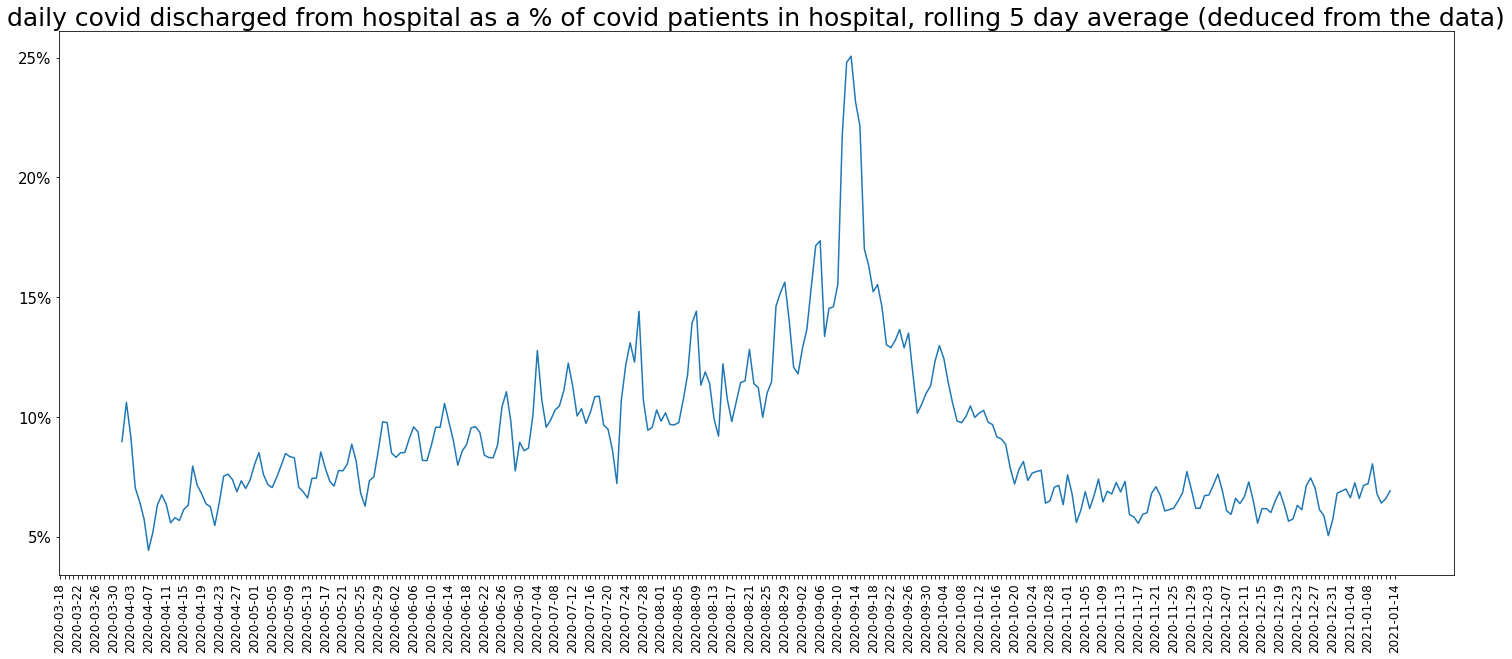

In [50]:
return1, return2, return3 = one_chart('leavers_%_inHospital', 
                                      'daily covid discharged from hospital as a % of covid patients in hospital, rolling 5 day average (deduced from the data)',0,1)

# slideTitle.append(return1)
# slideText.append(return2)
# imagePath.append(return3)

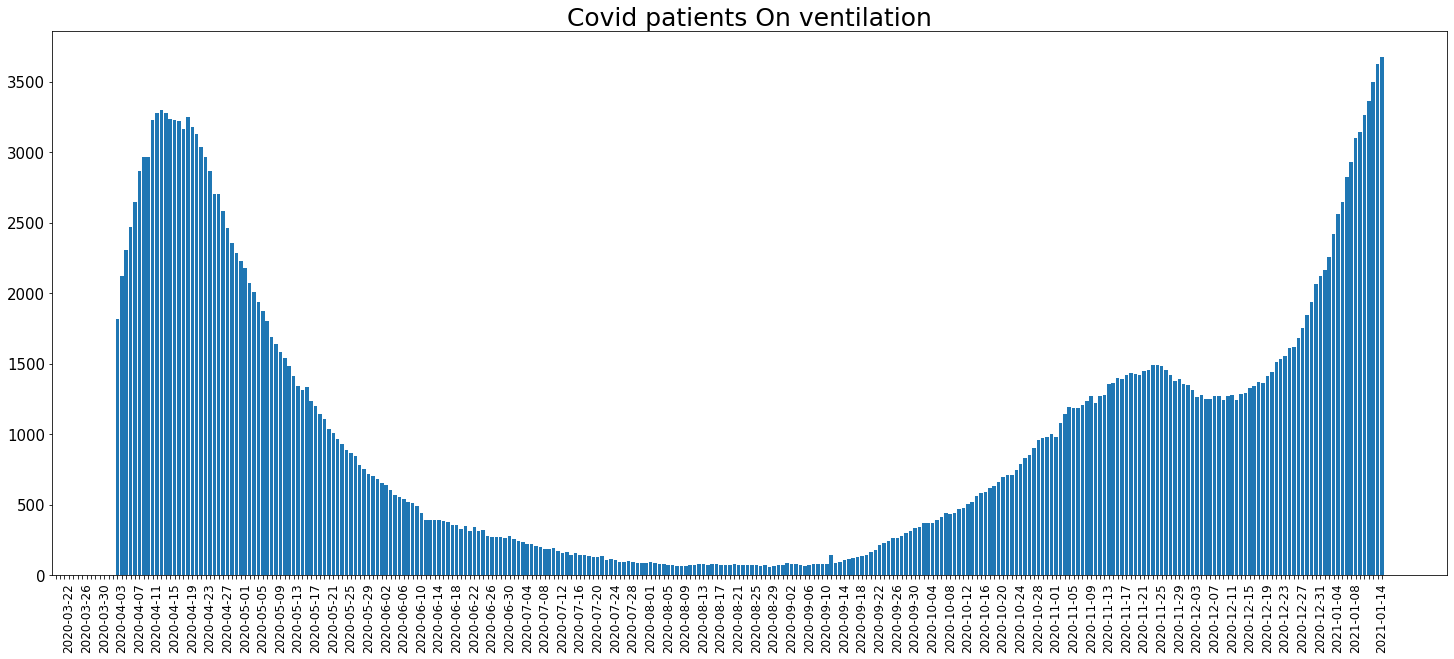

In [51]:
return1, return2, return3 = one_chart('covidOccupiedMVBeds', 'Covid patients On ventilation',1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

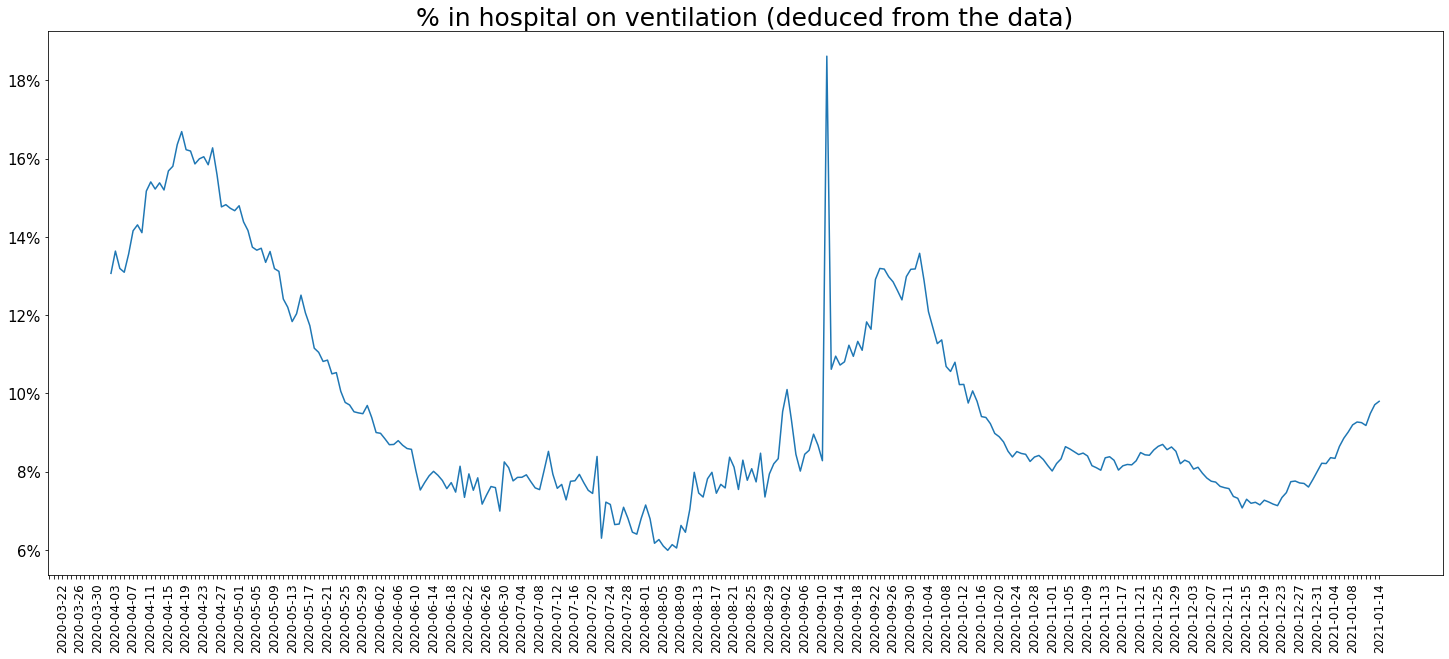

In [52]:
return1, return2, return3 = one_chart('%_on_ventilation', '% in hospital on ventilation (deduced from the data)',0,1)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

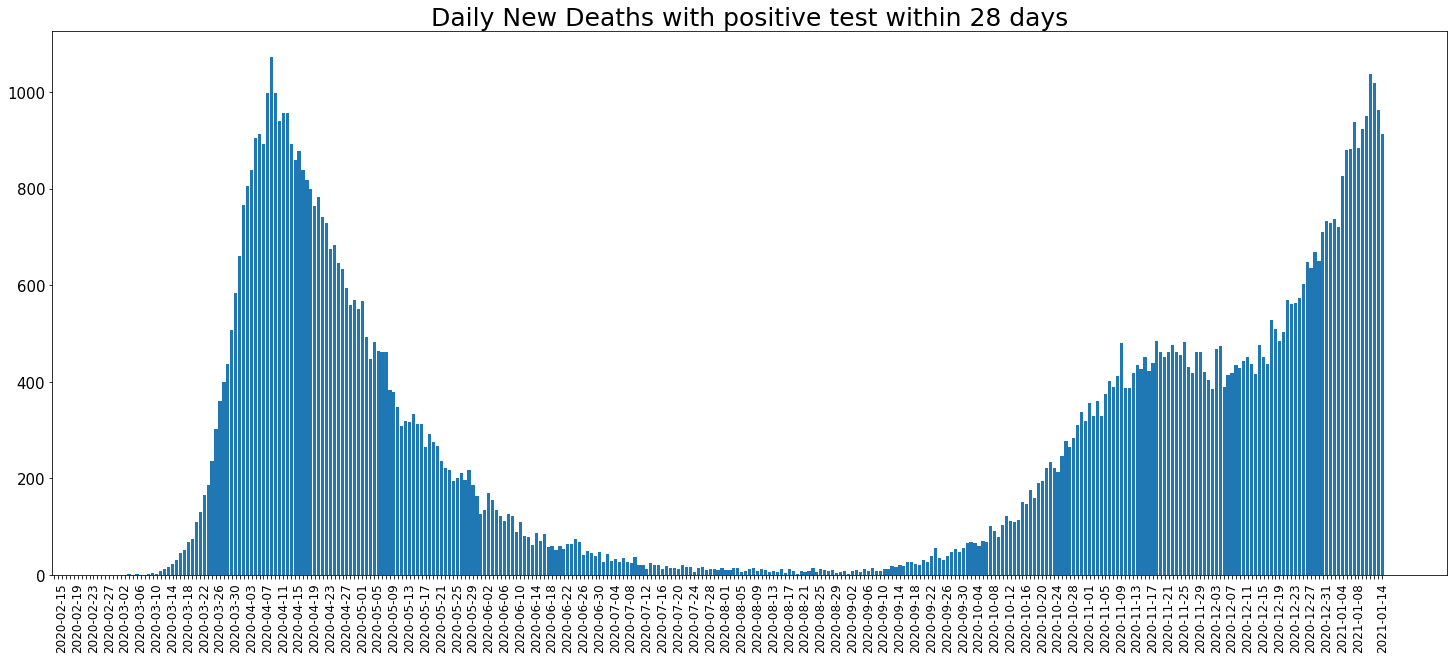

In [53]:
return1, return2, return3 = one_chart('newDeaths28DaysByDeathDate', 'Daily New Deaths with positive test within 28 days',1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

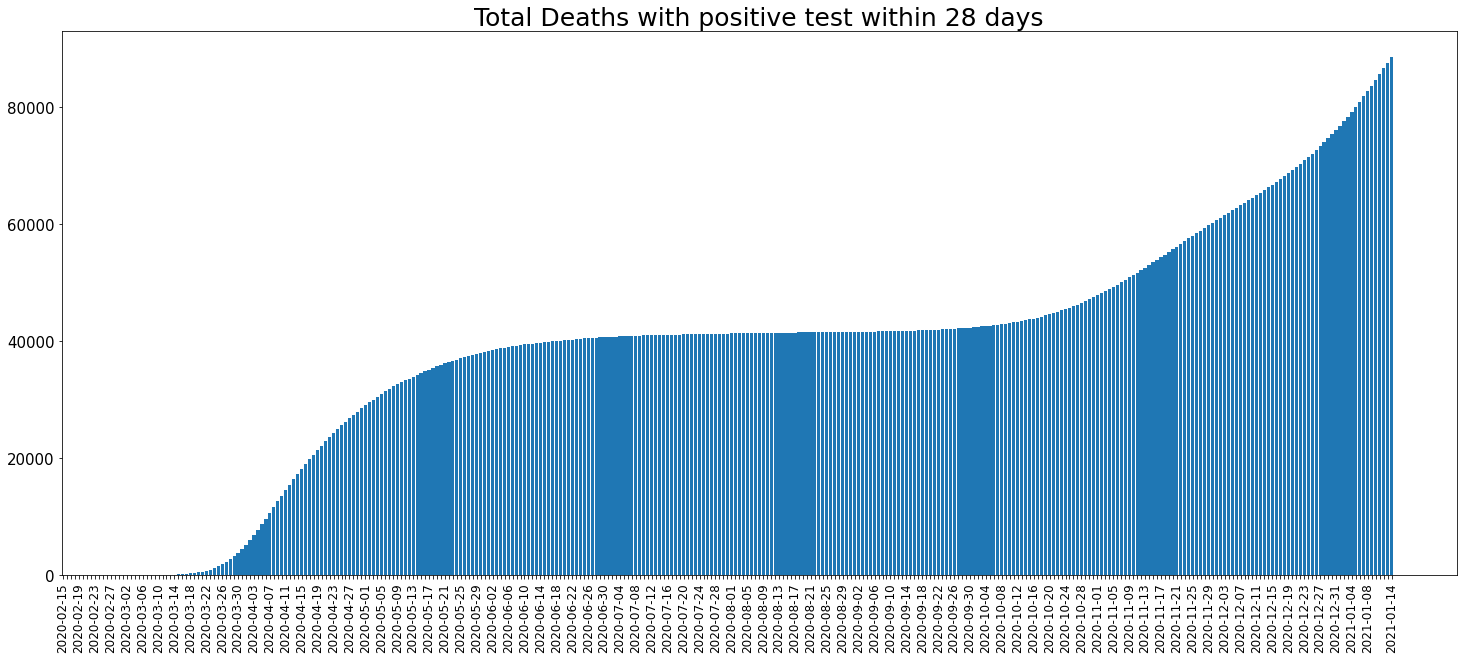

In [54]:
return1, return2, return3 = one_chart('cumDeaths28DaysByDeathDate', 'Total Deaths with positive test within 28 days',1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

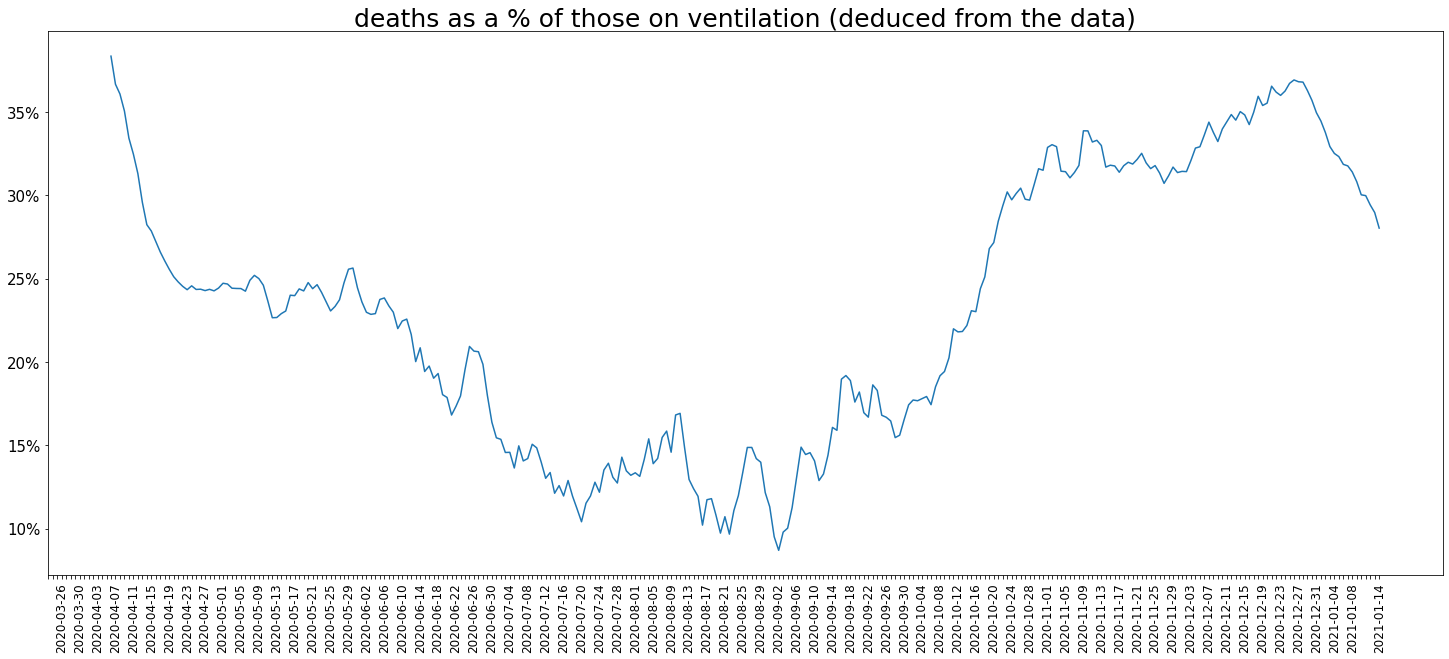

In [55]:
return1, return2, return3 = one_chart('deaths_%_vent', 'deaths as a % of those on ventilation (deduced from the data)',0,1)

# slideTitle.append(return1)
# slideText.append(return2)
# imagePath.append(return3)

In [56]:
df_summary.tail()

date  newCasesBySpecimenDate  cumCasesBySpecimenDate  \
346  2021-01-10                   36188                 3176184   
347  2021-01-11                   56263                 3232447   
348  2021-01-12                   48694                 3281141   
349  2021-01-13                   44243                 3325384   
350  2021-01-14                   39131                 3364515   

     newDeaths28DaysByDeathDate  cumDeaths28DaysByDeathDate  newAdmissions  \
346                       951.0                     84580.0         3900.0   
347                      1037.0                     85617.0         4275.0   
348                      1018.0                     86635.0         4534.0   
349                       963.0                     87598.0         4179.0   
350                       914.0                     88512.0            NaN   

     cumAdmissions  hospitalCases  covidOccupiedMVBeds  newVirusTests  \
346       326604.0        35272.0               3264.0       485874.0   
347       330879.0        36630.0               3363.0       536947.0   
348       335413.0        36847.0               3496.0       584760.0   
349       339592.0        37336.0               3626.0       628556.0   
350            NaN        37475.0               3672.0       695148.0   

     cumVirusTests  %_on_ventilation  %_positive_tests  leaving_hospital  \
346     57747184.0          0.092538          0.079306            1606.0   
347     58297536.0          0.091810          0.079555            1880.0   
348     58891289.0          0.094879          0.079488            3299.0   
349     59538320.0          0.097118          0.079994            2727.0   
350     60242686.0          0.097985          0.076594               NaN   

     leavers_%_admissions  newAdmissions%_inHospital  leavers_%_inHospital  \
346              0.551256                   0.123309              0.067975   
347              0.536485                   0.119265              0.063984   
348              0.558812                   0.117813              0.065835   
349              0.592958                   0.116591              0.069134   
350                   NaN                        NaN                   NaN   

     deaths_%_vent  
346       0.300256  
347       0.299766  
348       0.294208  
349       0.289629  
350       0.280294

In [57]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Data for the England by Age (most upto date age related death data i can find): Cases, Hospitalisations and Deaths')
    slideText.append('')
    imagePath.append('')

plt.show()

In [58]:
# England data
# using England data given no other nation data for hospital admissions by age

# create new dataframes for deaths and cases

df_eng_cd.tail()

date areaType   areaCode areaName  \
14330  2021-01-12   nation  E92000001  England   
14331  2021-01-12   nation  E92000001  England   
14332  2021-01-12   nation  E92000001  England   
14333  2021-01-12   nation  E92000001  England   
14334  2021-01-12   nation  E92000001  England   

                                          metric    age    cases  rollingRate  \
14330  newDeaths28DaysByDeathDateAgeDemographics  20_24      NaN          0.2   
14331  newDeaths28DaysByDeathDateAgeDemographics  15_19      NaN          0.0   
14332  newDeaths28DaysByDeathDateAgeDemographics  10_14      NaN          0.0   
14333      newCasesBySpecimenDateAgeDemographics  00_59  35310.0        573.2   
14334      newCasesBySpecimenDateAgeDemographics  00_04    974.0        187.1   

       rollingSum  
14330           6  
14331           1  
14332           0  
14333      245468  
14334        6175

In [59]:
df_eng_newcasesbyage = df_eng_cd[df_eng_cd['metric'] == 'newCasesBySpecimenDateAgeDemographics'].reset_index(drop=True)
df_eng_cumdeathsbyage = df_eng_cd[df_eng_cd['metric'] == 'newDeaths28DaysByDeathDateAgeDemographics'].reset_index(drop=True)

In [60]:
df_eng_newcasesbyage.tail()

date areaType   areaCode areaName  \
7673  2021-01-12   nation  E92000001  England   
7674  2021-01-12   nation  E92000001  England   
7675  2021-01-12   nation  E92000001  England   
7676  2021-01-12   nation  E92000001  England   
7677  2021-01-12   nation  E92000001  England   

                                     metric         age    cases  rollingRate  \
7673  newCasesBySpecimenDateAgeDemographics  unassigned     49.0          NaN   
7674  newCasesBySpecimenDateAgeDemographics       50_54   3748.0        640.5   
7675  newCasesBySpecimenDateAgeDemographics         60+   8658.0        425.7   
7676  newCasesBySpecimenDateAgeDemographics       00_59  35310.0        573.2   
7677  newCasesBySpecimenDateAgeDemographics       00_04    974.0        187.1   

      rollingSum  
7673         293  
7674       25028  
7675       57327  
7676      245468  
7677        6175

In [61]:
df_eng_cumdeathsbyage.tail()

date areaType   areaCode areaName  \
6652  2021-01-12   nation  E92000001  England   
6653  2021-01-12   nation  E92000001  England   
6654  2021-01-12   nation  E92000001  England   
6655  2021-01-12   nation  E92000001  England   
6656  2021-01-12   nation  E92000001  England   

                                         metric    age  cases  rollingRate  \
6652  newDeaths28DaysByDeathDateAgeDemographics  30_34    NaN          0.2   
6653  newDeaths28DaysByDeathDateAgeDemographics  25_29    NaN          0.1   
6654  newDeaths28DaysByDeathDateAgeDemographics  20_24    NaN          0.2   
6655  newDeaths28DaysByDeathDateAgeDemographics  15_19    NaN          0.0   
6656  newDeaths28DaysByDeathDateAgeDemographics  10_14    NaN          0.0   

      rollingSum  
6652           6  
6653           4  
6654           6  
6655           1  
6656           0

In [62]:
# clean the dateframes

# delete duplicate rows
df_eng_newcasesbyage.drop_duplicates(inplace=True)
df_eng_newcasesbyage.reset_index(drop=True)

df_eng_cumdeathsbyage.drop_duplicates(inplace=True)
df_eng_cumdeathsbyage.reset_index(drop=True)

df_eng_cumadmissionsbyage.drop_duplicates(inplace=True)
df_eng_cumadmissionsbyage.reset_index(drop=True)

date areaType   areaCode areaName              metric       age  \
0     2020-03-19   nation  E92000001  England  cumAdmissionsByAge    0_to_5   
1     2020-03-19   nation  E92000001  England  cumAdmissionsByAge       85+   
2     2020-03-19   nation  E92000001  England  cumAdmissionsByAge   6_to_17   
3     2020-03-19   nation  E92000001  England  cumAdmissionsByAge  18_to_64   
4     2020-03-19   nation  E92000001  England  cumAdmissionsByAge  65_to_84   
...          ...      ...        ...      ...                 ...       ...   
1505  2021-01-14   nation  E92000001  England  cumAdmissionsByAge    0_to_5   
1506  2021-01-14   nation  E92000001  England  cumAdmissionsByAge   6_to_17   
1507  2021-01-14   nation  E92000001  England  cumAdmissionsByAge  18_to_64   
1508  2021-01-14   nation  E92000001  England  cumAdmissionsByAge  65_to_84   
1509  2021-01-14   nation  E92000001  England  cumAdmissionsByAge       85+   

        rate   value  
0        0.1       4  
1        7.1      97  
2        0.1       5  
3        0.5     171  
4        2.4     209  
...      ...     ...  
1505    48.1    1948  
1506    24.1    1906  
1507   292.0   98814  
1508  1396.5  123087  
1509  4606.8   62882  

[1510 rows x 8 columns]

In [63]:
# delete unwanted columns

df_eng_newcasesbyage = df_eng_newcasesbyage[['date', 'age', 'cases']]
df_eng_cumdeathsbyage = df_eng_cumdeathsbyage[['date', 'age', 'rollingSum']]
df_eng_cumadmissionsbyage = df_eng_cumadmissionsbyage[['date', 'age', 'value']]

In [64]:
df_eng_newcasesbyage.tail()

date         age    cases
7673  2021-01-12  unassigned     49.0
7674  2021-01-12       50_54   3748.0
7675  2021-01-12         60+   8658.0
7676  2021-01-12       00_59  35310.0
7677  2021-01-12       00_04    974.0

In [65]:
df_eng_cumdeathsbyage.tail()

date    age  rollingSum
6652  2021-01-12  30_34           6
6653  2021-01-12  25_29           4
6654  2021-01-12  20_24           6
6655  2021-01-12  15_19           1
6656  2021-01-12  10_14           0

In [66]:
df_eng_cumadmissionsbyage.tail()

date       age   value
1505  2021-01-14    0_to_5    1948
1506  2021-01-14   6_to_17    1906
1507  2021-01-14  18_to_64   98814
1508  2021-01-14  65_to_84  123087
1509  2021-01-14       85+   62882

In [67]:
# create new dataframes with the age bands as the headers
# new cases

dates = df_eng_newcasesbyage['date'].tolist()
dates = list(set(dates))

df_eng_newcasesbyage_Summary = pd.DataFrame(dates, columns = ['date'])
df_eng_newcasesbyage_Summary.sort_values('date', inplace = True)
df_eng_newcasesbyage_Summary.reset_index(drop=True, inplace=True)

headers = df_eng_newcasesbyage['age'].unique().tolist()

for i in range(len(headers)):
    listOfValues = df_eng_newcasesbyage[df_eng_newcasesbyage['age'] == headers[i]]['cases'].tolist()
    df_eng_newcasesbyage_Summary[headers[i]] = listOfValues

#df_eng_newcasesbyage_Summary['date'] = df_eng_newcasesbyage_Summary['datetime'].dt.strftime('%d-%m-%Y')

df_eng_newcasesbyage_Summary.tail()

date    00_59   00_04  05_09   10_14   15_19   20_24   25_29  \
344  2021-01-08  33899.0   838.0  847.0  1169.0  2397.0  4034.0  4276.0   
345  2021-01-09  28785.0   739.0  746.0   977.0  1949.0  3251.0  3592.0   
346  2021-01-10  26819.0   701.0  672.0   910.0  1692.0  3008.0  3296.0   
347  2021-01-11  41210.0  1071.0  980.0  1372.0  2447.0  4479.0  4999.0   
348  2021-01-12  35310.0   974.0  900.0  1158.0  2052.0  3909.0  4265.0   

      30_34   35_39   40_44   45_49     60+   55_59  unassigned     90+  \
344  3980.0  3486.0  3178.0  3138.0  8325.0  3044.0        37.0   927.0   
345  3442.0  3026.0  2760.0  2776.0  6419.0  2592.0        13.0   609.0   
346  3218.0  2852.0  2598.0  2576.0  5860.0  2528.0        29.0   490.0   
347  4783.0  4419.0  4166.0  4037.0  9905.0  4023.0        50.0  1065.0   
348  4072.0  3704.0  3444.0  3567.0  8658.0  3468.0        49.0   977.0   

     85_89  80_84   50_54   70_74   65_69   60_64   75_79  
344  849.0  863.0  3475.0  1087.0  1395.0  2259.0   945.0  
345  658.0  610.0  2922.0   901.0  1077.0  1833.0   731.0  
346  536.0  565.0  2739.0   821.0  1013.0  1809.0   626.0  
347  979.0  999.0  4384.0  1357.0  1598.0  2879.0  1028.0  
348  908.0  905.0  3748.0  1110.0  1354.0  2469.0   935.0

In [68]:
# create new dataframes with the age bands as the headers
# cum deaths

dates = df_eng_cumdeathsbyage['date'].tolist()
dates = list(set(dates))

df_eng_cumdeathsbyage_Summary = pd.DataFrame(dates, columns = ['date'])
df_eng_cumdeathsbyage_Summary.sort_values('date', inplace = True)
df_eng_cumdeathsbyage_Summary.reset_index(drop=True, inplace=True)

headers = df_eng_cumdeathsbyage['age'].unique().tolist()

for i in range(len(headers)):
    listOfValues = df_eng_cumdeathsbyage[df_eng_cumdeathsbyage['age'] == headers[i]]['rollingSum'].tolist()
    df_eng_cumdeathsbyage_Summary[headers[i]] = listOfValues

#df_eng_cumdeathsbyage_Summary['date'] = df_eng_cumdeathsbyage_Summary['datetime'].dt.strftime('%d-%m-%Y')

df_eng_cumdeathsbyage_Summary.tail()

date  30_34  00_04  00_59   60+   90+  85_89  80_84  75_79  65_69  \
312  2021-01-08      8     19    407  4834  1086   1034    995    650    369   
313  2021-01-09      7     20    414  5012  1102   1066   1019    682    392   
314  2021-01-10      5     20    404  5249  1177   1127   1039    716    411   
315  2021-01-11      5     22    414  5421  1230   1188   1050    759    407   
316  2021-01-12      6     23    411  5546  1255   1216   1076    810    400   

     60_64  05_09  70_74  50_54  10_14  55_59  20_24  25_29  15_19  35_39  \
312    168      0    532     95      0    170      7      7      2     23   
313    191      0    560    101      0    164      7      6      2     29   
314    208      0    571    100      0    165      7      4      2     27   
315    208      0    579    102      0    165      6      4      2     26   
316    209      0    580     96      0    165      6      4      1     26   

     40_44  45_49  
312     19     57  
313     20     58  
314     20     54  
315     22     60  
316     23     61

In [69]:
# convert the rolling deaths into daily deaths

def rolling_to_new(column_name):

    newdeaths = [0]*6   
    for i in range(6,len(df_eng_cumdeathsbyage_Summary)):
        newdaydeaths = df_eng_cumdeathsbyage_Summary[column_name].iloc[i] - df_eng_cumdeathsbyage_Summary[column_name].iloc[i-1] + newdeaths[i-7]
        newdeaths.append(newdaydeaths)

    df_eng_cumdeathsbyage_Summary[column_name + '_new'] = newdeaths

In [70]:
col_names = df_eng_cumdeathsbyage_Summary.columns[1:].tolist()

for i in range(len(col_names)):
    rolling_to_new(col_names[i])

In [71]:
df_eng_cumdeathsbyage_Summary.tail()

date  30_34  00_04  00_59   60+   90+  85_89  80_84  75_79  65_69  \
312  2021-01-08      8     19    407  4834  1086   1034    995    650    369   
313  2021-01-09      7     20    414  5012  1102   1066   1019    682    392   
314  2021-01-10      5     20    404  5249  1177   1127   1039    716    411   
315  2021-01-11      5     22    414  5421  1230   1188   1050    759    407   
316  2021-01-12      6     23    411  5546  1255   1216   1076    810    400   

     60_64  05_09  70_74  50_54  10_14  55_59  20_24  25_29  15_19  35_39  \
312    168      0    532     95      0    170      7      7      2     23   
313    191      0    560    101      0    164      7      6      2     29   
314    208      0    571    100      0    165      7      4      2     27   
315    208      0    579    102      0    165      6      4      2     26   
316    209      0    580     96      0    165      6      4      1     26   

     40_44  45_49  30_34_new  00_04_new  00_59_new  60+_new  90+_new  \
312     19     57          1          1         58      734      159   
313     20     58          1          3         56      787      162   
314     20     54          0          6         53      804      199   
315     22     60          0          5         64      863      217   
316     23     61          2          3         65      856      185   

     85_89_new  80_84_new  75_79_new  65_69_new  60_64_new  05_09_new  \
312        164        151         93         59         36          0   
313        156        149        124         62         36          0   
314        179        142        118         53         35          0   
315        204        147        128         58         26          0   
316        180        173        142         55         33          0   

     70_74_new  50_54_new  10_14_new  55_59_new  20_24_new  25_29_new  \
312         72         16          0         30          2          1   
313         98         16          0         16          0          0   
314         78         10          0         21          1          0   
315         83         14          0         24          0          0   
316         88         14          0         25          0          1   

     15_19_new  35_39_new  40_44_new  45_49_new  
312          0          3          1          3  
313          0          7          3         10  
314          1          3          6          5  
315          0          1          5         15  
316          0          5          3         12

In [72]:
# create new dataframes with the age bands as the headers
# cum admissions

dates = df_eng_cumadmissionsbyage['date'].tolist()
dates = list(set(dates))

df_eng_cumadmissionsbyage_Summary = pd.DataFrame(dates, columns = ['date'])
df_eng_cumadmissionsbyage_Summary.sort_values('date', inplace = True)
df_eng_cumadmissionsbyage_Summary.reset_index(drop=True, inplace=True)

headers = df_eng_cumadmissionsbyage['age'].unique().tolist()

for i in range(len(headers)):
    listOfValues = df_eng_cumadmissionsbyage[df_eng_cumadmissionsbyage['age'] == headers[i]]['value'].tolist()
    df_eng_cumadmissionsbyage_Summary[headers[i]] = listOfValues

#df_eng_cumadmissionsbyage_Summary['date'] = df_eng_cumadmissionsbyage_Summary['datetime'].dt.strftime('%d-%m-%Y')

df_eng_cumadmissionsbyage_Summary.tail()

date  0_to_5    85+  6_to_17  18_to_64  65_to_84
297  2021-01-10    1852  59731     1837     92957    116716
298  2021-01-11    1868  60520     1858     94435    118306
299  2021-01-12    1895  61383     1876     95983    119984
300  2021-01-13    1927  62127     1890     97407    121608
301  2021-01-14    1948  62882     1906     98814    123087

In [73]:
# convert the cum admissions into daily admissions

def cum_to_new(column_name):

    newadmissions = []
    newadmissions.append(df_eng_cumadmissionsbyage_Summary[column_name][0])
    for i in range(1,len(df_eng_cumadmissionsbyage_Summary)):
        newdayadmissions = df_eng_cumadmissionsbyage_Summary[column_name].iloc[i] - df_eng_cumadmissionsbyage_Summary[column_name].iloc[i-1]
        newadmissions.append(newdayadmissions)

    df_eng_cumadmissionsbyage_Summary[column_name + '_new'] = newadmissions

In [74]:
col_names = df_eng_cumadmissionsbyage_Summary.columns[1:].tolist()

for i in range(len(col_names)):
    cum_to_new(col_names[i])

In [75]:
df_eng_cumadmissionsbyage_Summary.head()

date  0_to_5  85+  6_to_17  18_to_64  65_to_84  0_to_5_new  85+_new  \
0  2020-03-19       4   97        5       171       209           4       97   
1  2020-03-20       4  213       13       384       445           0      116   
2  2020-03-21       5  340       16       618       695           1      127   
3  2020-03-22      10  469       17       856      1024           5      129   
4  2020-03-23      16  650       23      1200      1471           6      181   

   6_to_17_new  18_to_64_new  65_to_84_new  
0            5           171           209  
1            8           213           236  
2            3           234           250  
3            1           238           329  
4            6           344           447

In [76]:
# create new columns in the other two dataframes to match the admissions ages

In [77]:
def create_new_columns(df, newcol,name):

    df[name] = 0

    for i in range(len(newcol)):
        df[name] = df[name] + df[newcol[i]]


In [78]:
nursery = ['00_04']
school = ['15_19','10_14','05_09']
working = ['60_64', '55_59', '50_54','45_49','40_44','35_39','30_34','25_29','20_24']
old = ['80_84','75_79','70_74','65_69']
older = ['90+','85_89']

In [79]:
create_new_columns(df_eng_newcasesbyage_Summary,nursery,'00_04_')
create_new_columns(df_eng_newcasesbyage_Summary,school,'05_19_')
create_new_columns(df_eng_newcasesbyage_Summary,working,'20_64_')
create_new_columns(df_eng_newcasesbyage_Summary,old,'65_84_')
create_new_columns(df_eng_newcasesbyage_Summary,older,'85+_')

In [80]:
nursery = ['00_04_new']
school = ['15_19_new','10_14_new','05_09_new']
working = ['60_64_new', '55_59_new', '50_54_new','45_49_new','40_44_new','35_39_new','30_34_new','25_29_new','20_24_new']
old = ['80_84_new','75_79_new','70_74_new','65_69_new']
older = ['90+_new','85_89_new']

In [81]:
create_new_columns(df_eng_cumdeathsbyage_Summary,nursery,'00_04_')
create_new_columns(df_eng_cumdeathsbyage_Summary,school,'05_19_')
create_new_columns(df_eng_cumdeathsbyage_Summary,working,'20_64_')
create_new_columns(df_eng_cumdeathsbyage_Summary,old,'65_84_')
create_new_columns(df_eng_cumdeathsbyage_Summary,older,'85+_')

In [82]:
# add rolling mean 7 day columns

columns1 = ['00_04_','05_19_','20_64_','65_84_','85+_']
columns2 = ['0_to_5_new','6_to_17_new','18_to_64_new',
            '65_to_84_new','85+_new']

for i in range(len(columns1)):
    df_eng_newcasesbyage_Summary[columns1[i] + 'rolling7'] = df_eng_newcasesbyage_Summary[columns1[i]].rolling(7).mean()
    df_eng_cumdeathsbyage_Summary[columns1[i] + 'rolling7'] = df_eng_cumdeathsbyage_Summary[columns1[i]].rolling(7).mean()

for i in range(len(columns2)):
    df_eng_cumadmissionsbyage_Summary[columns2[i] + 'rolling7'] = df_eng_cumadmissionsbyage_Summary[columns2[i]].rolling(7).mean()


In [83]:
# add cumulative columns

columns1 = ['00_04_','05_19_','20_64_','65_84_','85+_']
columns2 = ['0_to_5_new','6_to_17_new','18_to_64_new',
            '65_to_84_new','85+_new']

for i in range(len(columns1)):
    df_eng_newcasesbyage_Summary[columns1[i] + 'cumsum'] = df_eng_newcasesbyage_Summary[columns1[i]].cumsum()
    df_eng_cumdeathsbyage_Summary[columns1[i] + 'cumsum'] = df_eng_cumdeathsbyage_Summary[columns1[i]].cumsum()

for i in range(len(columns2)):
    df_eng_cumadmissionsbyage_Summary[columns2[i] + 'cumsum'] = df_eng_cumadmissionsbyage_Summary[columns2[i]].cumsum()


In [84]:
df_eng_newcasesbyage_Summary.head()

date  00_59  00_04  05_09  10_14  15_19  20_24  25_29  30_34  35_39  \
0  2020-01-30    2.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
1  2020-01-31    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2  2020-02-01    1.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
3  2020-02-02    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4  2020-02-03    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   40_44  45_49  60+  55_59  unassigned  90+  85_89  80_84  50_54  70_74  \
0    0.0    0.0  0.0    0.0         0.0  0.0    0.0    0.0    1.0    0.0   
1    0.0    0.0  1.0    0.0         0.0  0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0  0.0    0.0         0.0  0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0  0.0    0.0         0.0  0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0  0.0    0.0         0.0  0.0    0.0    0.0    0.0    0.0   

   65_69  60_64  75_79  00_04_  05_19_  20_64_  65_84_  85+_  00_04_rolling7  \
0    0.0    0.0    0.0     0.0     0.0     2.0     0.0   0.0             NaN   
1    0.0    1.0    0.0     0.0     0.0     1.0     0.0   0.0             NaN   
2    0.0    0.0    0.0     0.0     0.0     1.0     0.0   0.0             NaN   
3    0.0    0.0    0.0     0.0     0.0     0.0     0.0   0.0             NaN   
4    0.0    0.0    0.0     0.0     0.0     0.0     0.0   0.0             NaN   

   05_19_rolling7  20_64_rolling7  65_84_rolling7  85+_rolling7  00_04_cumsum  \
0             NaN             NaN             NaN           NaN           0.0   
1             NaN             NaN             NaN           NaN           0.0   
2             NaN             NaN             NaN           NaN           0.0   
3             NaN             NaN             NaN           NaN           0.0   
4             NaN             NaN             NaN           NaN           0.0   

   05_19_cumsum  20_64_cumsum  65_84_cumsum  85+_cumsum  
0           0.0           2.0           0.0         0.0  
1           0.0           3.0           0.0         0.0  
2           0.0           4.0           0.0         0.0  
3           0.0           4.0           0.0         0.0  
4           0.0           4.0           0.0         0.0

In [85]:
df_eng_cumadmissionsbyage_Summary.head()

date  0_to_5  85+  6_to_17  18_to_64  65_to_84  0_to_5_new  85+_new  \
0  2020-03-19       4   97        5       171       209           4       97   
1  2020-03-20       4  213       13       384       445           0      116   
2  2020-03-21       5  340       16       618       695           1      127   
3  2020-03-22      10  469       17       856      1024           5      129   
4  2020-03-23      16  650       23      1200      1471           6      181   

   6_to_17_new  18_to_64_new  65_to_84_new  0_to_5_newrolling7  \
0            5           171           209                 NaN   
1            8           213           236                 NaN   
2            3           234           250                 NaN   
3            1           238           329                 NaN   
4            6           344           447                 NaN   

   6_to_17_newrolling7  18_to_64_newrolling7  65_to_84_newrolling7  \
0                  NaN                   NaN                   NaN   
1                  NaN                   NaN                   NaN   
2                  NaN                   NaN                   NaN   
3                  NaN                   NaN                   NaN   
4                  NaN                   NaN                   NaN   

   85+_newrolling7  0_to_5_newcumsum  6_to_17_newcumsum  18_to_64_newcumsum  \
0              NaN                 4                  5                 171   
1              NaN                 4                 13                 384   
2              NaN                 5                 16                 618   
3              NaN                10                 17                 856   
4              NaN                16                 23                1200   

   65_to_84_newcumsum  85+_newcumsum  
0                 209             97  
1                 445            213  
2                 695            340  
3                1024            469  
4                1471            650

In [86]:
df_eng_cumdeathsbyage_Summary.head()

date  30_34  00_04  00_59  60+  90+  85_89  80_84  75_79  65_69  \
0  2020-03-02      0      0      0    0    0      0      0      0      0   
1  2020-03-03      0      0      0    0    0      0      0      0      0   
2  2020-03-04      0      0      0    0    0      0      0      0      0   
3  2020-03-05      0      0      0    0    0      0      0      0      0   
4  2020-03-06      0      0      0    0    0      0      0      0      0   

   60_64  05_09  70_74  50_54  10_14  55_59  20_24  25_29  15_19  35_39  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

   40_44  45_49  30_34_new  00_04_new  00_59_new  60+_new  90+_new  85_89_new  \
0      0      0          0          0          0        0        0          0   
1      0      0          0          0          0        0        0          0   
2      0      0          0          0          0        0        0          0   
3      0      0          0          0          0        0        0          0   
4      0      0          0          0          0        0        0          0   

   80_84_new  75_79_new  65_69_new  60_64_new  05_09_new  70_74_new  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   50_54_new  10_14_new  55_59_new  20_24_new  25_29_new  15_19_new  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   35_39_new  40_44_new  45_49_new  00_04_  05_19_  20_64_  65_84_  85+_  \
0          0          0          0       0       0       0       0     0   
1          0          0          0       0       0       0       0     0   
2          0          0          0       0       0       0       0     0   
3          0          0          0       0       0       0       0     0   
4          0          0          0       0       0       0       0     0   

   00_04_rolling7  05_19_rolling7  20_64_rolling7  65_84_rolling7  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   85+_rolling7  00_04_cumsum  05_19_cumsum  20_64_cumsum  65_84_cumsum  \
0           NaN             0             0             0             0   
1           NaN             0             0             0             0   
2           NaN             0             0             0             0   
3           NaN             0             0             0             0   
4           NaN             0             0             0             0   

   85+_cumsum  
0           0  
1           0  
2           0  
3           0  
4           0

In [87]:
test1='abc_'
if '%' in test1:
    print('yes')
else:
    print('no')

no


In [88]:
def multiple_line_charts(df, columns, legend_labels, chart_title):

    # plot 1 chart showing the % value  of STCs/STCM to total resi units on the site

    fig, ax = plt.subplots(figsize=(25,10))

    plt.subplots_adjust(hspace=0.6, wspace=0.2)

    x = df.index.values

    labels = list(df['date'])

    # prevent x-axis labels from overlapping by printing every nth label
    for i in range(4,len(labels),4):
        labels[i-1], labels[i-2], labels[i-3]='','',''

    labels[len(labels)-1]=list(df['date'])[-1]
    labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

    ax.set_title(chart_title, fontsize=25)
    ax.set_xticklabels(labels, rotation=90, fontsize=12)
    ax.set_xticks(x)
    
    if '%' in chart_title:
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    
    ax.yaxis.set_tick_params(labelsize=15)
    
    for i in range(len(columns)):
        y1 = df[columns[i]]
        ax.plot(x, y1, label = legend_labels[i])
    
    ax.legend(fontsize=20)

    # if savePNG == 1 or PwrptPrep == 1:
    #     savefig = 'Rightmove LD - STCs and STCMs as a % of all resi sale units.png'
    #     plt.savefig(savefig, bbox_inches = 'tight')    
    #     slideTitle.append('Weekly offers on the site as a % of all units')
    #     slideText.append(str(first_data) + ' to '+ str(monthNow))
    #     imagePath.append(savefig)

    start_date = df['date'].iloc[0]
    end_date = df['date'].iloc[-1]
    
    fileName = 'Coviduk - multiple_line_charts ' + str(chart_title) + '.png'  
    
    
    # need to remove any dates filename when saved as .png given they change
    plt.savefig(fileName.split('202')[0] + '.png', bbox_inches = 'tight')
    
    slideTitle_ = chart_title
    slideText_ = (str(start_date) + ' to ' + str(end_date))
    imagePath_ = (fileName.split('202')[0] + '.png')  
    
    plt.show()
    
    return slideTitle_, slideText_, imagePath_    


In [89]:
columns = ['00_04_rolling7','05_19_rolling7','20_64_rolling7',
           '65_84_rolling7','85+_rolling7']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_newcasesbyage_Summary['date'].iloc[0]
last_date = df_eng_newcasesbyage_Summary['date'].iloc[-1]

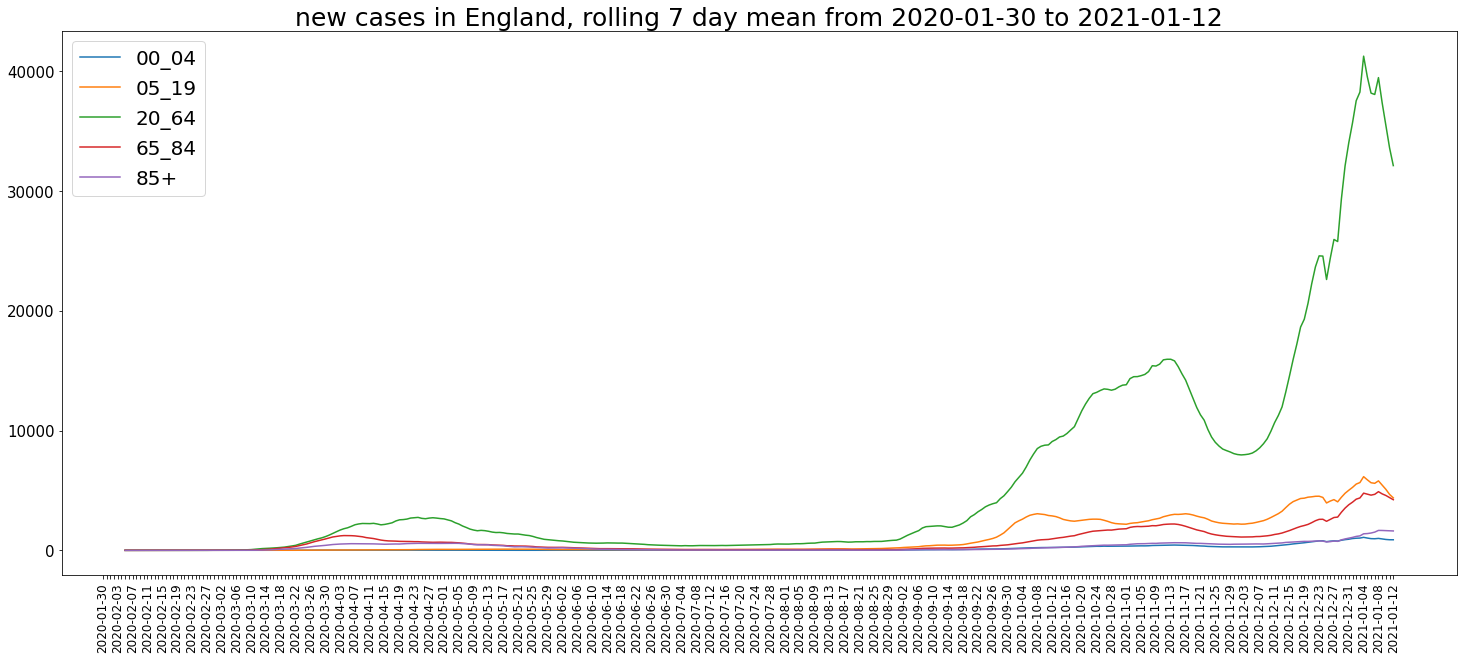

In [90]:
return1, return2, return3 = multiple_line_charts(df_eng_newcasesbyage_Summary, columns, chart_titles, 
                                                 'new cases in England, rolling 7 day mean from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [91]:
columns = ['00_04_rolling7','05_19_rolling7',
           '65_84_rolling7','85+_rolling7']
chart_titles = ['00_04','05_19','65_84','85+']
first_date = df_eng_newcasesbyage_Summary['date'].iloc[0]
last_date = df_eng_newcasesbyage_Summary['date'].iloc[-1]

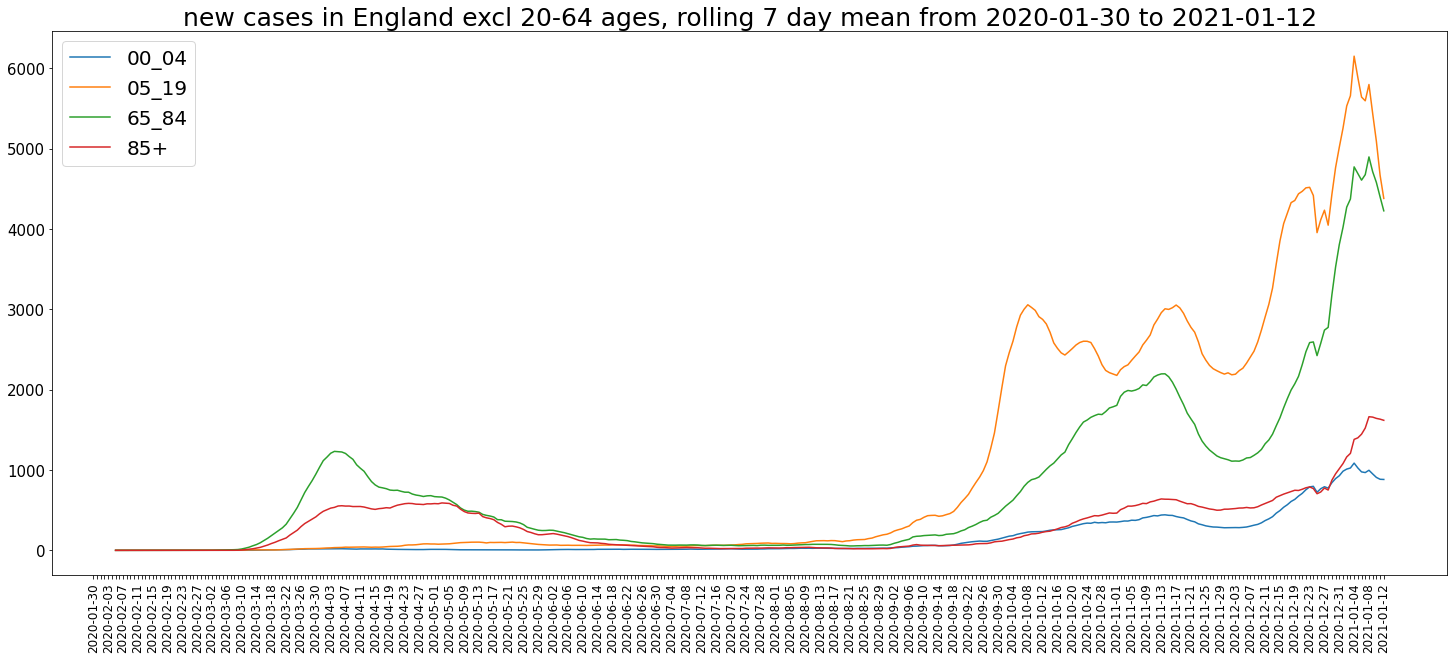

In [92]:
return1, return2, return3 = multiple_line_charts(df_eng_newcasesbyage_Summary, columns, chart_titles, 
                                                 'new cases in England excl 20-64 ages, rolling 7 day mean from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [93]:
columns = ['0_to_5_newrolling7','6_to_17_newrolling7','18_to_64_newrolling7',
            '65_to_84_newrolling7','85+_newrolling7']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_cumadmissionsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumadmissionsbyage_Summary['date'].iloc[-1]

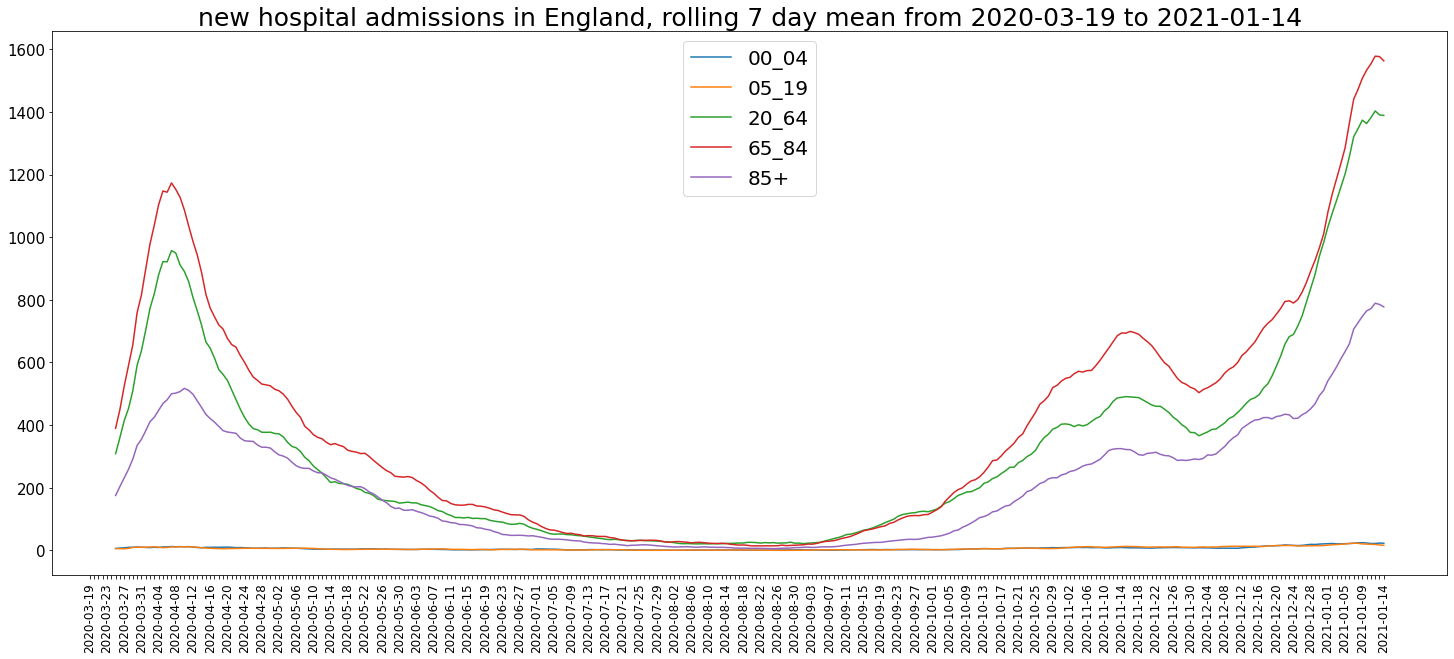

In [94]:
return1, return2, return3 = multiple_line_charts(df_eng_cumadmissionsbyage_Summary, columns, chart_titles, 
                                                 'new hospital admissions in England, rolling 7 day mean from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [95]:
columns = ['00_04_rolling7','05_19_rolling7','20_64_rolling7',
           '65_84_rolling7','85+_rolling7']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_cumdeathsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumdeathsbyage_Summary['date'].iloc[-1]

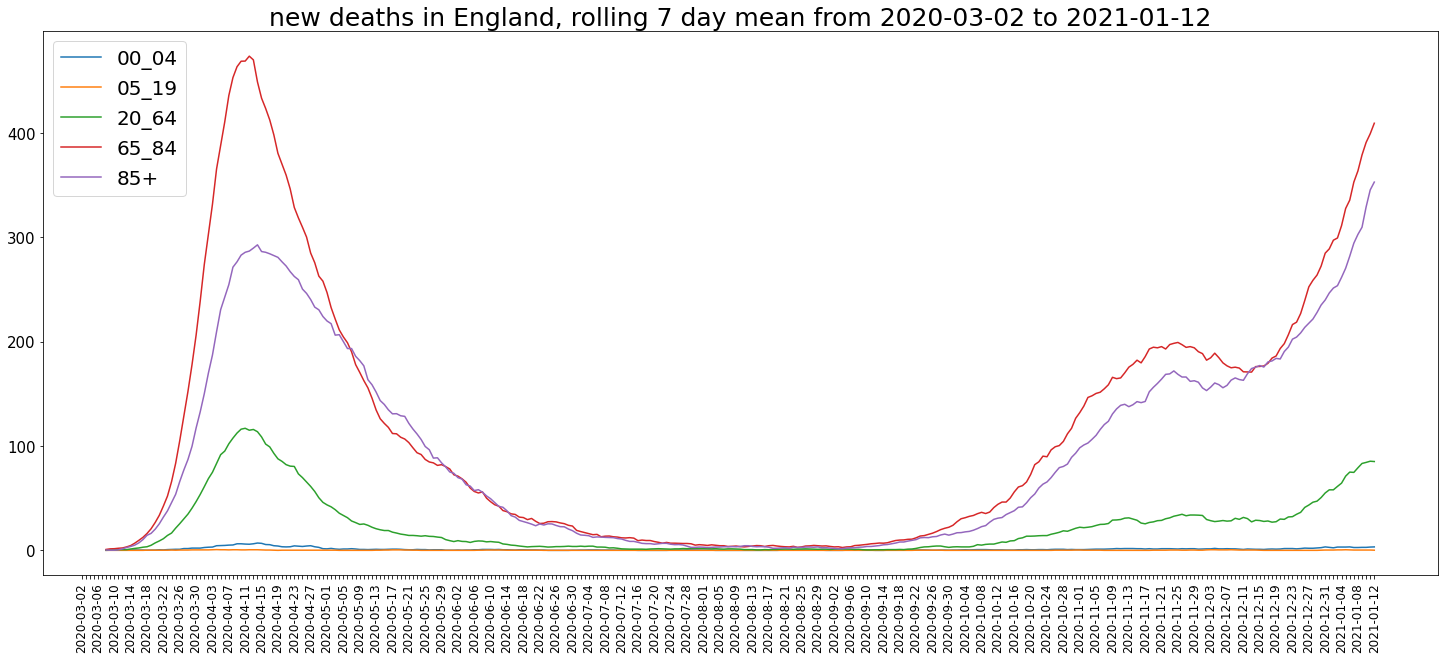

In [96]:
return1, return2, return3 = multiple_line_charts(df_eng_cumdeathsbyage_Summary, columns, chart_titles, 
                                                 'new deaths in England, rolling 7 day mean from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [97]:
columns = ['00_04_rolling7','05_19_rolling7','20_64_rolling7']
chart_titles = ['00_04','05_19','20_64']
first_date = df_eng_cumdeathsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumdeathsbyage_Summary['date'].iloc[-1]

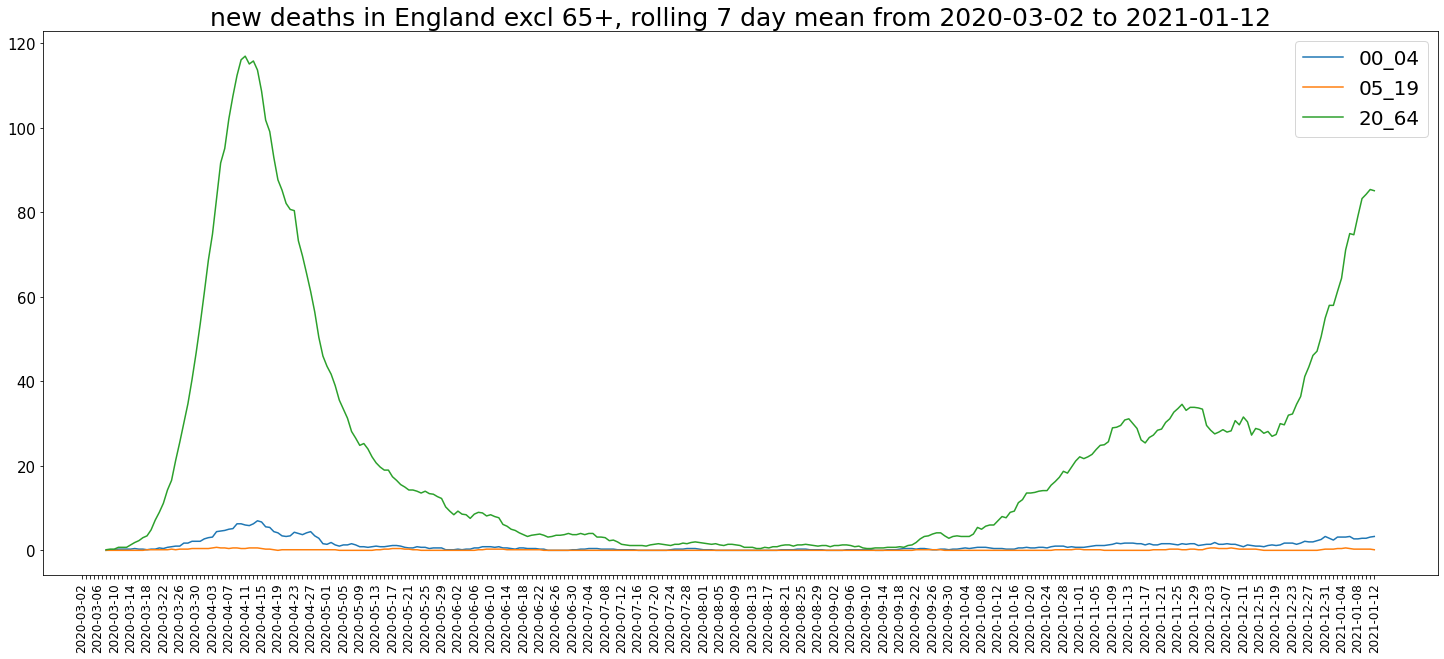

In [98]:
return1, return2, return3 = multiple_line_charts(df_eng_cumdeathsbyage_Summary, columns, chart_titles, 
                                                 'new deaths in England excl 65+, rolling 7 day mean from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [99]:
columns = ['00_04_cumsum','05_19_cumsum','20_64_cumsum',
           '65_84_cumsum','85+_cumsum']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_newcasesbyage_Summary['date'].iloc[0]
last_date = df_eng_newcasesbyage_Summary['date'].iloc[-1]

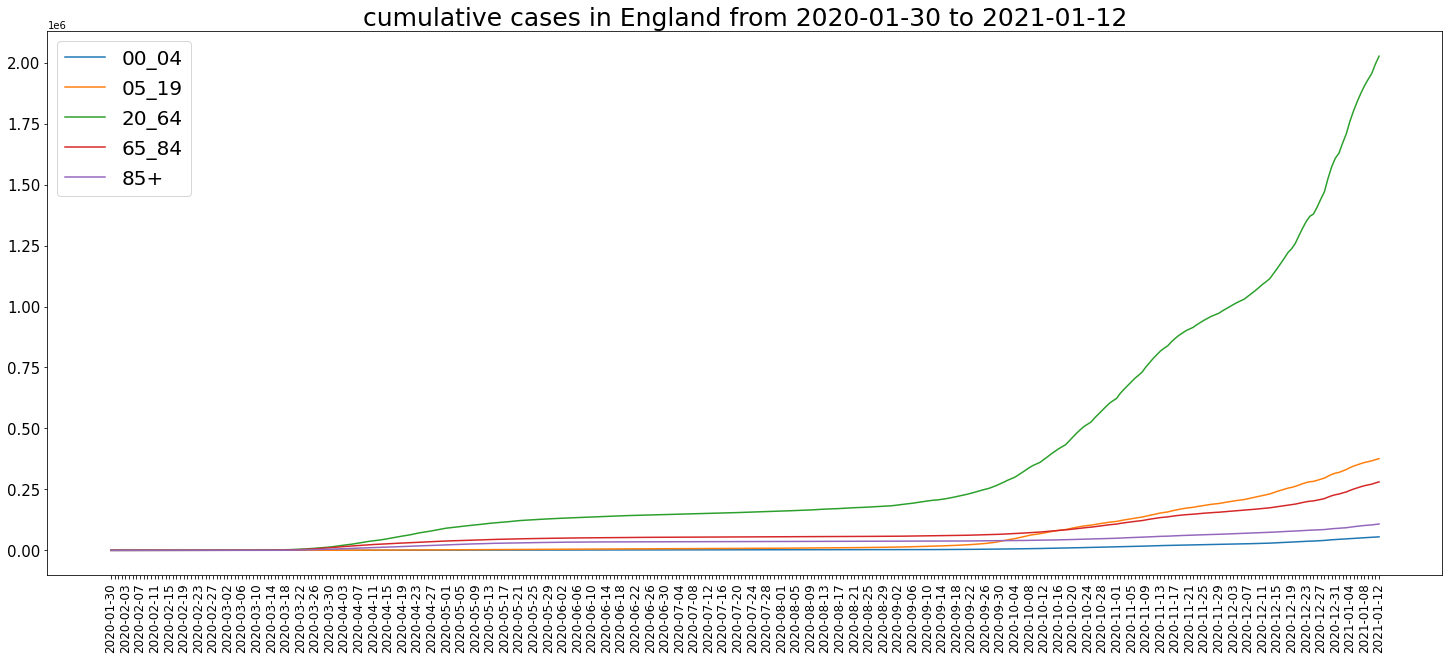

In [100]:
return1, return2, return3 = multiple_line_charts(df_eng_newcasesbyage_Summary, columns, chart_titles, 
                                                 'cumulative cases in England from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [101]:
columns = ['00_04_cumsum','05_19_cumsum',
           '65_84_cumsum','85+_cumsum']
chart_titles = ['00_04','05_19','65_84','85+']
first_date = df_eng_newcasesbyage_Summary['date'].iloc[0]
last_date = df_eng_newcasesbyage_Summary['date'].iloc[-1]

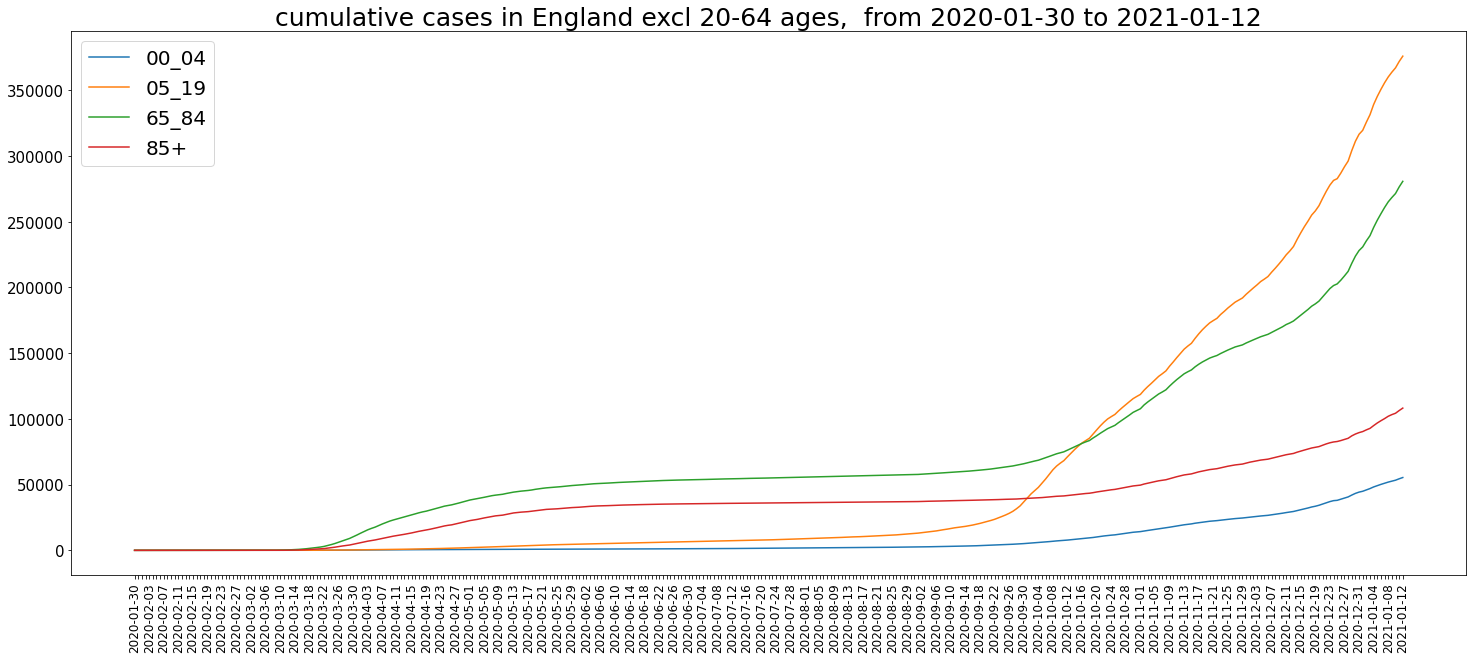

In [102]:
return1, return2, return3 = multiple_line_charts(df_eng_newcasesbyage_Summary, columns, chart_titles, 
                                                 'cumulative cases in England excl 20-64 ages,  from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [103]:
columns = ['0_to_5_newcumsum','6_to_17_newcumsum','18_to_64_newcumsum',
            '65_to_84_newcumsum','85+_newcumsum']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_cumadmissionsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumadmissionsbyage_Summary['date'].iloc[-1]

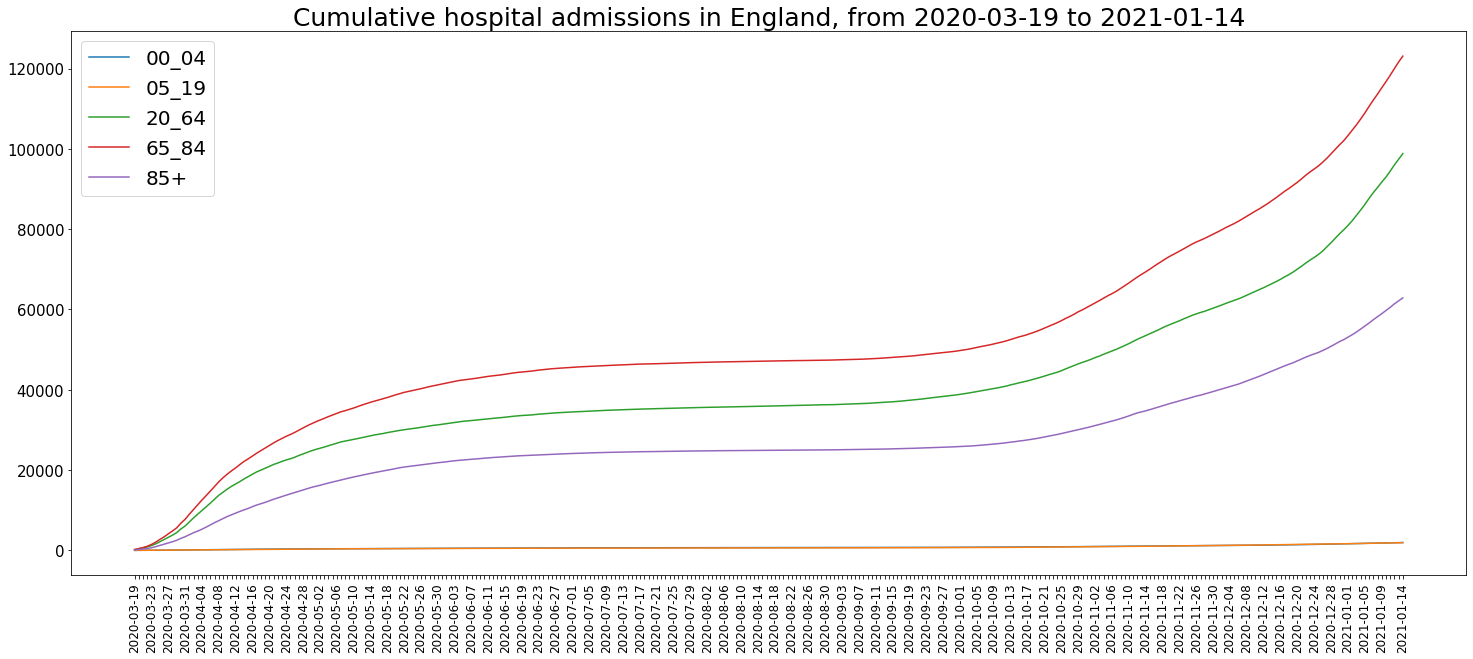

In [104]:
return1, return2, return3 = multiple_line_charts(df_eng_cumadmissionsbyage_Summary, columns, chart_titles, 
                                                 'Cumulative hospital admissions in England, from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [105]:
columns = ['00_04_cumsum','05_19_cumsum','20_64_cumsum',
           '65_84_cumsum','85+_cumsum']
chart_titles = ['00_04','05_19','20_64','65_84','85+']
first_date = df_eng_cumdeathsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumdeathsbyage_Summary['date'].iloc[-1]

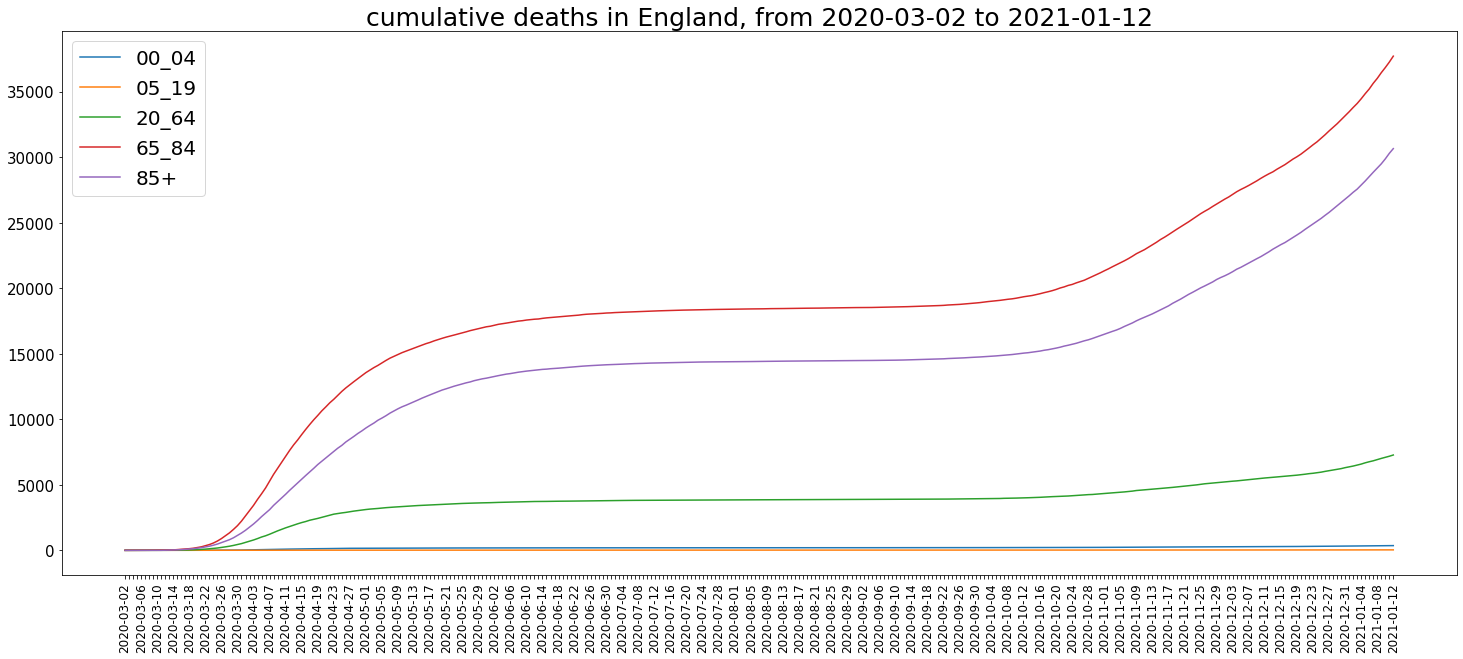

In [106]:
return1, return2, return3 = multiple_line_charts(df_eng_cumdeathsbyage_Summary, columns, chart_titles, 
                                                 'cumulative deaths in England, from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [107]:
columns = ['00_04_cumsum','05_19_cumsum','20_64_cumsum']
chart_titles = ['00_04','05_19','20_64']
first_date = df_eng_cumdeathsbyage_Summary['date'].iloc[0]
last_date = df_eng_cumdeathsbyage_Summary['date'].iloc[-1]

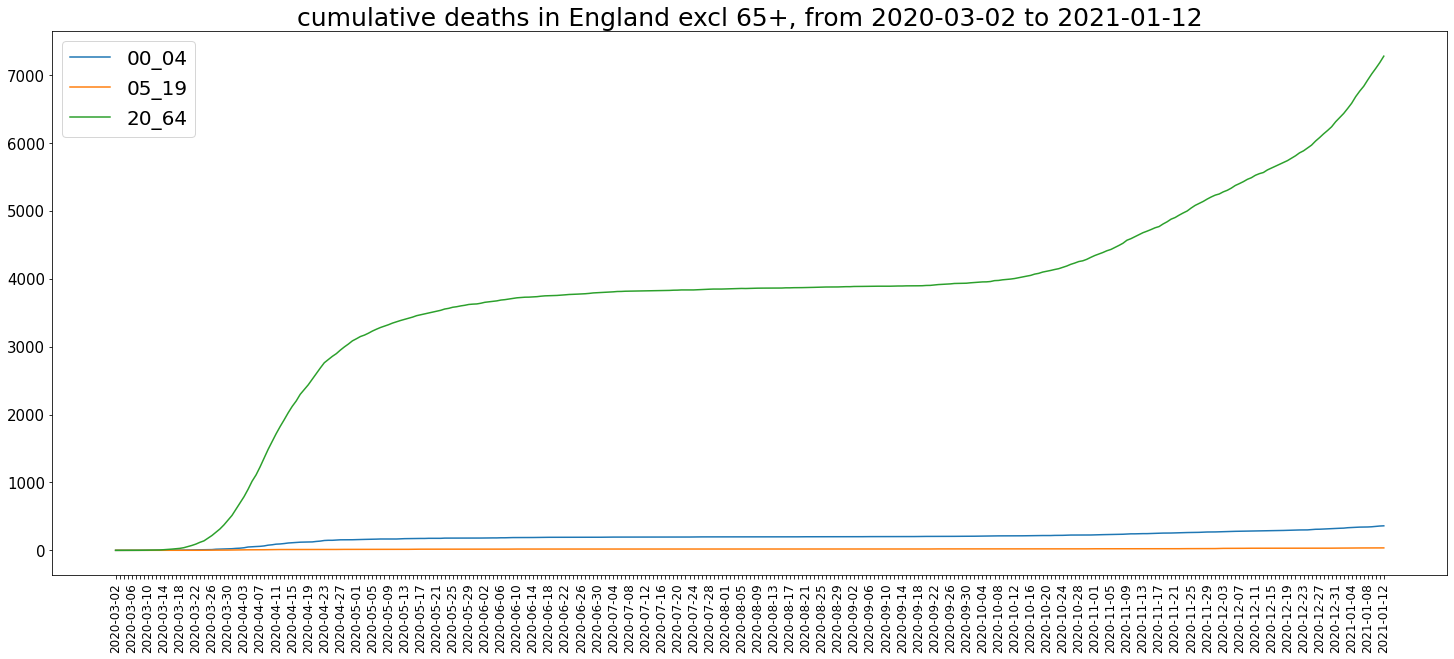

In [108]:
return1, return2, return3 = multiple_line_charts(df_eng_cumdeathsbyage_Summary, columns, chart_titles, 
                                                 'cumulative deaths in England excl 65+, from ' + str(first_date) + ' to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [109]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Regional Data')
    slideText.append('')
    imagePath.append('')

plt.show()

In [110]:
df_EM.tail()

date areaType   areaCode       areaName  newCasesBySpecimenDate  \
326  2021-01-12   region  E12000004  East Midlands                    3220   
327  2021-01-13   region  E12000004  East Midlands                    2782   
328  2021-01-14   region  E12000004  East Midlands                    2613   
329  2021-01-15   region  E12000004  East Midlands                    1984   
330  2021-01-16   region  E12000004  East Midlands                     134   

     newDeaths28DaysByDeathDate  
326                        70.0  
327                        85.0  
328                        73.0  
329                        48.0  
330                        13.0

In [111]:
# add a new column to each dataframe for the rolling 7 day mean

In [112]:
def rolling_seven(df, col_names):
    
    col_names = col_names
    
    for i in range(len(col_names)):
        df[str(col_names[i]) + '_rolling'] = df[str(col_names[i])].rolling(7).mean()

In [113]:
df_list = [df_EM, df_EE, df_LO, df_NE, df_NW, df_SE, df_SW, df_WM, df_YH]

col_names = ['newCasesBySpecimenDate', 'newDeaths28DaysByDeathDate']

In [114]:
for i in range(len(df_list)):
    rolling_seven(df_list[i], col_names)

In [115]:
def regional_charts(df, col_names, chart_titles, region):

    # bar charts showing number of new cases and deaths each day per region

    col_names = col_names

    #fig, ax = plt.subplots(nrows=int(len(col_names)/3)+1, ncols=3, figsize=(25,25))
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(25,25))

    last_date = df['date'].iloc[-1]

    plt.subplots_adjust(hspace=0.4, wspace=0.6)
    plt.suptitle('Bar charts showing daily new cases and new deaths in ' + str(region) + ' to ' + last_date, fontsize = 20)
    #plt.suptitle("anything over 'Less than a year' indicates that returning members keep their history", fontsize = 20)

    x = df.index.values

    labels = list(df['date'])

    # for i in range(1,len(labels),2):
    #     labels[i-1]=''
    # if len(labels) % 2 != 0:
    #     labels[-1]=''


    # prevent x-axis labels from overlapping by printing every nth label
    for i in range(4,len(labels),4):
        labels[i-1], labels[i-2], labels[i-3]='','',''

    labels[len(labels)-1]=list(df['date'])[-1]
    labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''


    for ii in range(len(col_names)):
        #for i in range(len(df)):
        y1 = df[col_names[ii]]
        y2 = df[str(col_names[ii]) + '_rolling']
        ax[ii].set_title(chart_titles[ii], fontsize=20)
        ax[ii].set_xticks(x)
        ax[ii].set_xticklabels(labels, rotation = 90, fontsize=12)
        ax[ii].yaxis.set_tick_params(labelsize=15)
        ax[ii].yaxis.set_major_locator(MaxNLocator(integer=True))
        ax[ii].bar(x,y1, color='#1f77b4')
        #ax[ii].plot(x,y2, color='#bcbd22', lw=4)
        ax[ii].plot(x,y2, color='black', lw=4)
        #ax[int(ii/3),ii - 3*int(ii/3)].bar(df_deaths_comp['date'][i],y1[i], color='#1f77b4')

    start_date = df['date'].iloc[0]
    end_date = df['date'].iloc[-1]

    #fileName = 'Coviduk - Bar charts cumulative deaths each week by age group.png'

    #slideTitle.append('Bar charts cumulative deaths each week by age group to ' + last_date)
    #slideText.append(str(start_date) + ' to ' + str(end_date))
    #imagePath.append(fileName)

    # need to remove any dates filename when saved as .png given they change
    #plt.savefig(fileName, bbox_inches = 'tight')

    #     slideTitle_ = 'Bar charts cumulative deaths each week by age group to ' + last_date
    #     slideText_ = (str(start_date) + ' to ' + str(end_date))
    #     imagePath_ = (fileName)  

    #plt.show()

    fileName = 'Coviduk - regional charts for ' + str(region) + '.png'  
    
    
    # need to remove any dates filename when saved as .png given they change
    plt.savefig(fileName, bbox_inches = 'tight')
    
    slideTitle_ = str(region) + ': daily cases and daily deaths'
    slideText_ = (str(start_date) + ' to ' + str(end_date))
    imagePath_ = (fileName)  
    
    plt.show()
    
    return slideTitle_, slideText_, imagePath_ 

In [116]:
col_names = ['newCasesBySpecimenDate', 'newDeaths28DaysByDeathDate']

chart_titles = ['daily new cases and 7 day rolling mean',
                'daily new deaths by date of death and 7 day rolling mean']

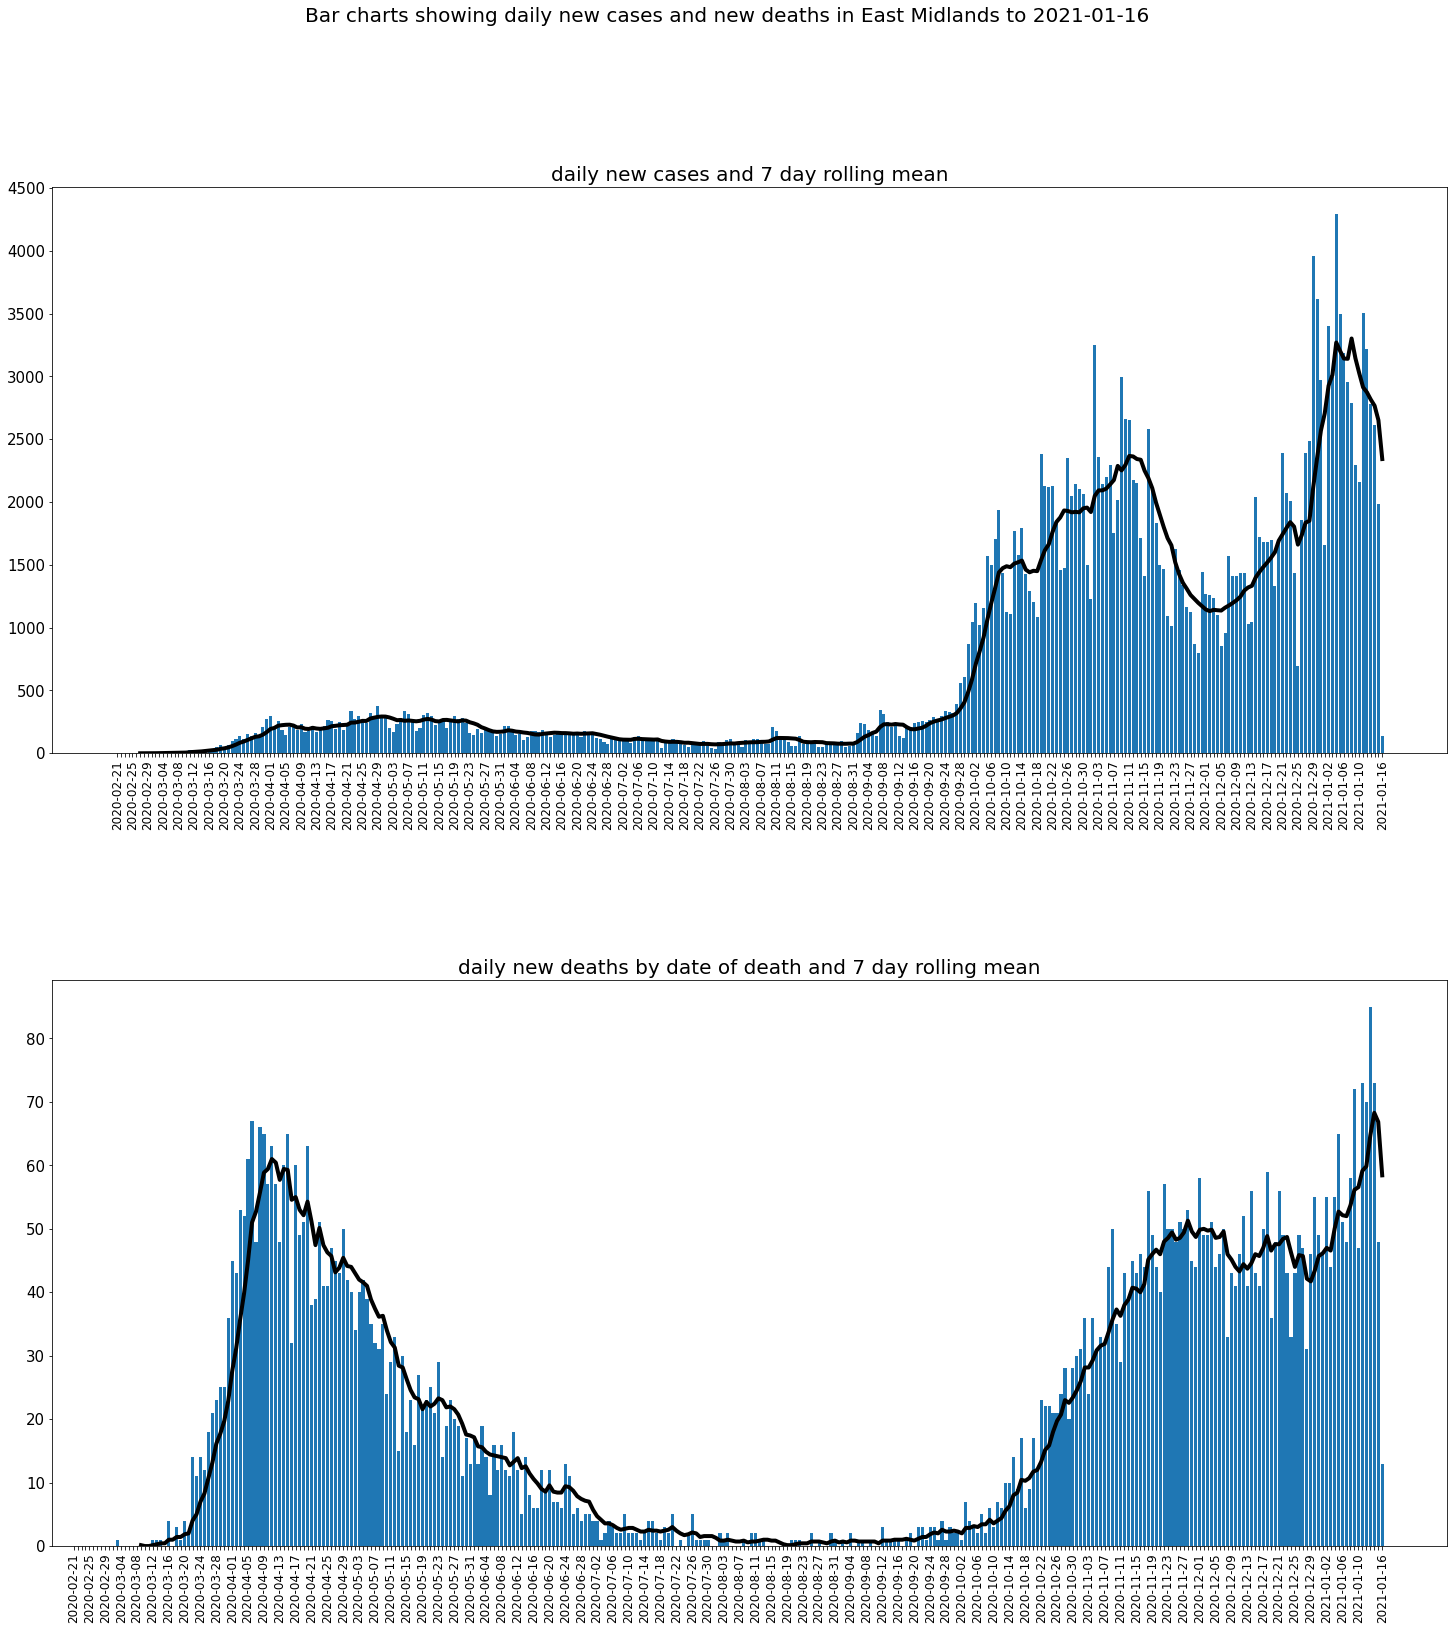

In [117]:
return1, return2, return3 = regional_charts(df_EM, col_names, chart_titles, 'East Midlands')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

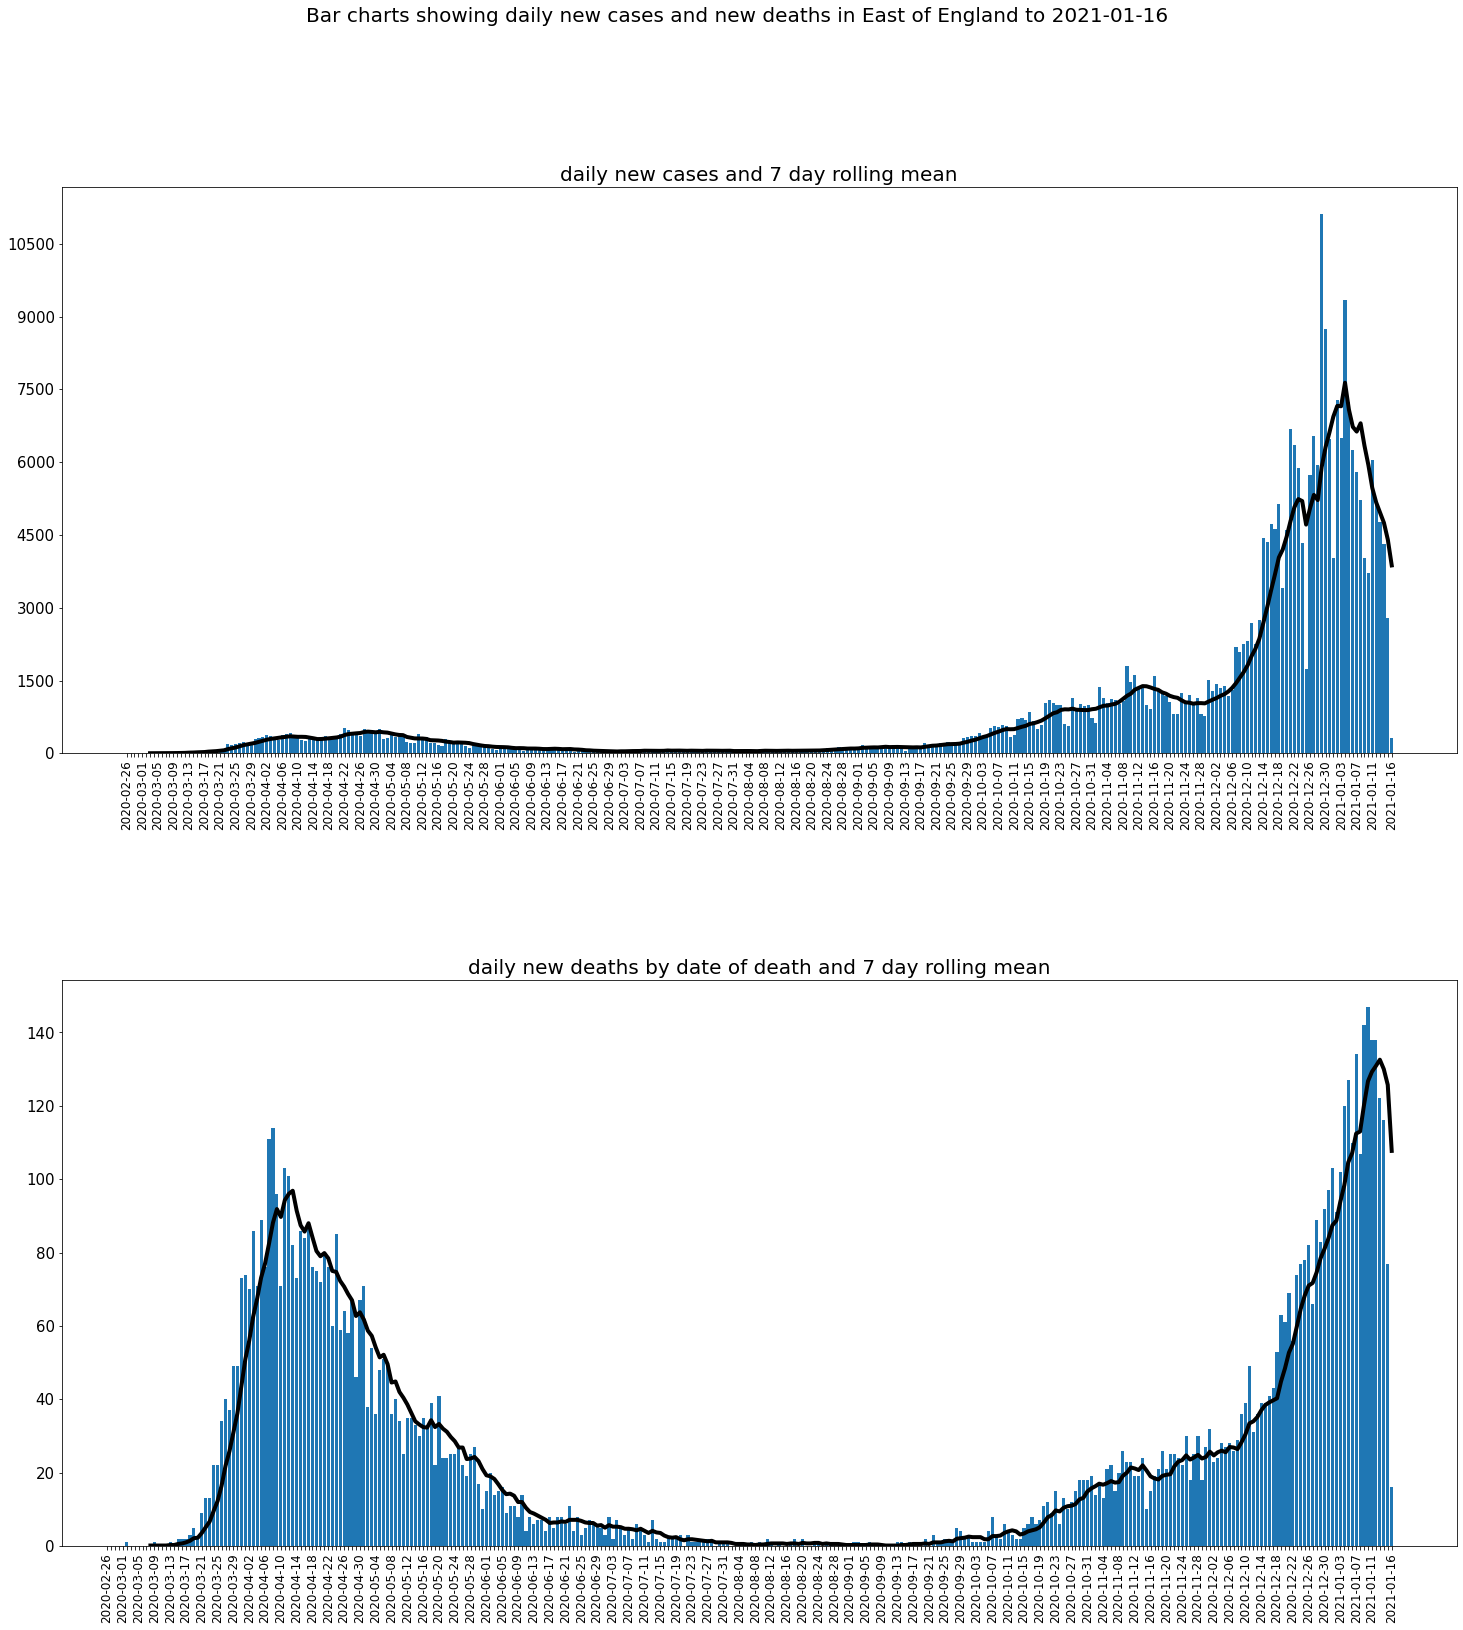

In [118]:
return1, return2, return3 = regional_charts(df_EE, col_names, chart_titles, 'East of England')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

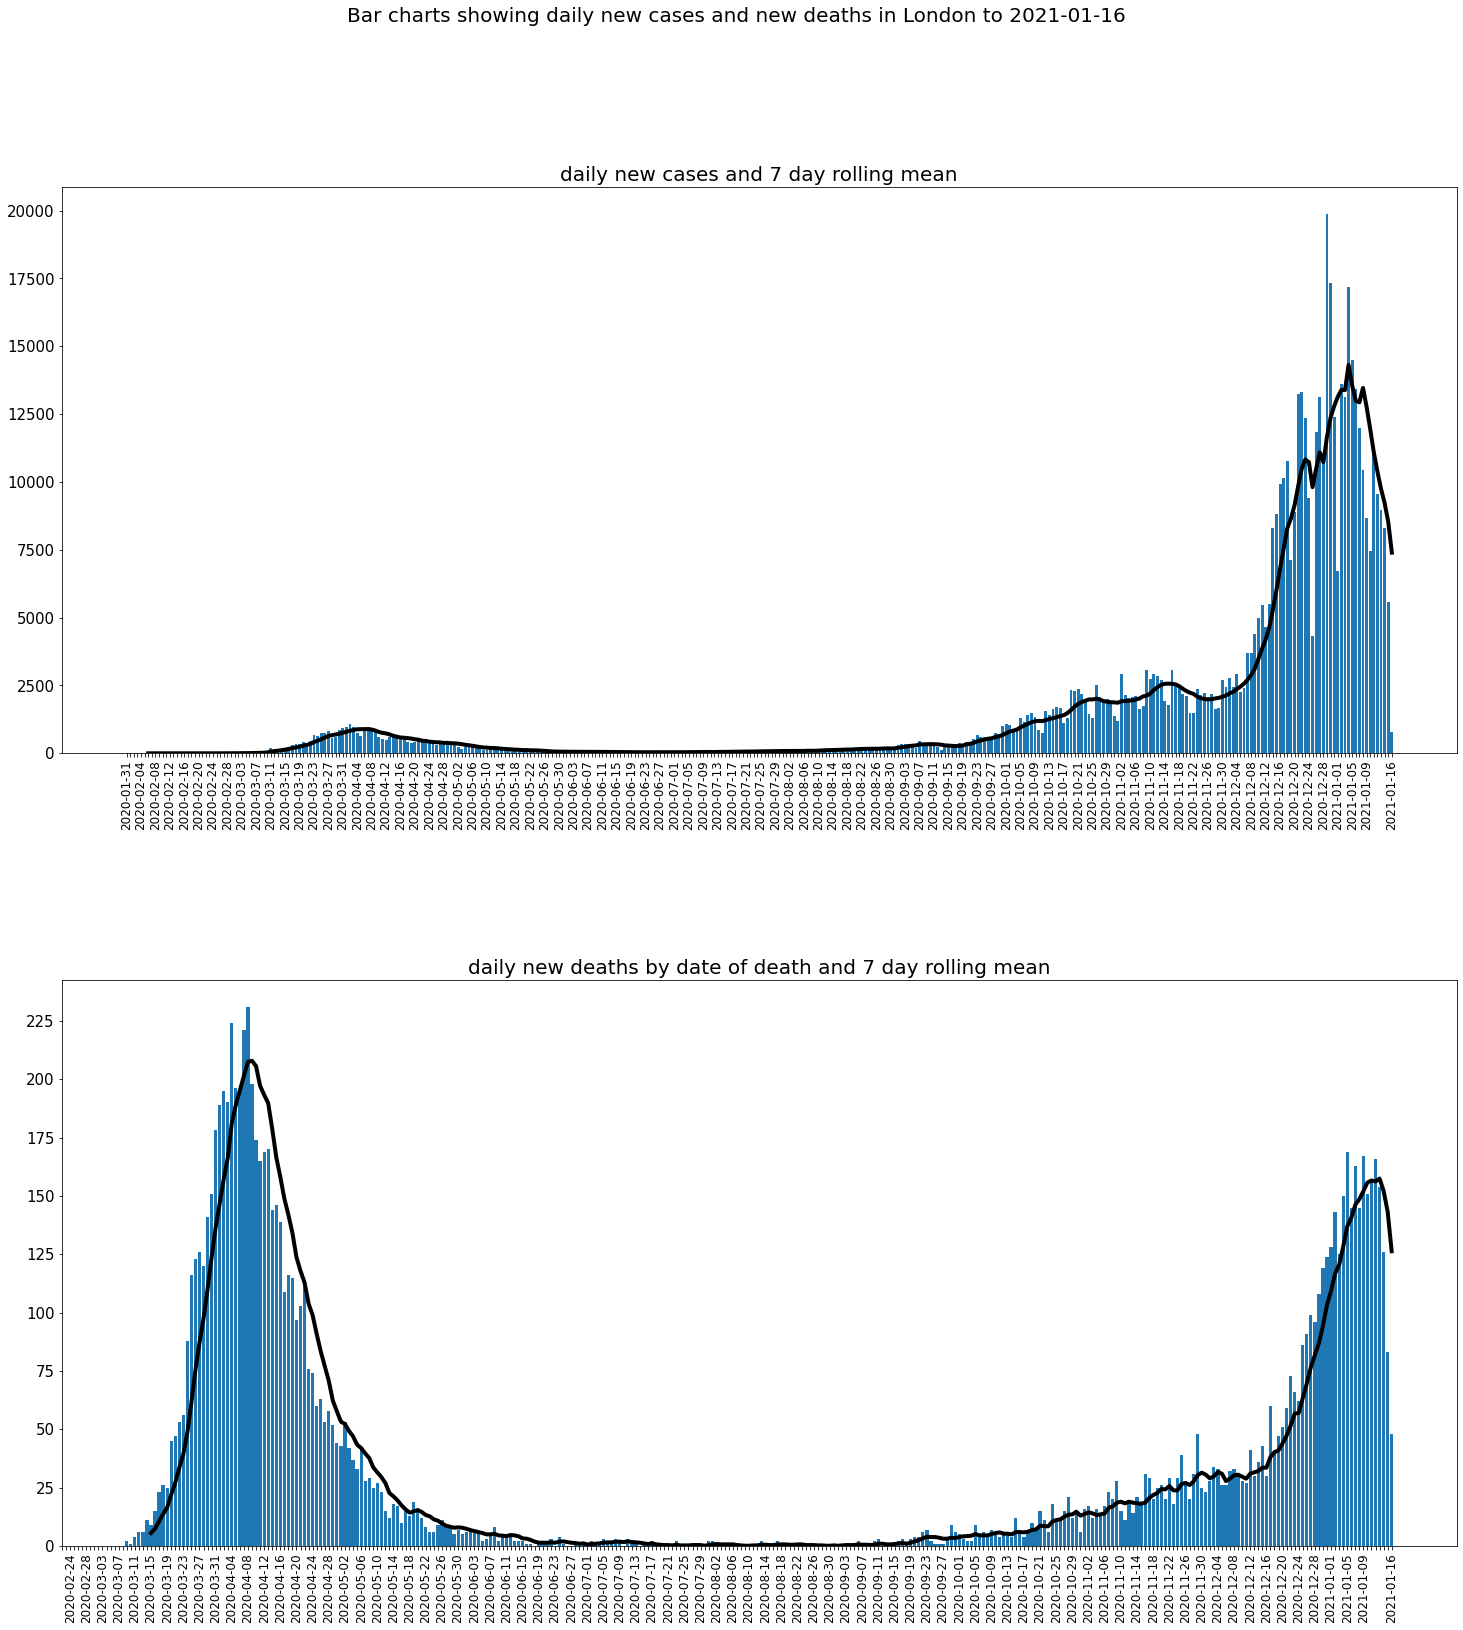

In [119]:
return1, return2, return3 = regional_charts(df_LO, col_names, chart_titles, 'London')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

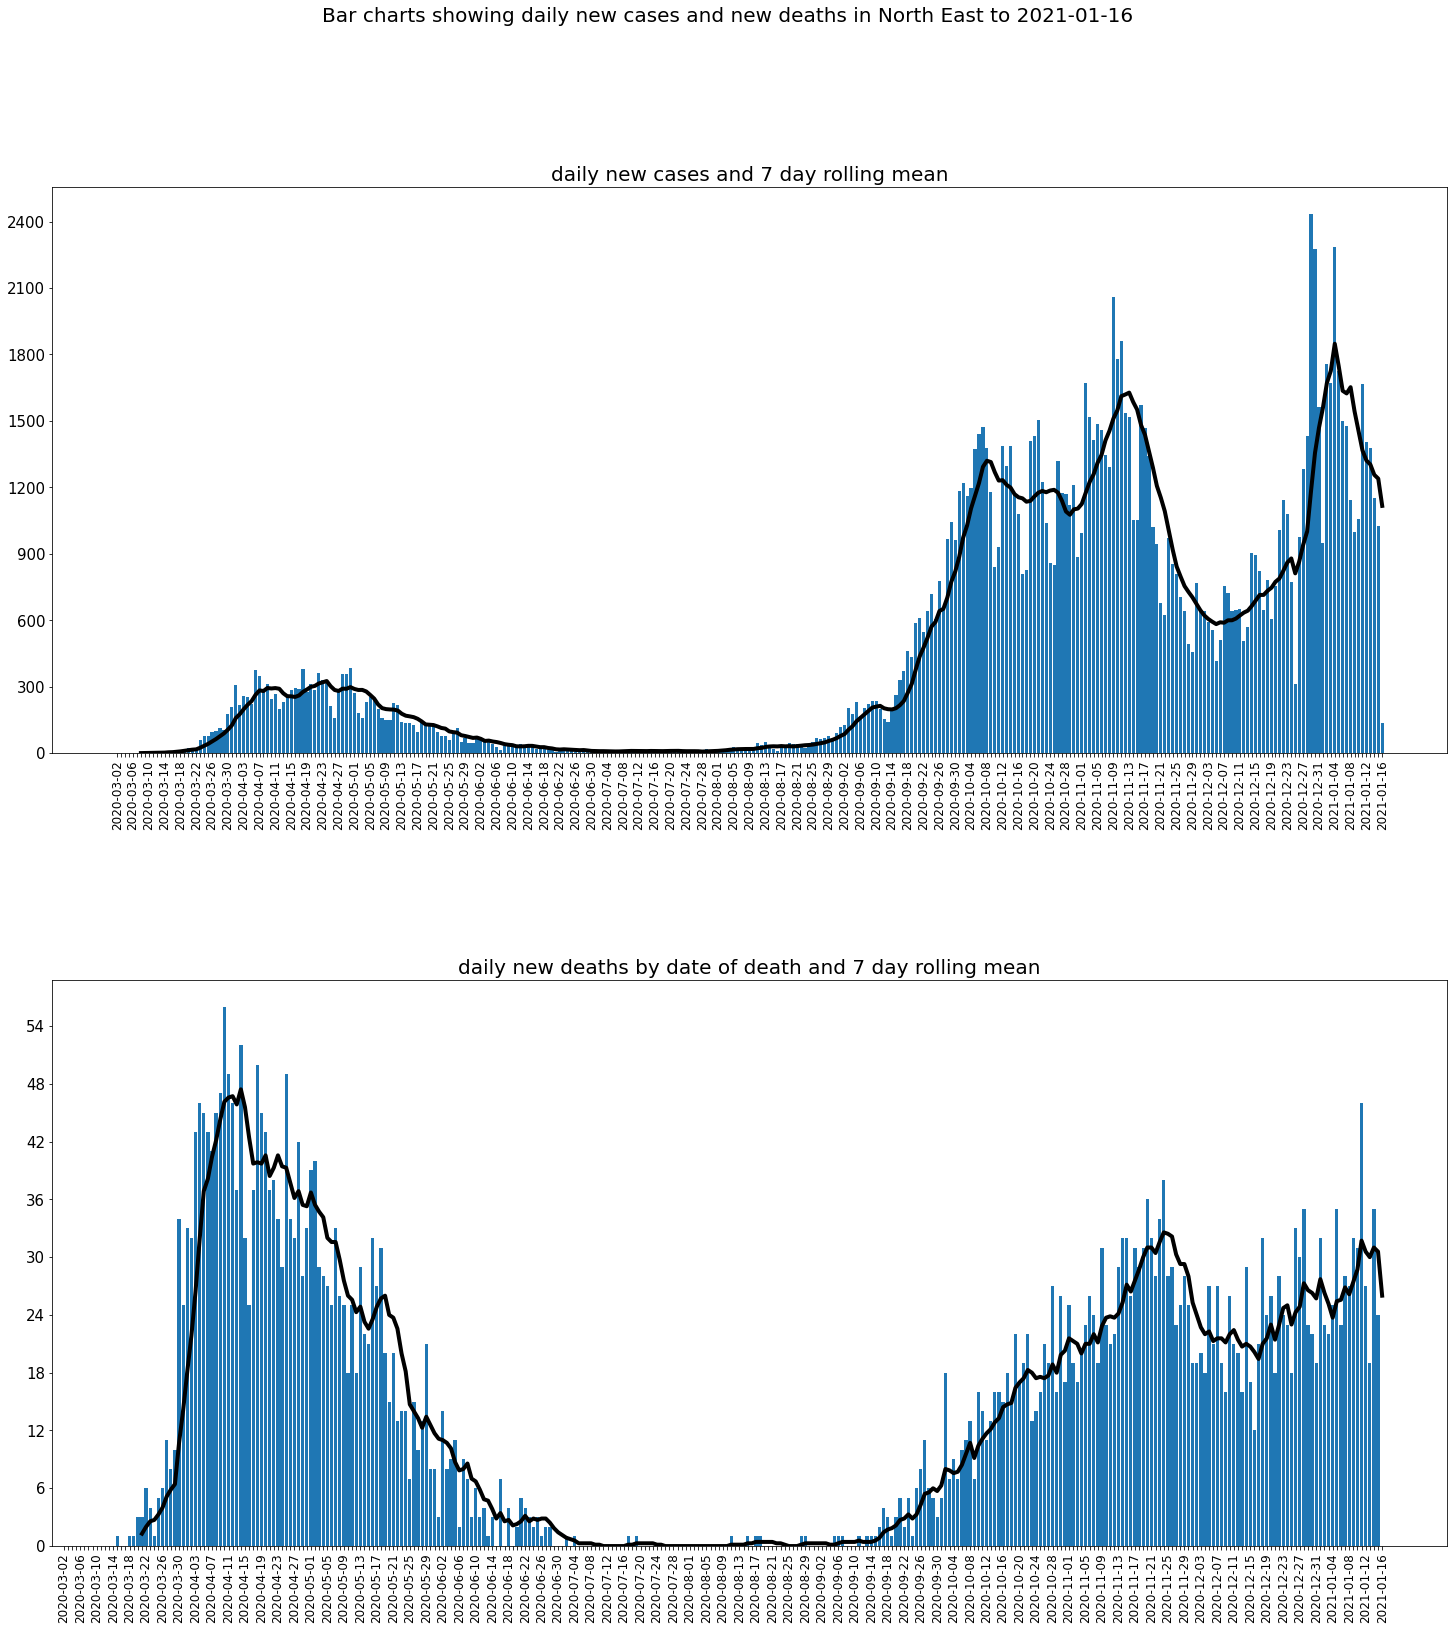

In [120]:
return1, return2, return3 = regional_charts(df_NE, col_names, chart_titles, 'North East')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

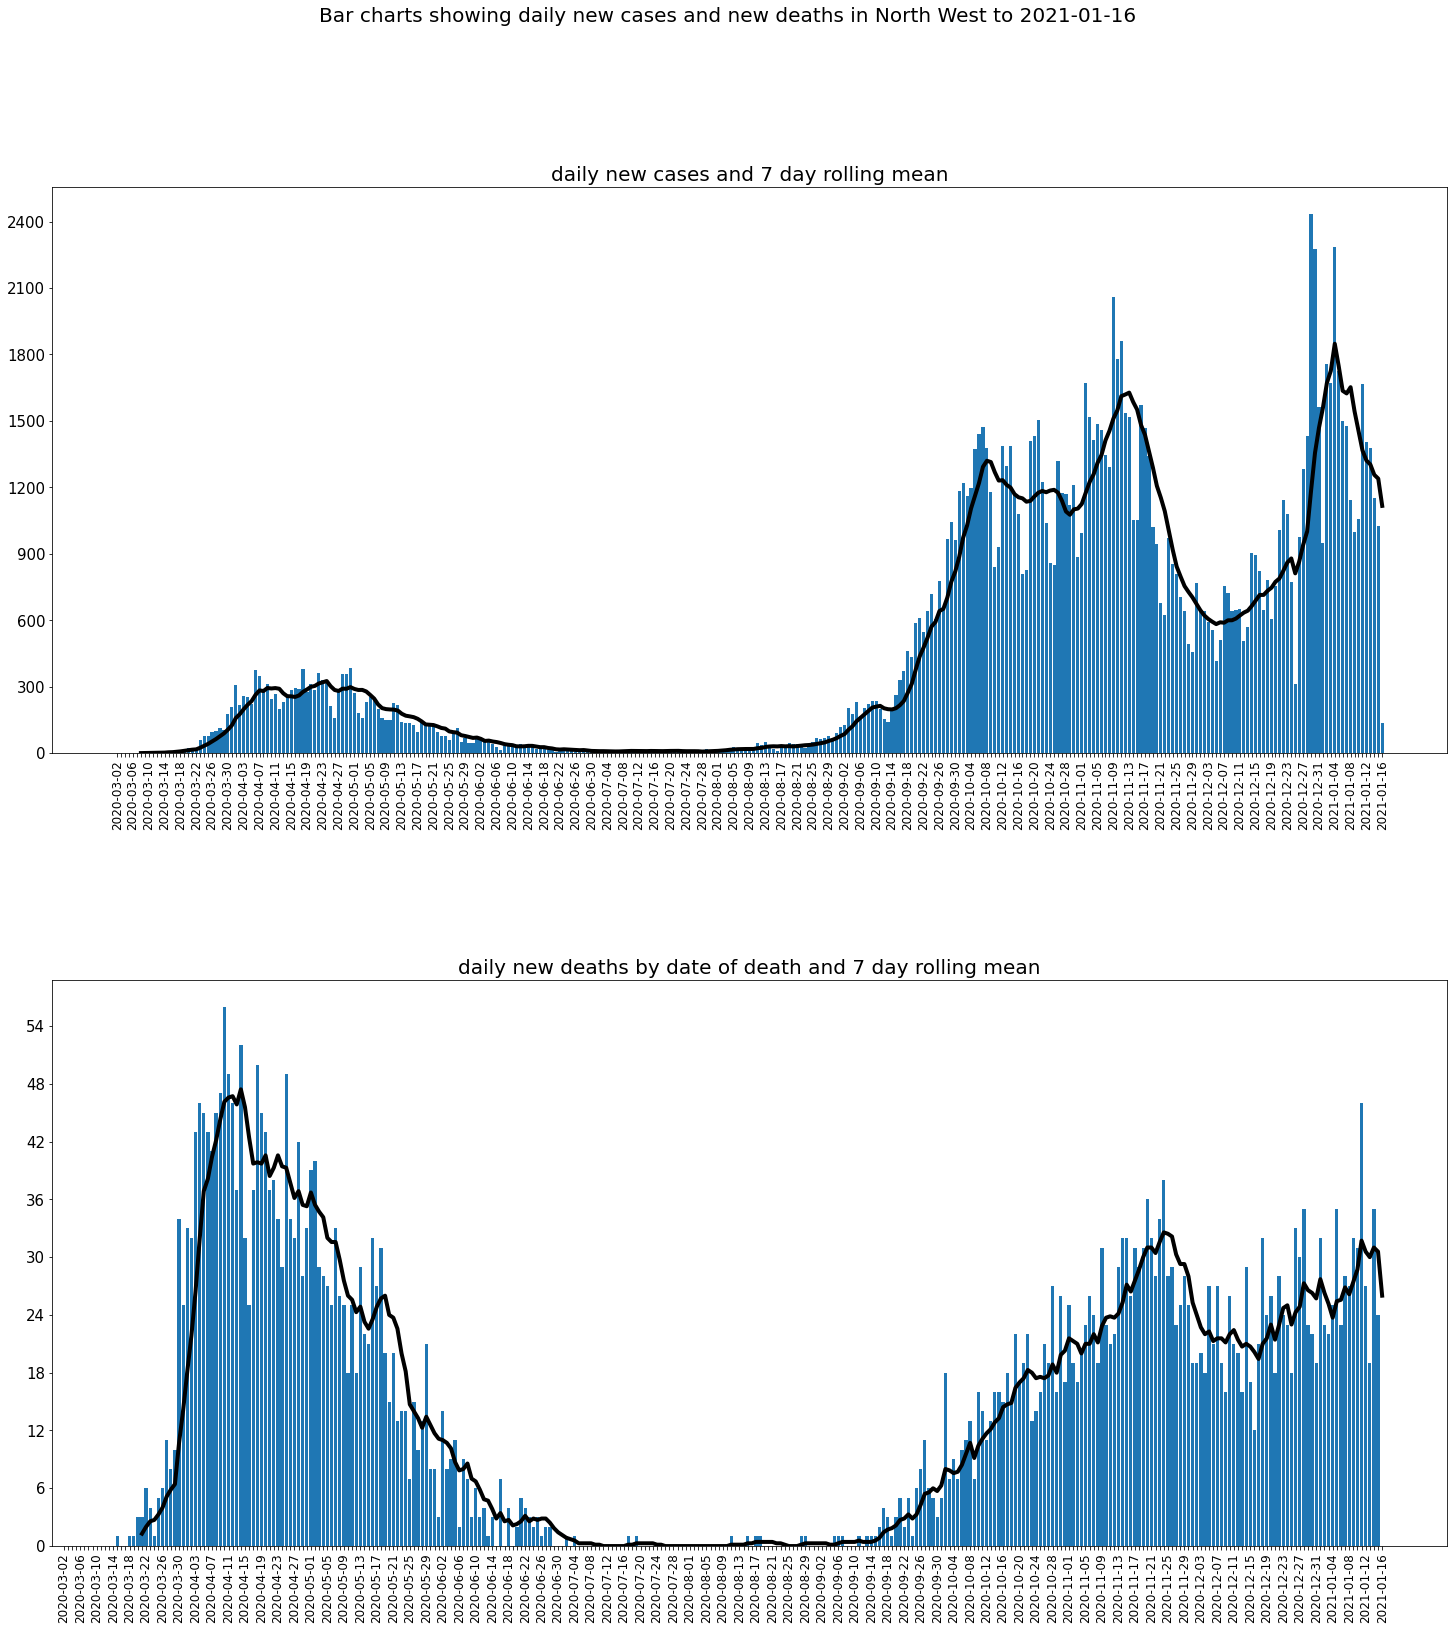

In [121]:
return1, return2, return3 = regional_charts(df_NW, col_names, chart_titles, 'North West')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

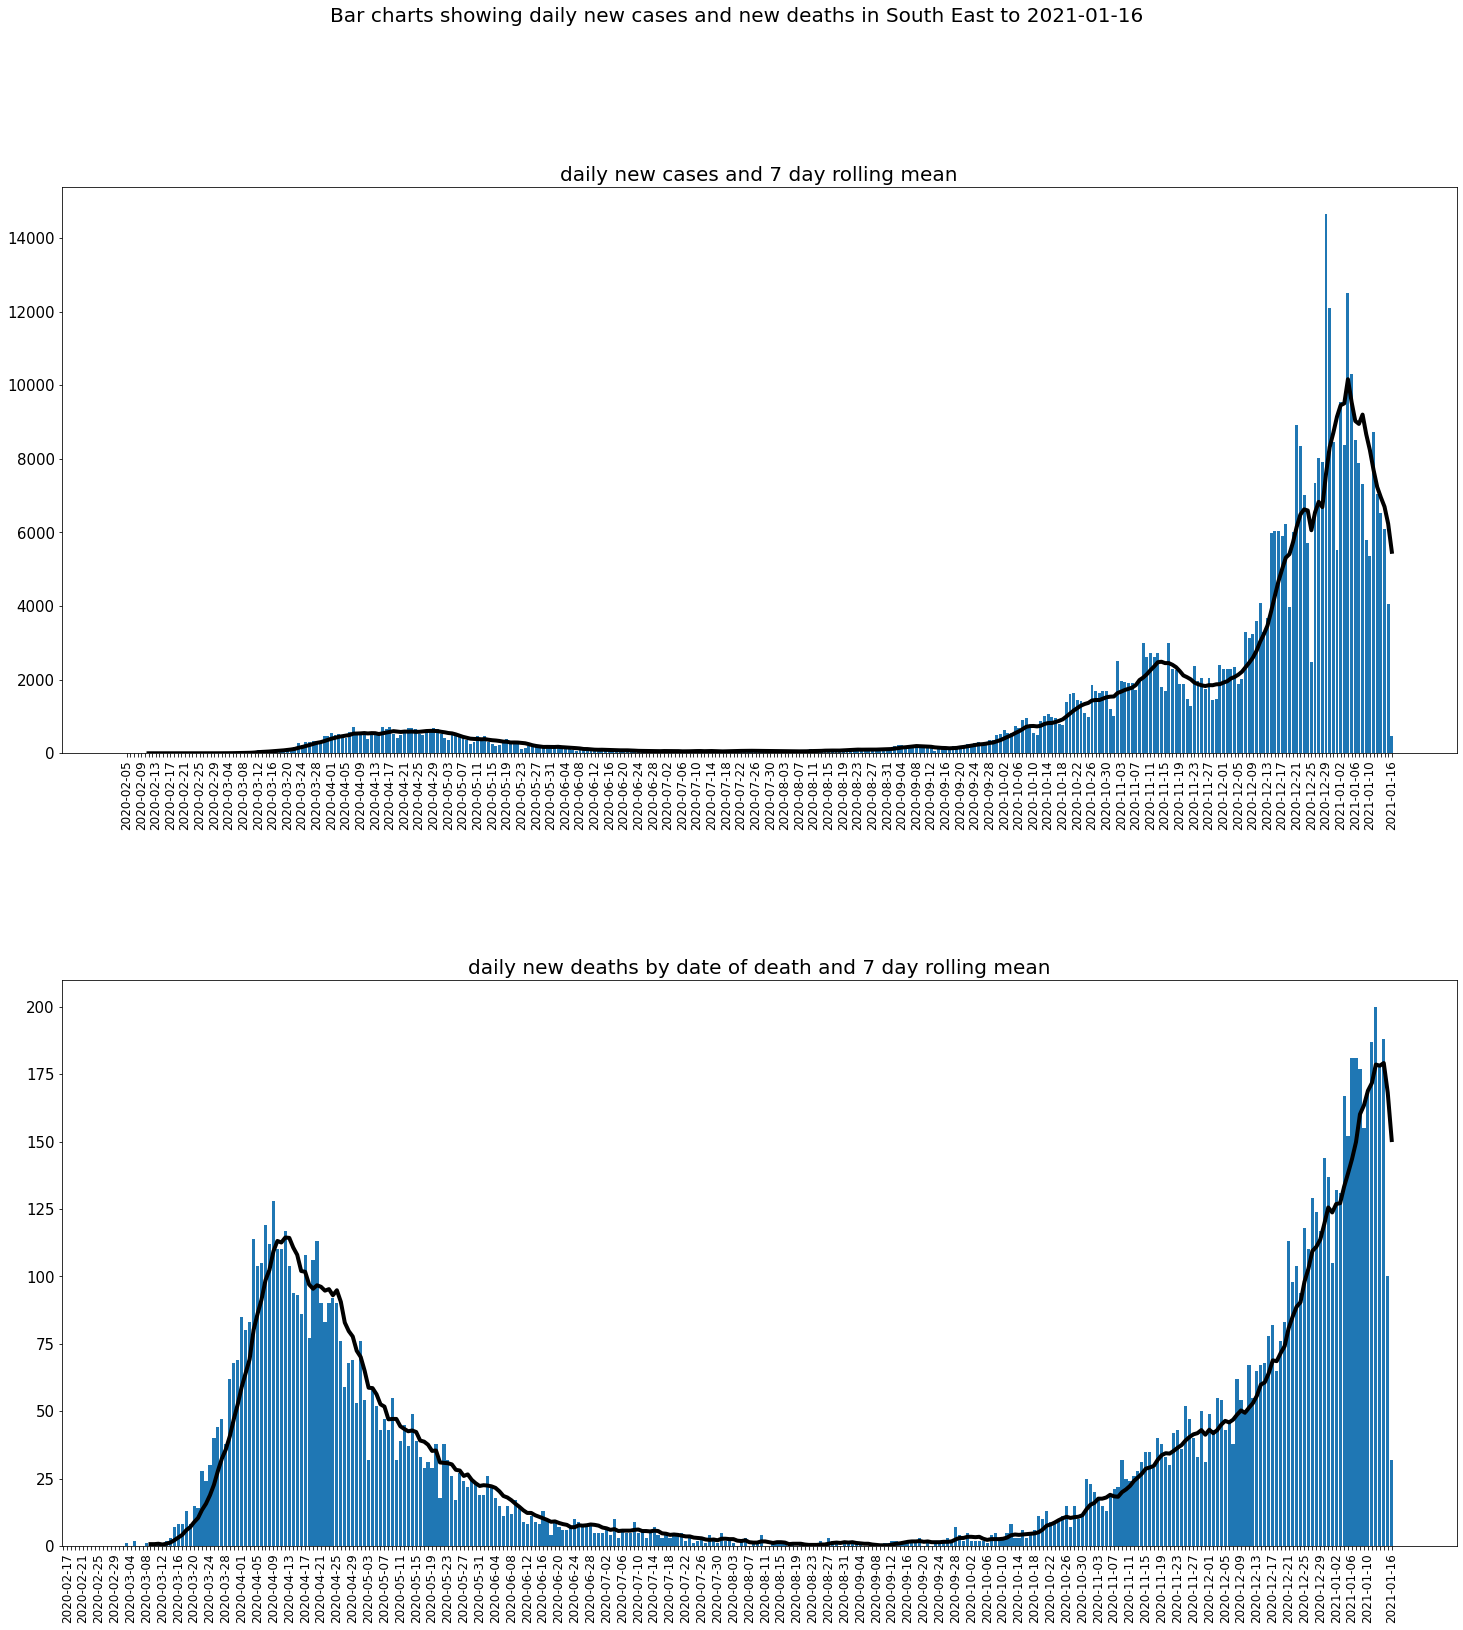

In [122]:
return1, return2, return3 = regional_charts(df_SE, col_names, chart_titles, 'South East')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

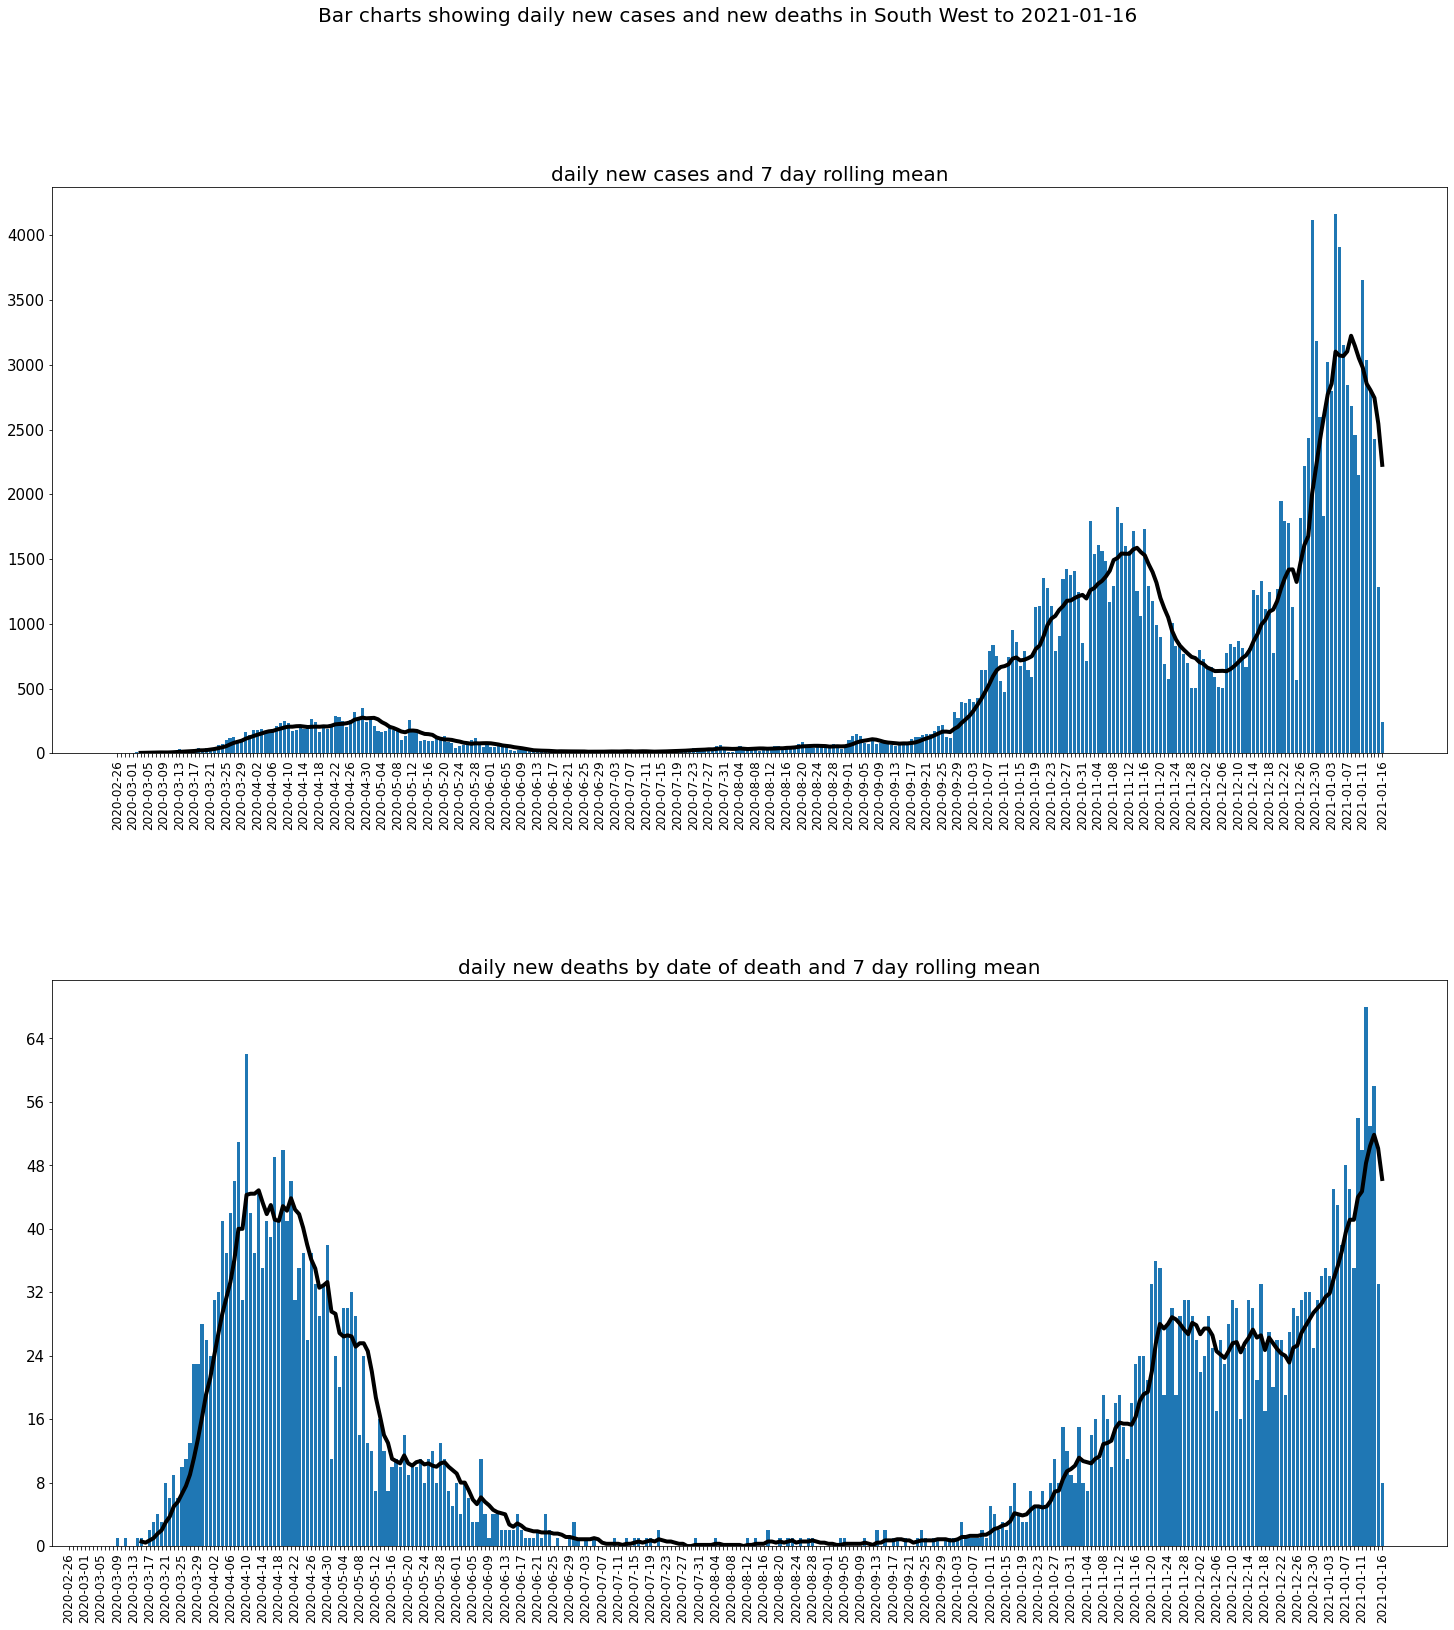

In [123]:
return1, return2, return3 = regional_charts(df_SW, col_names, chart_titles, 'South West')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

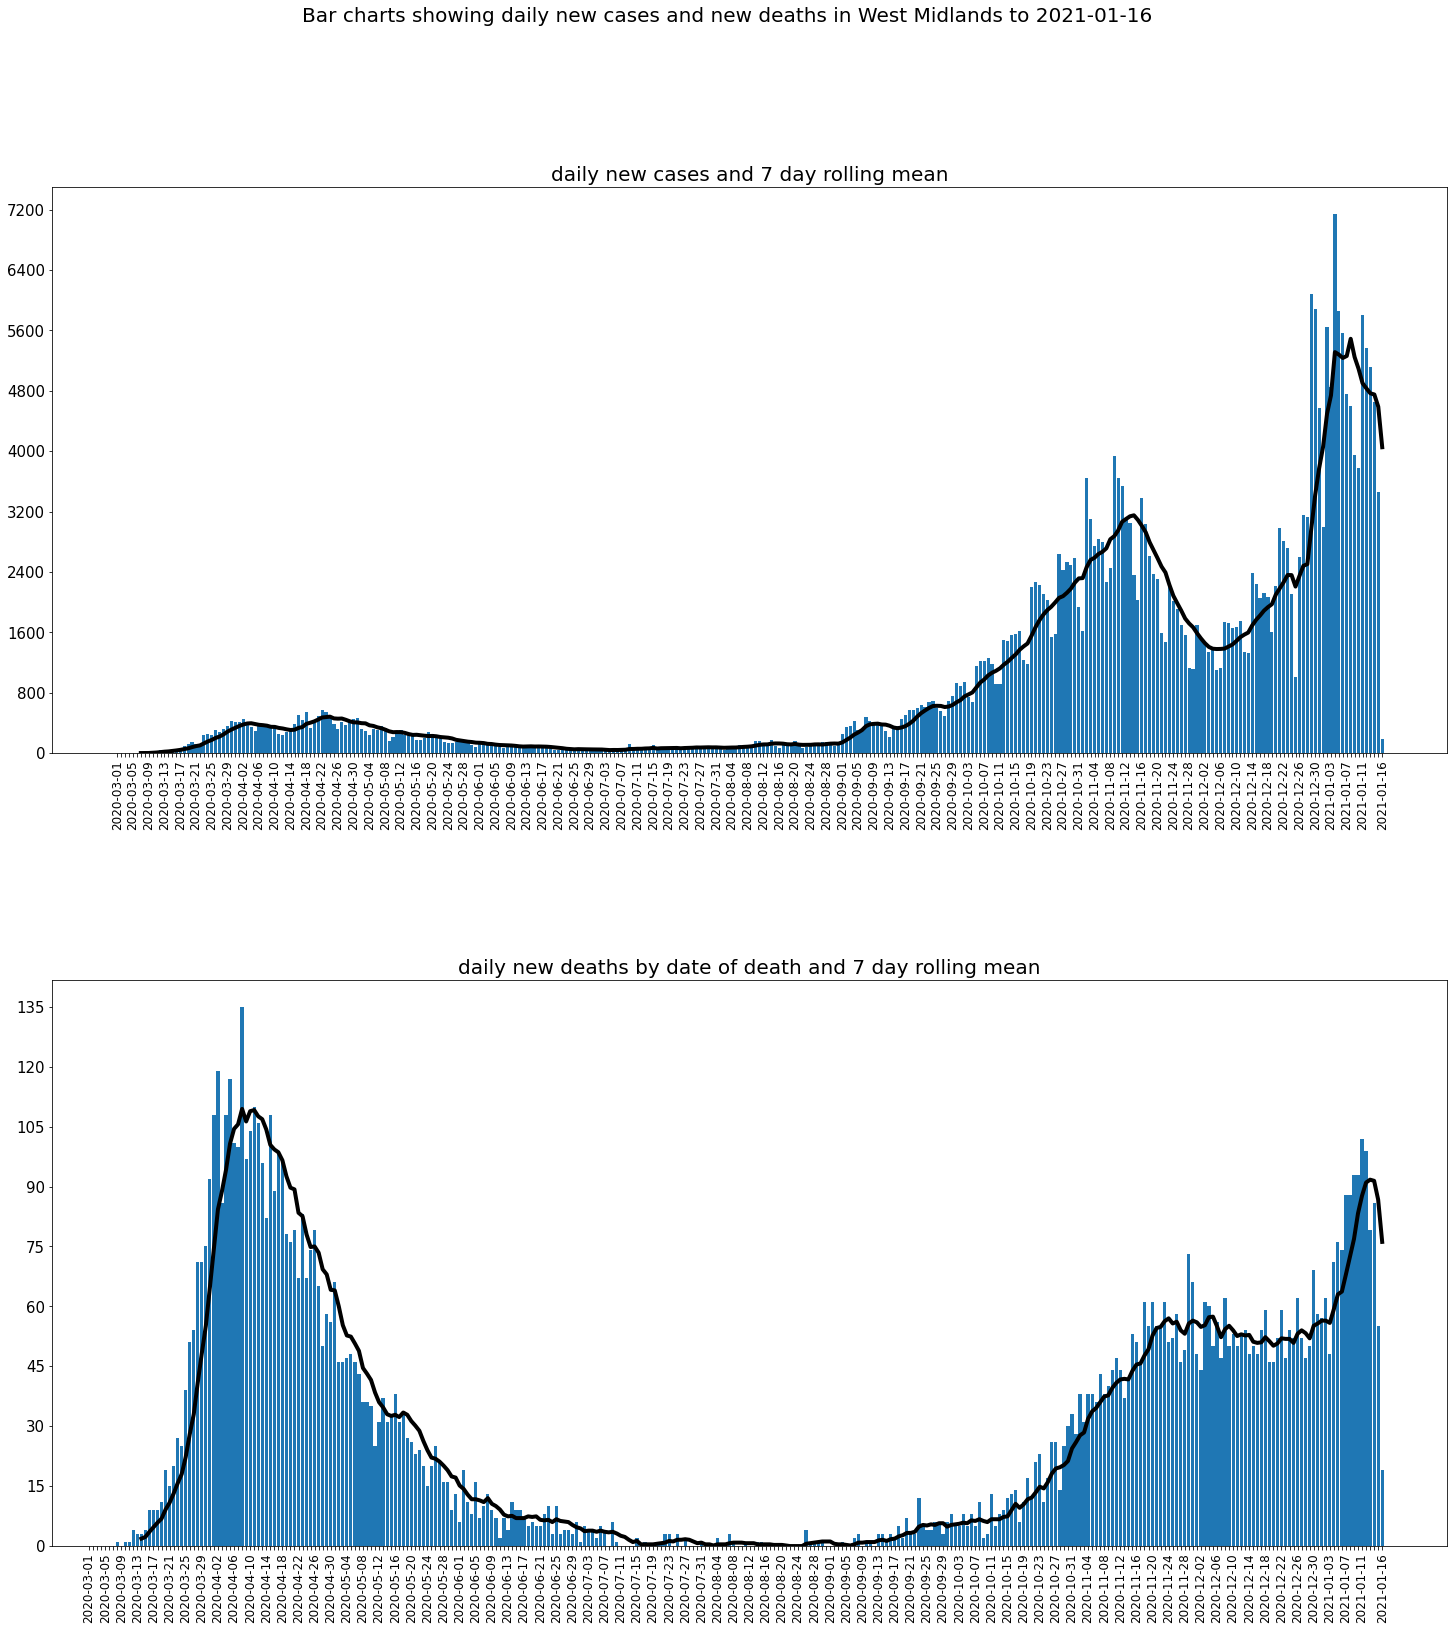

In [124]:
return1, return2, return3 = regional_charts(df_WM, col_names, chart_titles, 'West Midlands')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

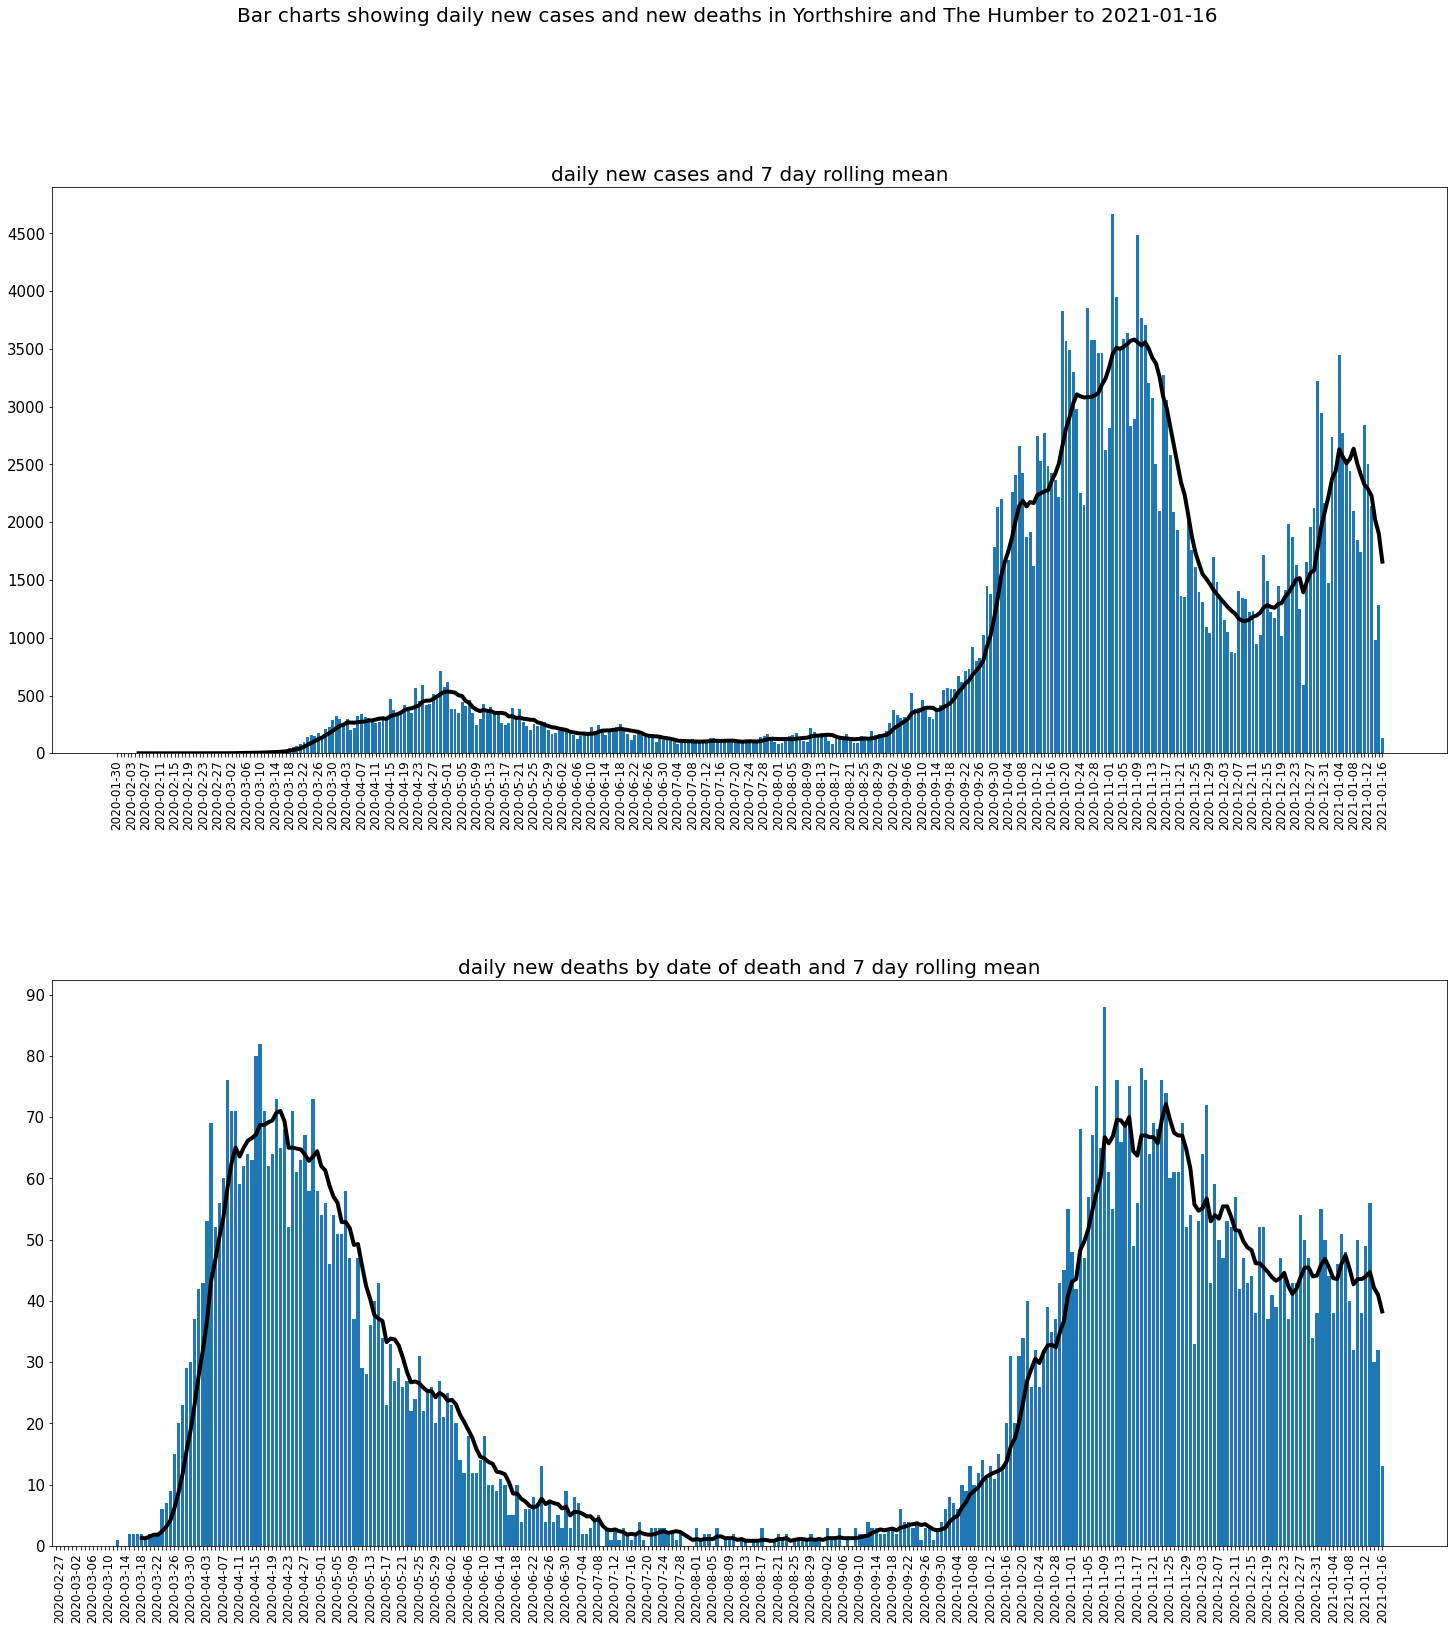

In [125]:
return1, return2, return3 = regional_charts(df_YH, col_names, chart_titles, 'Yorthshire and The Humber')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [126]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Data for the UK by Age (Deaths is always a couple of weeks old): Cases and Deaths')
    slideText.append('')
    imagePath.append('')

plt.show()

In [127]:
df_casesAge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7678 entries, 0 to 7677
Data columns (total 9 columns):
date           7678 non-null object
areaType       7678 non-null object
areaCode       7678 non-null object
areaName       7678 non-null object
metric         7678 non-null object
age            7678 non-null object
cases          7678 non-null int64
rollingRate    7329 non-null float64
rollingSum     7678 non-null int64
dtypes: float64(1), int64(2), object(6)
memory usage: 540.0+ KB


In [128]:
df_casesAge.drop_duplicates(inplace=True)
df_casesAge.reset_index(drop=True)

date  areaType   areaCode        areaName  \
0     2020-01-30  overview  K02000001  United Kingdom   
1     2020-01-30  overview  K02000001  United Kingdom   
2     2020-01-30  overview  K02000001  United Kingdom   
3     2020-01-30  overview  K02000001  United Kingdom   
4     2020-01-30  overview  K02000001  United Kingdom   
...          ...       ...        ...             ...   
7673  2021-01-12  overview  K02000001  United Kingdom   
7674  2021-01-12  overview  K02000001  United Kingdom   
7675  2021-01-12  overview  K02000001  United Kingdom   
7676  2021-01-12  overview  K02000001  United Kingdom   
7677  2021-01-12  overview  K02000001  United Kingdom   

                                     metric         age  cases  rollingRate  \
0     newCasesBySpecimenDateAgeDemographics       00_04      0          0.0   
1     newCasesBySpecimenDateAgeDemographics  unassigned      0          NaN   
2     newCasesBySpecimenDateAgeDemographics         90+      0          0.0   
3     newCasesBySpecimenDateAgeDemographics       85_89      0          0.0   
4     newCasesBySpecimenDateAgeDemographics       80_84      0          0.0   
...                                     ...         ...    ...          ...   
7673  newCasesBySpecimenDateAgeDemographics  unassigned     49          NaN   
7674  newCasesBySpecimenDateAgeDemographics         60+   8658        355.4   
7675  newCasesBySpecimenDateAgeDemographics       00_59  35310        484.5   
7676  newCasesBySpecimenDateAgeDemographics       55_59   3468        516.9   
7677  newCasesBySpecimenDateAgeDemographics       00_04    974        160.1   

      rollingSum  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
7673         293  
7674       57327  
7675      245468  
7676       22776  
7677        6175  

[7678 rows x 9 columns]

In [129]:
# making the age values the column headers
# make a new dataframe

dates = df_casesAge['date'].tolist()
dates = list(set(dates))

df_casesAge_Summary = pd.DataFrame(dates, columns = ['date'])
df_casesAge_Summary.sort_values('date', inplace = True)
df_casesAge_Summary.reset_index(drop=True, inplace=True)


In [130]:
df_casesAge_Summary.head()

date
0  2020-01-30
1  2020-01-31
2  2020-02-01
3  2020-02-02
4  2020-02-03

In [131]:
# create the column headers and associated case numbers

headers = df_casesAge['age'].unique().tolist()

for i in range(len(headers)):
    listOfValues = df_casesAge[df_casesAge['age'] == headers[i]]['cases'].tolist()
    df_casesAge_Summary[headers[i]] = listOfValues


In [132]:
df_casesAge_Summary.tail(10)

date  00_04  unassigned   90+  85_89  80_84  75_79  70_74  65_69  \
339  2021-01-03   1005          63   577    561    701    801   1094   1366   
340  2021-01-04   1234         191  1035   1076   1124   1260   1707   2147   
341  2021-01-05    990          89   997    988   1136   1142   1486   1757   
342  2021-01-06    947          60   863    859    970   1066   1285   1595   
343  2021-01-07    905          55   773    835    952    992   1244   1552   
344  2021-01-08    838          37   927    849    863    945   1087   1395   
345  2021-01-09    739          13   609    658    610    731    901   1077   
346  2021-01-10    701          29   490    536    565    626    821   1013   
347  2021-01-11   1071          50  1065    979    999   1028   1357   1598   
348  2021-01-12    974          49   977    908    905    935   1110   1354   

     60_64    60+  55_59  45_49  40_44  35_39  30_34  25_29  20_24  15_19  \
339   2433   7533   3440   3961   4088   4456   5066   5371   4973   2895   
340   3588  11937   4844   5389   5362   5968   6665   7264   6849   3958   
341   3010  10516   4159   4306   4312   4869   5604   6181   5951   3324   
342   2678   9316   3706   3794   3818   4527   4983   5422   5084   2829   
343   2496   8844   3415   3501   3440   3904   4386   4781   4568   2702   
344   2259   8325   3044   3138   3178   3486   3980   4276   4034   2397   
345   1833   6419   2592   2776   2760   3026   3442   3592   3251   1949   
346   1809   5860   2528   2576   2598   2852   3218   3296   3008   1692   
347   2879   9905   4023   4037   4166   4419   4783   4999   4479   2447   
348   2469   8658   3468   3567   3444   3704   4072   4265   3909   2052   

     10_14  50_54  05_09  00_59  
339   1621   3859   1183  41981  
340   2210   5548   1589  57071  
341   1658   4583   1150  47176  
342   1523   4001   1043  41737  
343   1355   3759    937  37708  
344   1169   3475    847  33899  
345    977   2922    746  28785  
346    910   2739    672  26819  
347   1372   4384    980  41210  
348   1158   3748    900  35310

In [133]:
#df_casesAge_Summary['date'] = df_casesAge_Summary['datetime'].dt.strftime('%d-%m-%Y')

In [134]:
# creat new columns

nursery = ['00_04']
school = ['15_19','10_14','05_09']
university = ['20_24']
working = ['55_59', '50_54','45_49','40_44','35_39','30_34','25_29']
sixties = ['60_64','65_69']
seventies = ['70_74','75_79']
eighties = ['80_84','85_89']
nineties = ['90+']


In [135]:
create_new_columns(df_casesAge_Summary,nursery,'nursery')
create_new_columns(df_casesAge_Summary,school,'school')
create_new_columns(df_casesAge_Summary,university,'university')
create_new_columns(df_casesAge_Summary,working,'working')
create_new_columns(df_casesAge_Summary,sixties,'sixties')
create_new_columns(df_casesAge_Summary,seventies,'seventies')
create_new_columns(df_casesAge_Summary,eighties,'eighties')
create_new_columns(df_casesAge_Summary,nineties,'nineties')


In [136]:
# add rolling 7 day columns

columns_rolling = ['nursery','school','university','working',
                   'sixties','seventies','eighties','nineties']


In [137]:
for i in range(len(columns_rolling)):
    df_casesAge_Summary[columns_rolling[i] + '_roll'] = df_casesAge_Summary[columns_rolling[i]].rolling(7).mean()

In [138]:
df_casesAge_Summary.tail(10)

date  00_04  unassigned   90+  85_89  80_84  75_79  70_74  65_69  \
339  2021-01-03   1005          63   577    561    701    801   1094   1366   
340  2021-01-04   1234         191  1035   1076   1124   1260   1707   2147   
341  2021-01-05    990          89   997    988   1136   1142   1486   1757   
342  2021-01-06    947          60   863    859    970   1066   1285   1595   
343  2021-01-07    905          55   773    835    952    992   1244   1552   
344  2021-01-08    838          37   927    849    863    945   1087   1395   
345  2021-01-09    739          13   609    658    610    731    901   1077   
346  2021-01-10    701          29   490    536    565    626    821   1013   
347  2021-01-11   1071          50  1065    979    999   1028   1357   1598   
348  2021-01-12    974          49   977    908    905    935   1110   1354   

     60_64    60+  55_59  45_49  40_44  35_39  30_34  25_29  20_24  15_19  \
339   2433   7533   3440   3961   4088   4456   5066   5371   4973   2895   
340   3588  11937   4844   5389   5362   5968   6665   7264   6849   3958   
341   3010  10516   4159   4306   4312   4869   5604   6181   5951   3324   
342   2678   9316   3706   3794   3818   4527   4983   5422   5084   2829   
343   2496   8844   3415   3501   3440   3904   4386   4781   4568   2702   
344   2259   8325   3044   3138   3178   3486   3980   4276   4034   2397   
345   1833   6419   2592   2776   2760   3026   3442   3592   3251   1949   
346   1809   5860   2528   2576   2598   2852   3218   3296   3008   1692   
347   2879   9905   4023   4037   4166   4419   4783   4999   4479   2447   
348   2469   8658   3468   3567   3444   3704   4072   4265   3909   2052   

     10_14  50_54  05_09  00_59  nursery  school  university  working  \
339   1621   3859   1183  41981     1005    5699        4973    30241   
340   2210   5548   1589  57071     1234    7757        6849    41040   
341   1658   4583   1150  47176      990    6132        5951    34014   
342   1523   4001   1043  41737      947    5395        5084    30251   
343   1355   3759    937  37708      905    4994        4568    27186   
344   1169   3475    847  33899      838    4413        4034    24577   
345    977   2922    746  28785      739    3672        3251    21110   
346    910   2739    672  26819      701    3274        3008    19807   
347   1372   4384    980  41210     1071    4799        4479    30811   
348   1158   3748    900  35310      974    4110        3909    26268   

     sixties  seventies  eighties  nineties  nursery_roll  school_roll  \
339     3799       1895      1262       577   1024.714286  5657.428571   
340     5735       2967      2200      1035   1085.571429  6150.142857   
341     4767       2628      2124       997   1025.428571  5885.285714   
342     4273       2351      1829       863    976.428571  5641.285714   
343     4048       2236      1787       773    968.000000  5594.285714   
344     3654       2032      1712       927    996.571429  5797.428571   
345     2910       1632      1268       609    951.142857  5437.428571   
346     2822       1447      1101       490    907.714286  5091.000000   
347     4477       2385      1978      1065    884.428571  4668.428571   
348     3823       2045      1813       977    882.142857  4379.571429   

     university_roll  working_roll  sixties_roll  seventies_roll  \
339      4592.571429  31030.428571   4197.428571     2059.000000   
340      5067.428571  33341.428571   4539.000000     2255.571429   
341      5000.285714  31793.714286   4359.142857     2225.857143   
342      4900.285714  30626.428571   4205.571429     2192.142857   
343      4972.000000  30430.428571   4221.428571     2217.428571   
344      5218.428571  31491.571429   4384.142857     2319.714286   
345      4958.571429  29774.142857   4169.428571     2248.714286   
346      4677.857143  28283.571429   4029.857143     2184.714286   
347      4339.285714  26822.285714   3850.142857     2101.5714

In [139]:
columns = ['nursery_roll', 'school_roll', 'university_roll', 'working_roll', 
           'sixties_roll', 'seventies_roll', 'eighties_roll', 'nineties_roll']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties', 'seventies', 'eighties', 'nineties']

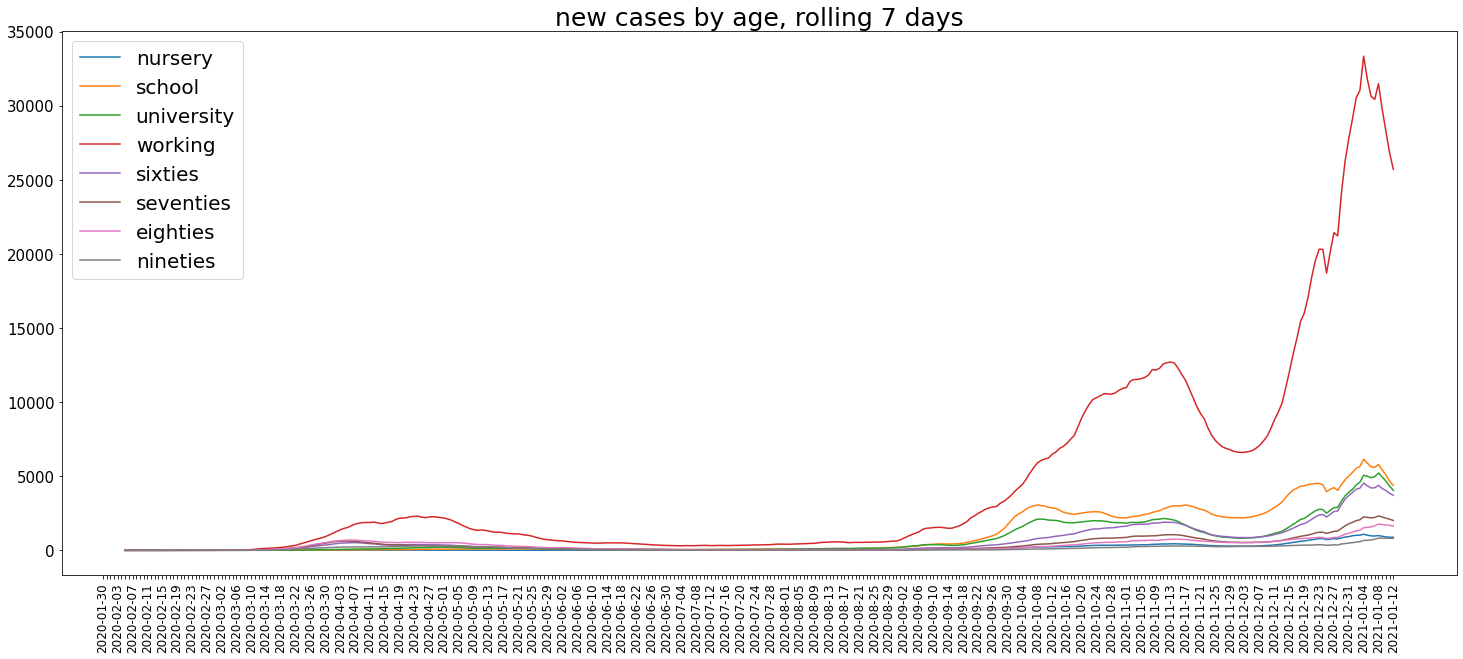

In [140]:
return1, return2, return3 = multiple_line_charts(df_casesAge_Summary, columns, chart_titles, 'new cases by age, rolling 7 days')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [141]:
columns = ['nursery_roll', 'school_roll', 'university_roll', 
           'sixties_roll', 'seventies_roll', 'eighties_roll', 'nineties_roll']
chart_titles = ['nursery', 'school', 'university', 
                'sixties', 'seventies', 'eighties', 'nineties']

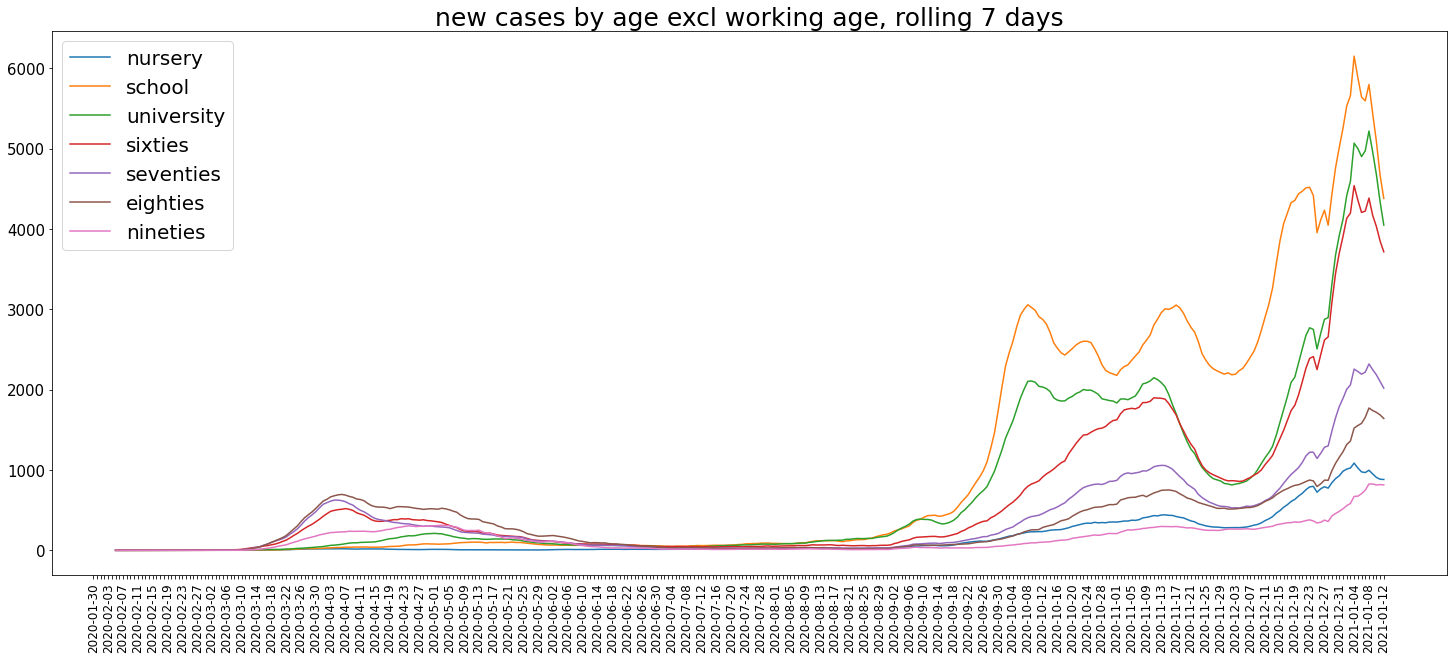

In [142]:
return1, return2, return3 = multiple_line_charts(df_casesAge_Summary, columns, chart_titles, 'new cases by age excl working age, rolling 7 days')

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [143]:
# looking at deaths by ages

df_deathsAges.head()

age  2020-01-03  2020-01-10  2020-01-17  2020-01-24  2020-01-31  \
0     <1         0.0         0.0         0.0         0.0         0.0   
1    1-4         0.0         0.0         0.0         0.0         0.0   
2    5-9         0.0         0.0         0.0         0.0         0.0   
3  10-14         0.0         0.0         0.0         0.0         0.0   
4  15-19         0.0         0.0         0.0         0.0         0.0   

   2020-02-07  2020-02-14  2020-02-21  2020-02-28  2020-03-06  2020-03-13  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2020-03-20  2020-03-27  2020-04-03  2020-04-10  2020-04-17  2020-04-24  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         1.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         1.0         0.0         0.0   
4         0.0         2.0         3.0         1.0         2.0         0.0   

   2020-05-01  2020-05-08  2020-05-15  2020-05-22  2020-05-29  2020-06-05  \
0         0.0         1.0         1.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         1.0         0.0         1.0   
4         0.0         0.0         1.0         0.0         0.0         0.0   

   2020-06-12  2020-06-19  2020-06-26  2020-07-03  2020-07-10  2020-07-17  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2020-07-24  2020-07-31  2020-08-07  2020-08-14  2020-08-21  2020-08-28  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2020-09-04  2020-09-11  2020-09-18  2020-09-25  2020-10-02  2020-10-09  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2020-10-16  2020-10-23  2020-10-30  2020-11-06  2020-11-13  2020-11-20  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         1.0   

   2020-11-27  2020-12-04  2020-12-11  2020-12-18  2020-12-25  2021-01-01  
0         0.0         0.0         0.0         0.0         0.0         0.0  
1         0.0         0.0         0.0         0.0         0.0         0.0  
2         0.0         0.0         0.0         0.0         0.0         1.0  
3         1.0         0.0  

In [144]:
df_deathsAges.set_index('age', inplace=True)
df_deathsAges = df_deathsAges.T
df_deathsAges.reset_index(inplace=True)
df_deathsAges.rename(columns={"index": "date"}, inplace=True)
df_deathsAges.columns.name=''

In [145]:
df_deathsAges.head()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  40-44  \
0  2020-01-03  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1  2020-01-10  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2  2020-01-17  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3  2020-01-24  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4  2020-01-31  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   45-49  50-54  55-59  60-64  65-69  70-74  75-79  80-84  85-89  90+  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0  0.0

In [146]:
df_deathsAges.tail()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  \
48  2020-12-04  0.0  0.0  0.0    0.0    0.0    1.0    3.0    2.0    5.0   
49  2020-12-11  0.0  0.0  0.0    1.0    1.0    1.0    2.0    2.0    9.0   
50  2020-12-18  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    4.0   
51  2020-12-25  0.0  0.0  0.0    0.0    0.0    0.0    3.0    4.0    3.0   
52  2021-01-01  0.0  0.0  1.0    0.0    0.0    0.0    4.0    6.0   10.0   

    40-44  45-49  50-54  55-59  60-64  65-69  70-74  75-79  80-84  85-89  \
48   16.0   18.0   35.0   66.0  106.0  181.0  282.0  431.0  519.0  604.0   
49   10.0   23.0   37.0   70.0  129.0  160.0  235.0  404.0  494.0  589.0   
50   10.0   22.0   44.0   78.0  105.0  172.0  276.0  411.0  617.0  669.0   
51   11.0   27.0   53.0   78.0  130.0  209.0  358.0  455.0  643.0  744.0   
52   12.0   29.0   49.0   87.0  149.0  195.0  327.0  466.0  655.0  759.0   

      90+  
48  632.0  
49  647.0  
50  757.0  
51  789.0  
52  722.0

In [147]:
last_date = df_deathsAges['date'].iloc[-1]

In [148]:
nursery = ['<1', '1-4']
school = ['15-19','10-14','5-9']
university = ['20-24']
working = ['55-59', '50-54','45-49','40-44','35-39','30-34','25-29']
sixties = ['60-64','65-69']
seventies = ['70-74','75-79']
eighties = ['80-84','85-89']
nineties = ['90+']

In [149]:
create_new_columns(df_deathsAges,nursery,'nursery')
create_new_columns(df_deathsAges,school,'school')
create_new_columns(df_deathsAges,university,'university')
create_new_columns(df_deathsAges,working,'working')
create_new_columns(df_deathsAges,sixties,'sixties')
create_new_columns(df_deathsAges,seventies,'seventies')
create_new_columns(df_deathsAges,eighties,'eighties')
create_new_columns(df_deathsAges,nineties,'nineties')

In [150]:
columns = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties', 'seventies', 'eighties', 'nineties']

In [151]:
return3 = 'new deaths by age, weekly to 2020-12-11'

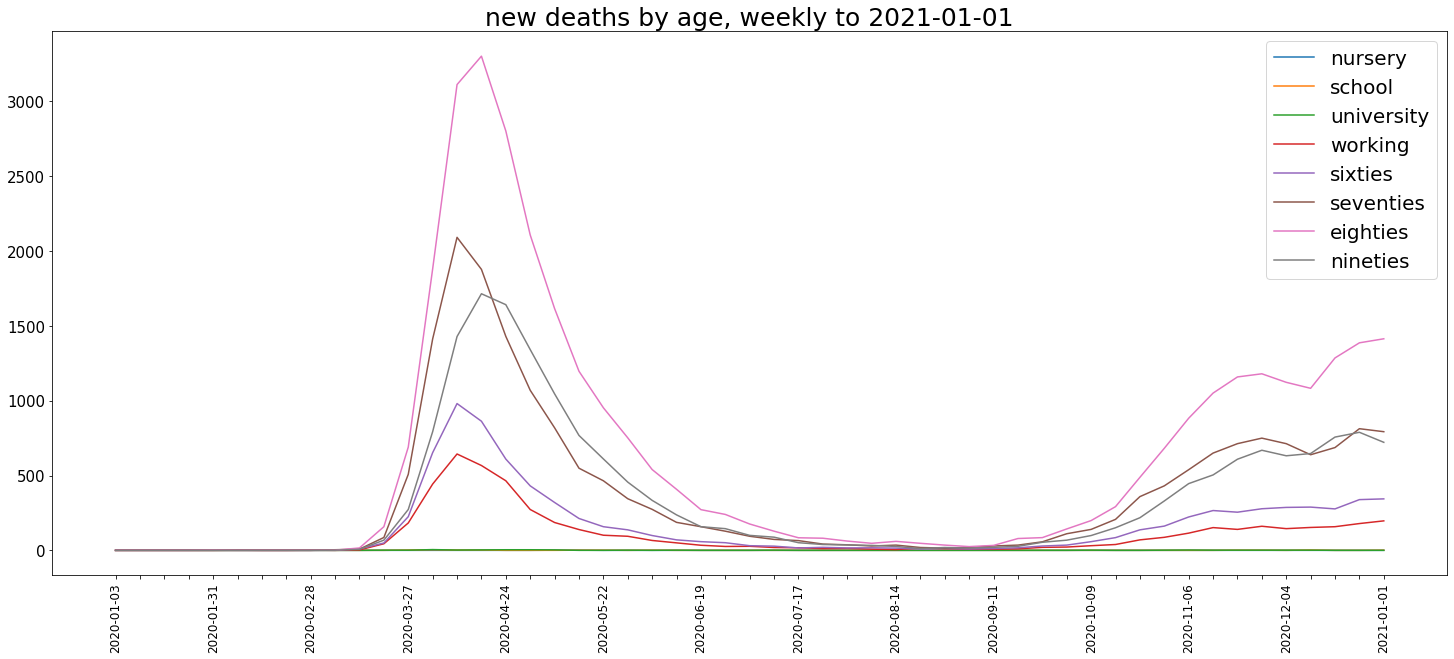

In [152]:
return1, return2, return3 = multiple_line_charts(df_deathsAges, columns, chart_titles, 'new deaths by age, weekly to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [153]:
columns = ['nursery','school','university','working',
           'sixties']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties']

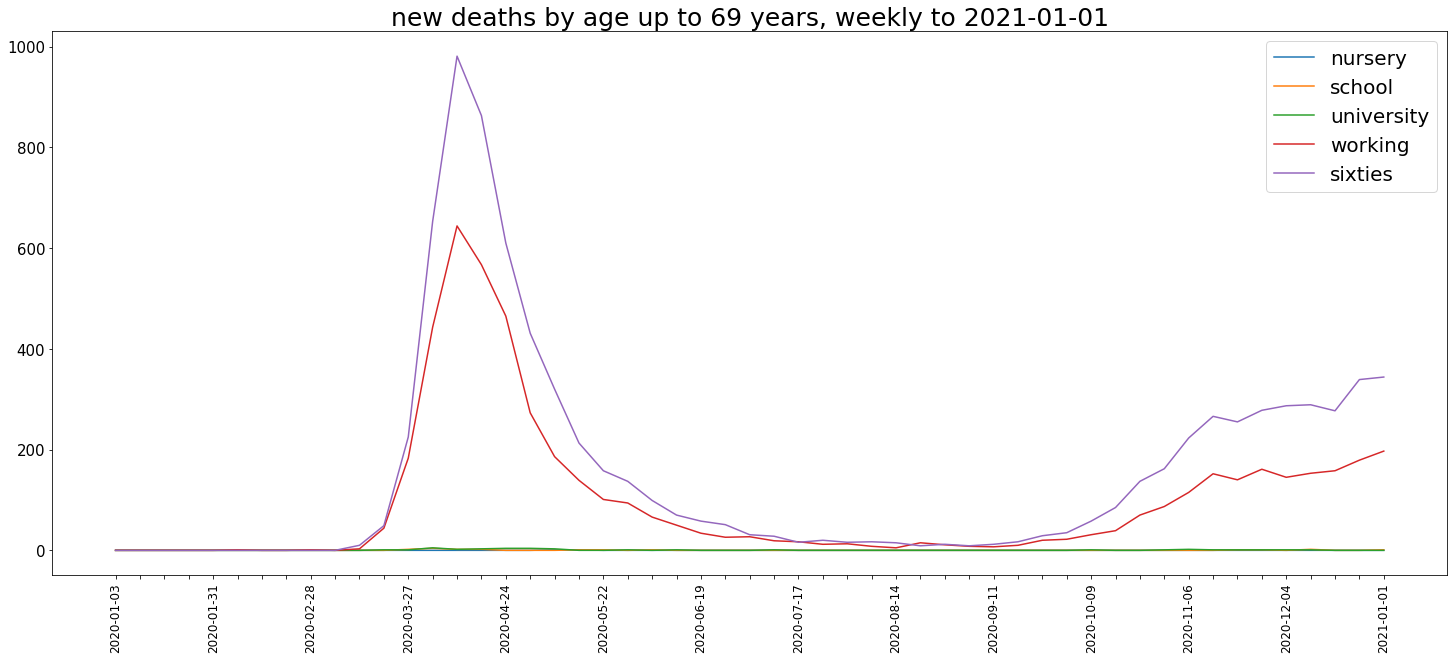

In [154]:
return1, return2, return3 = multiple_line_charts(df_deathsAges, columns, chart_titles, 'new deaths by age up to 69 years, weekly to ' + last_date)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [155]:
# cumulative deaths

columns = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']

for i in range(len(columns)):
    df_deathsAges[columns[i] + '_cum'] = df_deathsAges[columns[i]].cumsum()

In [156]:
columns = ['nursery_cum','school_cum','university_cum','working_cum',
           'sixties_cum','seventies_cum','eighties_cum','nineties_cum']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties', 'seventies', 'eighties', 'nineties']

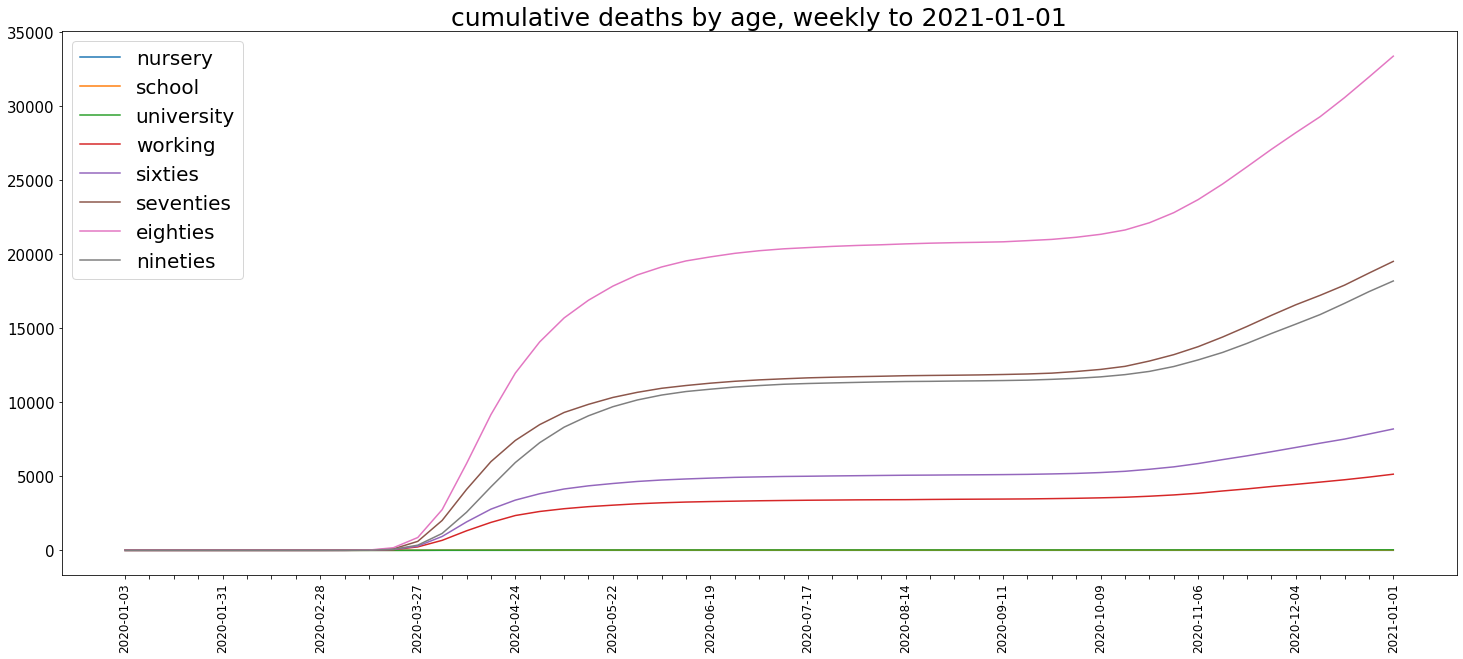

In [157]:
return1, return2, return3 = multiple_line_charts(df_deathsAges, columns, chart_titles, 'cumulative deaths by age, weekly to ' + str(last_date))

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [158]:
columns = ['nursery_cum','school_cum','university_cum','working_cum',
           'sixties_cum']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties']

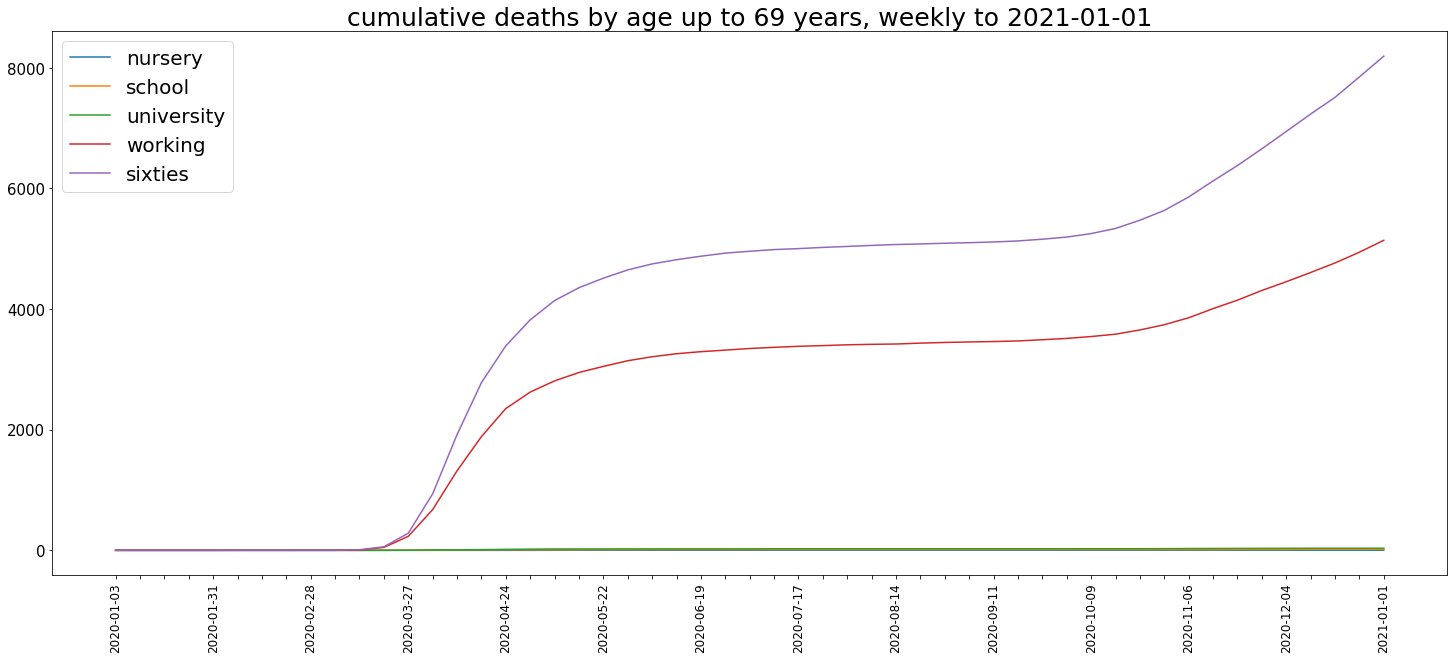

In [159]:
return1, return2, return3 = multiple_line_charts(df_deathsAges, columns, chart_titles, 'cumulative deaths by age up to 69 years, weekly to ' + last_date)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [160]:
columns = ['nursery_cum','school_cum','university_cum']
chart_titles = ['nursery', 'school', 'university']

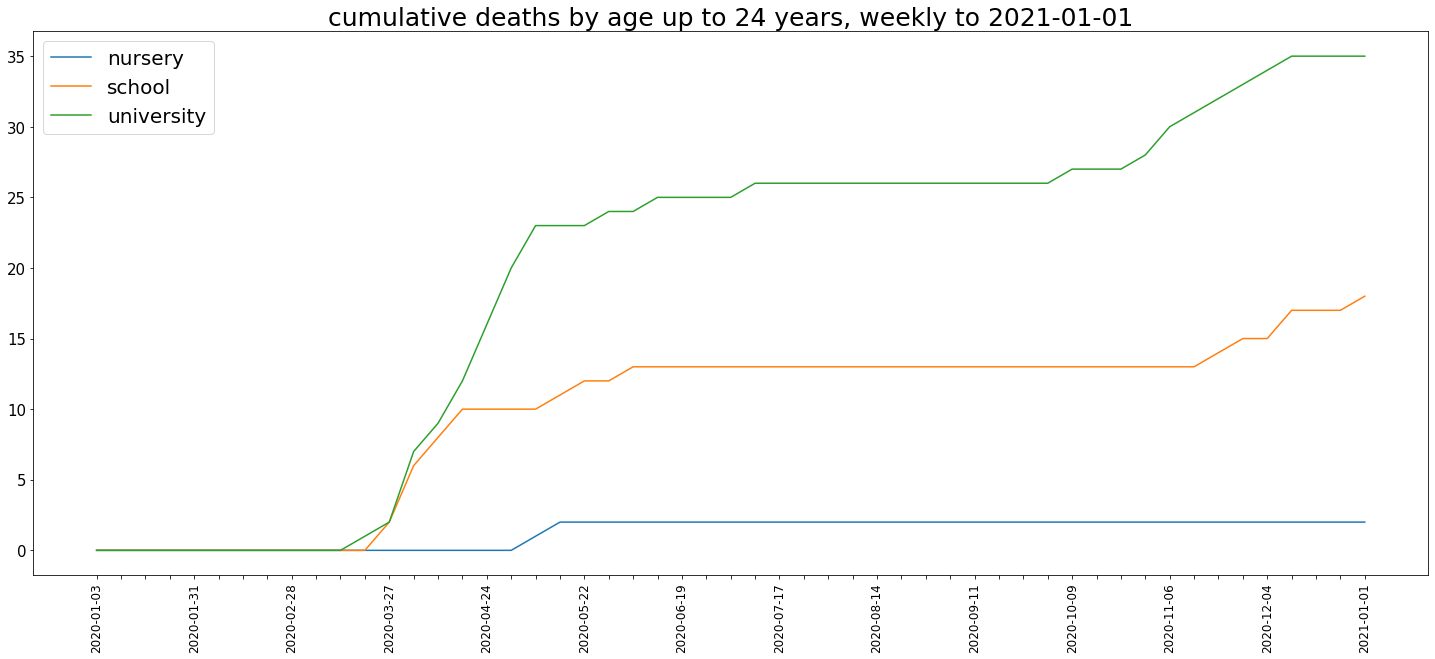

In [161]:
return1, return2, return3 = multiple_line_charts(df_deathsAges, columns, chart_titles, 'cumulative deaths by age up to 24 years, weekly to ' + last_date)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [162]:
df_deathsAges.tail()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  \
48  2020-12-04  0.0  0.0  0.0    0.0    0.0    1.0    3.0    2.0    5.0   
49  2020-12-11  0.0  0.0  0.0    1.0    1.0    1.0    2.0    2.0    9.0   
50  2020-12-18  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    4.0   
51  2020-12-25  0.0  0.0  0.0    0.0    0.0    0.0    3.0    4.0    3.0   
52  2021-01-01  0.0  0.0  1.0    0.0    0.0    0.0    4.0    6.0   10.0   

    40-44  45-49  50-54  55-59  60-64  65-69  70-74  75-79  80-84  85-89  \
48   16.0   18.0   35.0   66.0  106.0  181.0  282.0  431.0  519.0  604.0   
49   10.0   23.0   37.0   70.0  129.0  160.0  235.0  404.0  494.0  589.0   
50   10.0   22.0   44.0   78.0  105.0  172.0  276.0  411.0  617.0  669.0   
51   11.0   27.0   53.0   78.0  130.0  209.0  358.0  455.0  643.0  744.0   
52   12.0   29.0   49.0   87.0  149.0  195.0  327.0  466.0  655.0  759.0   

      90+  nursery  school  university  working  sixties  seventies  eighties  \
48  632.0      0.0     0.0         1.0    145.0    287.0      713.0    1123.0   
49  647.0      0.0     2.0         1.0    153.0    289.0      639.0    1083.0   
50  757.0      0.0     0.0         0.0    158.0    277.0      687.0    1286.0   
51  789.0      0.0     0.0         0.0    179.0    339.0      813.0    1387.0   
52  722.0      0.0     1.0         0.0    197.0    344.0      793.0    1414.0   

    nineties  nursery_cum  school_cum  university_cum  working_cum  \
48     632.0          2.0        15.0            34.0       4454.0   
49     647.0          2.0        17.0            35.0       4607.0   
50     757.0          2.0        17.0            35.0       4765.0   
51     789.0          2.0        17.0            35.0       4944.0   
52     722.0          2.0        18.0            35.0       5141.0   

    sixties_cum  seventies_cum  eighties_cum  nineties_cum  
48       6945.0        16577.0       28194.0       15271.0  
49       7234.0        17216.0       29277.0       15918.0  
50       7511.0        17903.0       30563.0       16675.0  
51       7850.0        18716.0       31950.0       17464.0  
52       8194.0        19509.0       33364.0       18186.0

In [163]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Data looking at all deaths and covid deaths by age (always a couple of weeks behind)')
    slideText.append('')
    imagePath.append('')

plt.show()

In [164]:
df_deathsAges_all.head()

age  2020-01-03  2020-01-10  2020-01-17  2020-01-24  2020-01-31  \
0     <1        48.0        50.0        69.0        53.0        50.0   
1    1-4         8.0         9.0         7.0         9.0         6.0   
2    5-9         4.0         8.0         5.0         4.0         5.0   
3  10-14         4.0         9.0         4.0         8.0         4.0   
4  15-19         6.0        16.0        10.0        15.0        23.0   

   2020-02-07  2020-02-14  2020-02-21  2020-02-28  2020-03-06  2020-03-13  \
0        30.0        43.0        51.0        49.0        56.0        53.0   
1         8.0         6.0         5.0         7.0        11.0        13.0   
2         4.0         2.0         6.0         6.0         2.0         3.0   
3         4.0         4.0         7.0         7.0         7.0         6.0   
4        10.0        16.0        20.0        24.0        21.0        18.0   

   2020-03-20  2020-03-27  2020-04-03  2020-04-10  2020-04-17  2020-04-24  \
0        44.0        49.0        51.0        38.0        51.0        54.0   
1         2.0         8.0         8.0         6.0         6.0         6.0   
2         6.0         1.0         5.0         4.0         5.0         3.0   
3         4.0         4.0         8.0         4.0         4.0         3.0   
4        15.0        12.0         9.0         8.0        20.0        11.0   

   2020-05-01  2020-05-08  2020-05-15  2020-05-22  2020-05-29  2020-06-05  \
0        48.0        28.0        56.0        51.0        40.0        44.0   
1         8.0         6.0        10.0         4.0         6.0         4.0   
2         0.0         4.0         5.0         5.0         3.0         4.0   
3         3.0        10.0         4.0         7.0         5.0         8.0   
4        14.0         9.0        13.0        13.0         7.0        10.0   

   2020-06-12  2020-06-19  2020-06-26  2020-07-03  2020-07-10  2020-07-17  \
0        44.0        48.0        47.0        47.0        58.0        35.0   
1         4.0        10.0         4.0         7.0         3.0         6.0   
2         2.0         5.0         4.0         2.0         2.0         4.0   
3         5.0         4.0         3.0         4.0         5.0         0.0   
4        10.0         9.0         2.0        14.0        11.0        10.0   

   2020-07-24  2020-07-31  2020-08-07  2020-08-14  2020-08-21  2020-08-28  \
0        49.0        45.0        44.0        50.0        49.0        38.0   
1         3.0        11.0         4.0         5.0         7.0         5.0   
2         5.0         5.0         5.0         2.0         4.0         7.0   
3         4.0         3.0         6.0         8.0         5.0         6.0   
4         9.0        12.0        13.0        12.0        14.0        14.0   

   2020-09-04  2020-09-11  2020-09-18  2020-09-25  2020-10-02  2020-10-09  \
0        29.0        39.0        36.0        45.0        47.0        45.0   
1         3.0         6.0         4.0         7.0         3.0         6.0   
2         2.0         5.0         4.0         3.0         3.0         5.0   
3         5.0         3.0         7.0         7.0        10.0         6.0   
4         7.0        15.0        15.0        13.0        12.0        12.0   

   2020-10-16  2020-10-23  2020-10-30  2020-11-06  2020-11-13  2020-11-20  \
0        41.0        34.0        31.0        43.0        45.0        54.0   
1         6.0         2.0         6.0         6.0         8.0        11.0   
2         4.0         7.0         2.0         2.0         7.0         6.0   
3         3.0         5.0         5.0         4.0         3.0         4.0   
4        15.0        14.0        15.0        12.0         7.0        17.0   

   2020-11-27  2020-12-04  2020-12-11  2020-12-18  2020-12-25  2021-01-01  
0        44.0        50.0        45.0        46.0        33.0        32.0  
1         7.0         4.0         3.0         5.0         7.0         4.0  
2         5.0         3.0        11.0         4.0         5.0         1.0  
3         5.0         8.0  

In [165]:
df_deathsAges_all.set_index('age', inplace=True)
df_deathsAges_all = df_deathsAges_all.T
df_deathsAges_all.reset_index(inplace=True)
df_deathsAges_all.rename(columns={"index": "date"}, inplace=True)
df_deathsAges_all.columns.name=''

In [166]:
nursery = ['<1', '1-4']
school = ['15-19','10-14','5-9']
university = ['20-24']
working = ['55-59', '50-54','45-49','40-44','35-39','30-34','25-29']
sixties = ['60-64','65-69']
seventies = ['70-74','75-79']
eighties = ['80-84','85-89']
nineties = ['90+']

In [167]:
create_new_columns(df_deathsAges_all,nursery,'nursery')
create_new_columns(df_deathsAges_all,school,'school')
create_new_columns(df_deathsAges_all,university,'university')
create_new_columns(df_deathsAges_all,working,'working')
create_new_columns(df_deathsAges_all,sixties,'sixties')
create_new_columns(df_deathsAges_all,seventies,'seventies')
create_new_columns(df_deathsAges_all,eighties,'eighties')
create_new_columns(df_deathsAges_all,nineties,'nineties')

In [168]:
# cumulative deaths

columns = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']

for i in range(len(columns)):
    df_deathsAges_all[columns[i] + '_cum'] = df_deathsAges_all[columns[i]].cumsum()

In [169]:
df_deathsAges_all.columns += '_all'
df_deathsAges_all.columns.values[0] = 'date'

In [170]:
df_deathsAges_all.head()

date  <1_all  1-4_all  5-9_all  10-14_all  15-19_all  20-24_all  \
0  2020-01-03    48.0      8.0      4.0        4.0        6.0       11.0   
1  2020-01-10    50.0      9.0      8.0        9.0       16.0       23.0   
2  2020-01-17    69.0      7.0      5.0        4.0       10.0       25.0   
3  2020-01-24    53.0      9.0      4.0        8.0       15.0       30.0   
4  2020-01-31    50.0      6.0      5.0        4.0       23.0       23.0   

   25-29_all  30-34_all  35-39_all  40-44_all  45-49_all  50-54_all  \
0       17.0       32.0       54.0       69.0      115.0      239.0   
1       37.0       46.0       68.0       85.0      191.0      279.0   
2       37.0       47.0       77.0      118.0      189.0      306.0   
3       36.0       38.0       79.0      116.0      160.0      280.0   
4       28.0       58.0       76.0      100.0      163.0      278.0   

   55-59_all  60-64_all  65-69_all  70-74_all  75-79_all  80-84_all  \
0      361.0      486.0      696.0     1164.0     1535.0     2049.0   
1      426.0      604.0      857.0     1341.0     1724.0     2290.0   
2      461.0      562.0      803.0     1210.0     1612.0     2103.0   
3      381.0      535.0      791.0     1167.0     1474.0     1863.0   
4      382.0      525.0      732.0     1196.0     1445.0     1811.0   

   85-89_all  90+_all  nursery_all  school_all  university_all  working_all  \
0     2457.0   2898.0         56.0        14.0            11.0        887.0   
1     2697.0   3297.0         59.0        33.0            23.0       1132.0   
2     2421.0   2924.0         76.0        19.0            25.0       1235.0   
3     2188.0   2626.0         62.0        27.0            30.0       1090.0   
4     2124.0   2583.0         56.0        32.0            23.0       1085.0   

   sixties_all  seventies_all  eighties_all  nineties_all  nursery_cum_all  \
0       1182.0         2699.0        4506.0        2898.0             56.0   
1       1461.0         3065.0        4987.0        3297.0            115.0   
2       1365.0         2822.0        4524.0        2924.0            191.0   
3       1326.0         2641.0        4051.0        2626.0            253.0   
4       1257.0         2641.0        3935.0        2583.0            309.0   

   school_cum_all  university_cum_all  working_cum_all  sixties_cum_all  \
0            14.0                11.0            887.0           1182.0   
1            47.0                34.0           2019.0           2643.0   
2            66.0                59.0           3254.0           4008.0   
3            93.0                89.0           4344.0           5334.0   
4           125.0               112.0           5429.0           6591.0   

   seventies_cum_all  eighties_cum_all  nineties_cum_all  
0             2699.0            4506.0            2898.0  
1             5764.0            9493.0            6195.0  
2             8586.0           14017.0            9119.0  
3            11227.0           18068.0           11745.0  
4            13868.0           22003.0           14328.0

In [171]:
df_deathsAges.head()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  40-44  \
0  2020-01-03  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1  2020-01-10  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2  2020-01-17  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3  2020-01-24  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4  2020-01-31  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   45-49  50-54  55-59  60-64  65-69  70-74  75-79  80-84  85-89  90+  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0  0.0   

   nursery  school  university  working  sixties  seventies  eighties  \
0      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
1      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
2      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
3      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
4      0.0     0.0         0.0      0.0      0.0        0.0       1.0   

   nineties  nursery_cum  school_cum  university_cum  working_cum  \
0       0.0          0.0         0.0             0.0          0.0   
1       0.0          0.0         0.0             0.0          0.0   
2       0.0          0.0         0.0             0.0          0.0   
3       0.0          0.0         0.0             0.0          0.0   
4       0.0          0.0         0.0             0.0          0.0   

   sixties_cum  seventies_cum  eighties_cum  nineties_cum  
0          0.0            0.0           0.0           0.0  
1          0.0            0.0           0.0           0.0  
2          0.0            0.0           0.0           0.0  
3          0.0            0.0           0.0           0.0  
4          0.0            0.0           1.0           0.0

In [172]:
df_deaths_comp = pd.merge(df_deathsAges, df_deathsAges_all, left_on='date', right_on='date', how='left')

In [173]:
df_deaths_comp.tail()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  \
48  2020-12-04  0.0  0.0  0.0    0.0    0.0    1.0    3.0    2.0    5.0   
49  2020-12-11  0.0  0.0  0.0    1.0    1.0    1.0    2.0    2.0    9.0   
50  2020-12-18  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    4.0   
51  2020-12-25  0.0  0.0  0.0    0.0    0.0    0.0    3.0    4.0    3.0   
52  2021-01-01  0.0  0.0  1.0    0.0    0.0    0.0    4.0    6.0   10.0   

    40-44  45-49  50-54  55-59  60-64  65-69  70-74  75-79  80-84  85-89  \
48   16.0   18.0   35.0   66.0  106.0  181.0  282.0  431.0  519.0  604.0   
49   10.0   23.0   37.0   70.0  129.0  160.0  235.0  404.0  494.0  589.0   
50   10.0   22.0   44.0   78.0  105.0  172.0  276.0  411.0  617.0  669.0   
51   11.0   27.0   53.0   78.0  130.0  209.0  358.0  455.0  643.0  744.0   
52   12.0   29.0   49.0   87.0  149.0  195.0  327.0  466.0  655.0  759.0   

      90+  nursery  school  university  working  sixties  seventies  eighties  \
48  632.0      0.0     0.0         1.0    145.0    287.0      713.0    1123.0   
49  647.0      0.0     2.0         1.0    153.0    289.0      639.0    1083.0   
50  757.0      0.0     0.0         0.0    158.0    277.0      687.0    1286.0   
51  789.0      0.0     0.0         0.0    179.0    339.0      813.0    1387.0   
52  722.0      0.0     1.0         0.0    197.0    344.0      793.0    1414.0   

    nineties  nursery_cum  school_cum  university_cum  working_cum  \
48     632.0          2.0        15.0            34.0       4454.0   
49     647.0          2.0        17.0            35.0       4607.0   
50     757.0          2.0        17.0            35.0       4765.0   
51     789.0          2.0        17.0            35.0       4944.0   
52     722.0          2.0        18.0            35.0       5141.0   

    sixties_cum  seventies_cum  eighties_cum  nineties_cum  <1_all  1-4_all  \
48       6945.0        16577.0       28194.0       15271.0    50.0      4.0   
49       7234.0        17216.0       29277.0       15918.0    45.0      3.0   
50       7511.0        17903.0       30563.0       16675.0    46.0      5.0   
51       7850.0        18716.0       31950.0       17464.0    33.0      7.0   
52       8194.0        19509.0       33364.0       18186.0    32.0      4.0   

    5-9_all  10-14_all  15-19_all  20-24_all  25-29_all  30-34_all  35-39_all  \
48      3.0        8.0       15.0       27.0       42.0       50.0       88.0   
49     11.0        6.0        8.0       25.0       35.0       58.0       69.0   
50      4.0        5.0       11.0       24.0       38.0       57.0       73.0   
51      5.0        6.0       10.0       21.0       35.0       46.0       70.0   
52      1.0        9.0        8.0       10.0       24.0       27.0       43.0   

    40-44_all  45-49_all  50-54_all  55-59_all  60-64_all  65-69_all  \
48      117.0      200.0      293.0      468.0      568.0      792.0   
49      115.0      190.0      299.0      433.0      603.0      765.0   
50      115.0      189.0      317.0      437.0      581.0      805.0   
51       99.0      179.0      262.0      359.0      515.0      729.0   
52       68.0      123.0      203.0      311.0      449.0      619.0   

    70-74_all  75-79_all  80-84_all  85-89_all  90+_all  nursery_all  \
48     1236.0     1528.0     1975.0     2237.0   2602.0         54.0   
49     1230.0     1619.0     1989.0     2193.0   2596.0         48.0   
50     1246.0     1614.0     2124.0     2439.0   2881.0         51.0   
51     1154.0     1436.0     1892.0     2154.0   2508.0         40.0   
52      990.0     1262.0     1651.0     1980.0   2255.0         36.0   

    school_all  university_all  working_all  sixties_all  seventies_all  \
48        26.0            27.0       1258.0       1360.0         2764.0   
49        25.0            25.0       1199.0       1368.0         2849.0   
50        20.0            24.0       1226.0       1386.0         2860.0   
51        21.0            21.0       1050.0       1244.0         2

In [174]:
col_names = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']

for i in range(len(col_names)):
    df_deaths_comp[str(col_names[i]) + '_%'] = (df_deaths_comp[str(col_names[i]) + '_cum']
                                                /df_deaths_comp[str(col_names[i]) + '_cum_all'])

In [175]:
col_names = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']

col_names_new = [s + '_cum_all' for s in col_names]

In [176]:
df_deaths_comp['total_cum_all'] = df_deaths_comp[col_names_new].sum(axis=1)

In [177]:
col_names = ['nursery','school','university','working',
           'sixties','seventies','eighties','nineties']

col_names_new = [s + '_cum' for s in col_names]

In [178]:
df_deaths_comp['total_cum'] = df_deaths_comp[col_names_new].sum(axis=1)

In [179]:
df_deaths_comp.tail()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  \
48  2020-12-04  0.0  0.0  0.0    0.0    0.0    1.0    3.0    2.0    5.0   
49  2020-12-11  0.0  0.0  0.0    1.0    1.0    1.0    2.0    2.0    9.0   
50  2020-12-18  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    4.0   
51  2020-12-25  0.0  0.0  0.0    0.0    0.0    0.0    3.0    4.0    3.0   
52  2021-01-01  0.0  0.0  1.0    0.0    0.0    0.0    4.0    6.0   10.0   

    40-44  45-49  50-54  55-59  60-64  65-69  70-74  75-79  80-84  85-89  \
48   16.0   18.0   35.0   66.0  106.0  181.0  282.0  431.0  519.0  604.0   
49   10.0   23.0   37.0   70.0  129.0  160.0  235.0  404.0  494.0  589.0   
50   10.0   22.0   44.0   78.0  105.0  172.0  276.0  411.0  617.0  669.0   
51   11.0   27.0   53.0   78.0  130.0  209.0  358.0  455.0  643.0  744.0   
52   12.0   29.0   49.0   87.0  149.0  195.0  327.0  466.0  655.0  759.0   

      90+  nursery  school  university  working  sixties  seventies  eighties  \
48  632.0      0.0     0.0         1.0    145.0    287.0      713.0    1123.0   
49  647.0      0.0     2.0         1.0    153.0    289.0      639.0    1083.0   
50  757.0      0.0     0.0         0.0    158.0    277.0      687.0    1286.0   
51  789.0      0.0     0.0         0.0    179.0    339.0      813.0    1387.0   
52  722.0      0.0     1.0         0.0    197.0    344.0      793.0    1414.0   

    nineties  nursery_cum  school_cum  university_cum  working_cum  \
48     632.0          2.0        15.0            34.0       4454.0   
49     647.0          2.0        17.0            35.0       4607.0   
50     757.0          2.0        17.0            35.0       4765.0   
51     789.0          2.0        17.0            35.0       4944.0   
52     722.0          2.0        18.0            35.0       5141.0   

    sixties_cum  seventies_cum  eighties_cum  nineties_cum  <1_all  1-4_all  \
48       6945.0        16577.0       28194.0       15271.0    50.0      4.0   
49       7234.0        17216.0       29277.0       15918.0    45.0      3.0   
50       7511.0        17903.0       30563.0       16675.0    46.0      5.0   
51       7850.0        18716.0       31950.0       17464.0    33.0      7.0   
52       8194.0        19509.0       33364.0       18186.0    32.0      4.0   

    5-9_all  10-14_all  15-19_all  20-24_all  25-29_all  30-34_all  35-39_all  \
48      3.0        8.0       15.0       27.0       42.0       50.0       88.0   
49     11.0        6.0        8.0       25.0       35.0       58.0       69.0   
50      4.0        5.0       11.0       24.0       38.0       57.0       73.0   
51      5.0        6.0       10.0       21.0       35.0       46.0       70.0   
52      1.0        9.0        8.0       10.0       24.0       27.0       43.0   

    40-44_all  45-49_all  50-54_all  55-59_all  60-64_all  65-69_all  \
48      117.0      200.0      293.0      468.0      568.0      792.0   
49      115.0      190.0      299.0      433.0      603.0      765.0   
50      115.0      189.0      317.0      437.0      581.0      805.0   
51       99.0      179.0      262.0      359.0      515.0      729.0   
52       68.0      123.0      203.0      311.0      449.0      619.0   

    70-74_all  75-79_all  80-84_all  85-89_all  90+_all  nursery_all  \
48     1236.0     1528.0     1975.0     2237.0   2602.0         54.0   
49     1230.0     1619.0     1989.0     2193.0   2596.0         48.0   
50     1246.0     1614.0     2124.0     2439.0   2881.0         51.0   
51     1154.0     1436.0     1892.0     2154.0   2508.0         40.0   
52      990.0     1262.0     1651.0     1980.0   2255.0         36.0   

    school_all  university_all  working_all  sixties_all  seventies_all  \
48        26.0            27.0       1258.0       1360.0         2764.0   
49        25.0            25.0       1199.0       1368.0         2849.0   
50        20.0            24.0       1226.0       1386.0         2860.0   
51        21.0            21.0       1050.0       1244.0         2

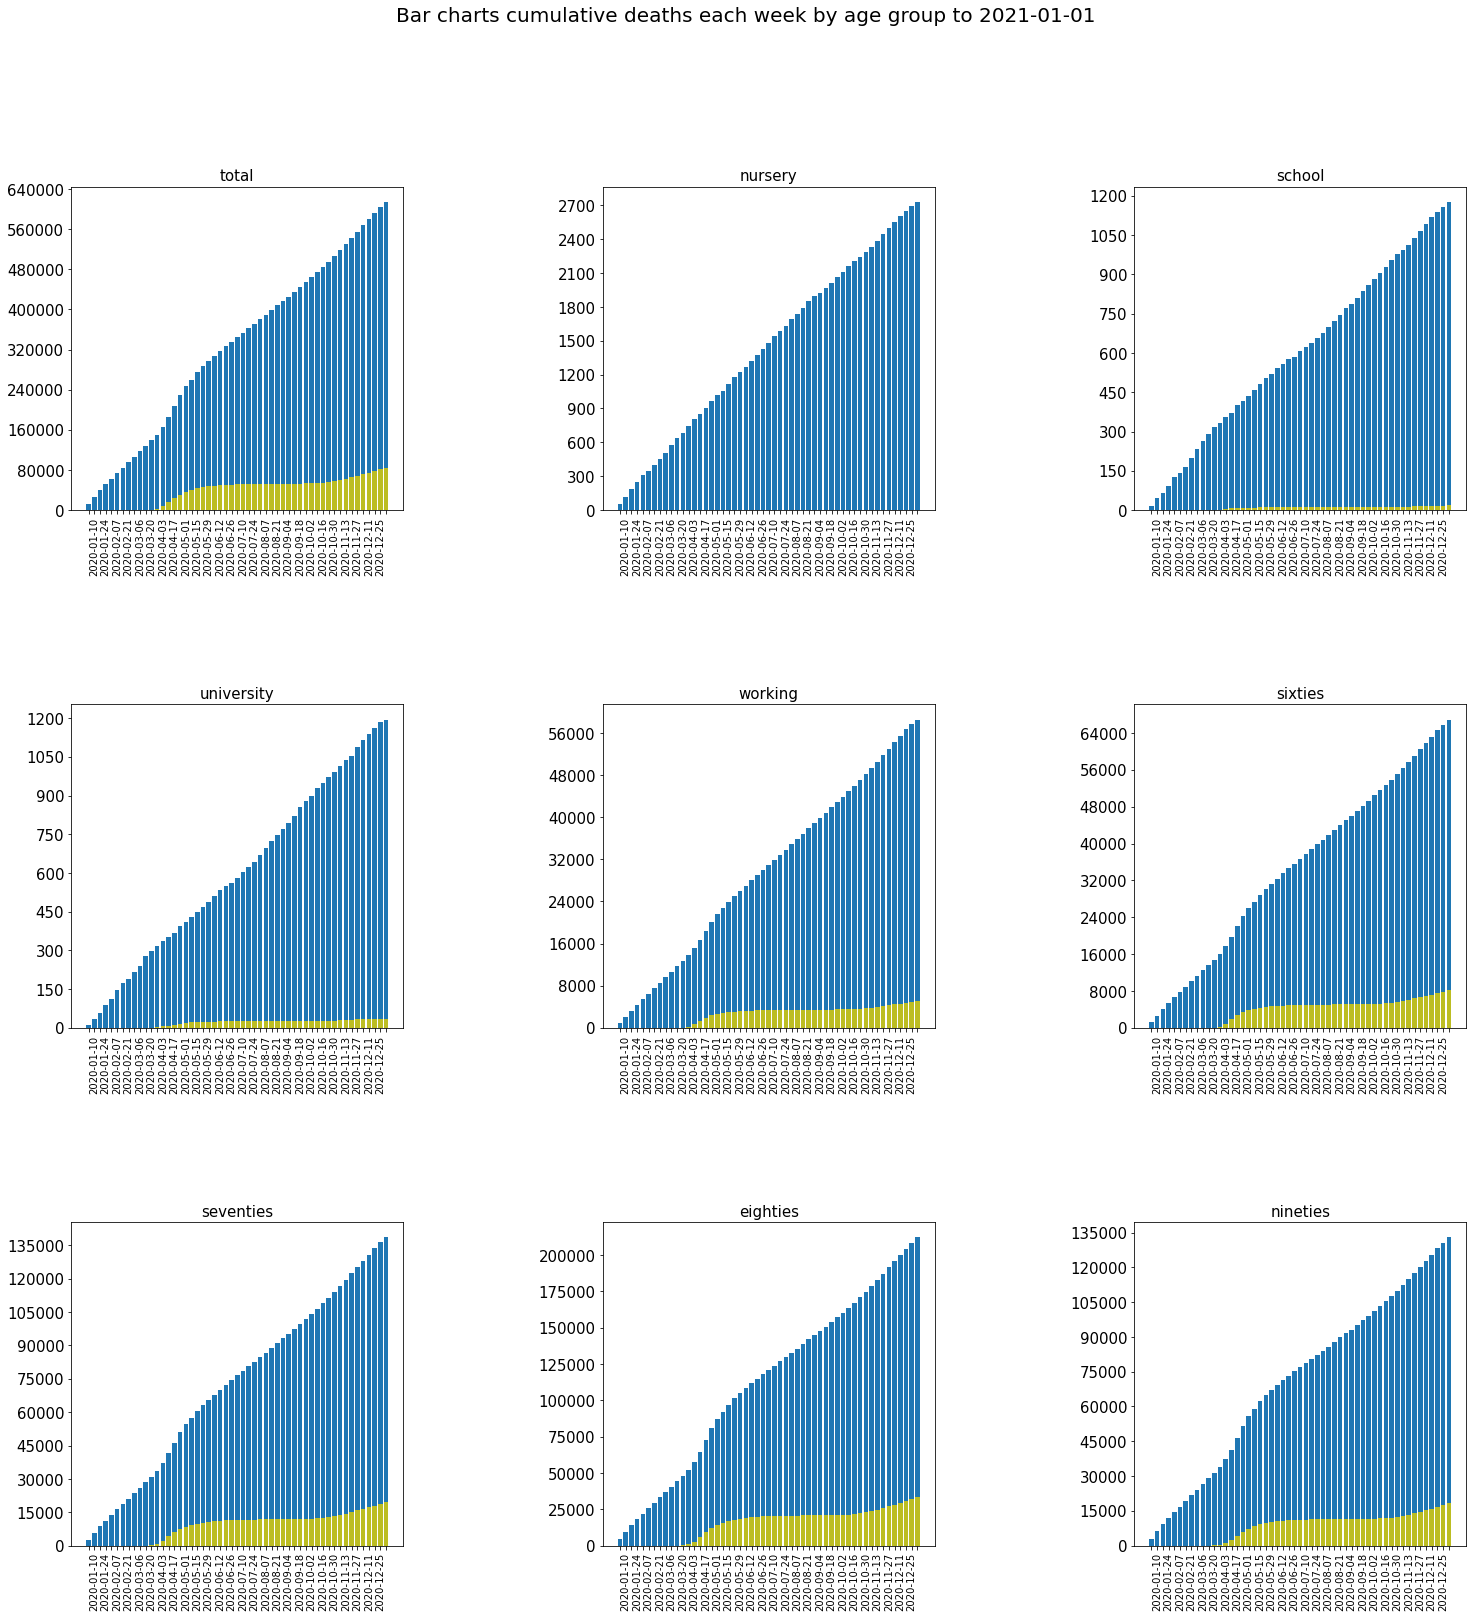

In [180]:
# bar charts showing number of deaths for each age group per week

col_names = ['total', 'nursery','school','university','working',
             'sixties','seventies','eighties','nineties']

#fig, ax = plt.subplots(nrows=int(len(col_names)/3)+1, ncols=3, figsize=(25,25))
fig, ax = plt.subplots(nrows=int(len(col_names)/3), ncols=3, figsize=(25,25))

plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.suptitle('Bar charts cumulative deaths each week by age group to ' + last_date, fontsize = 20)
#plt.suptitle("anything over 'Less than a year' indicates that returning members keep their history", fontsize = 20)

x = df_deaths_comp.index.values

labels = list(df_deaths_comp['date'])

for i in range(1,len(labels),2):
    labels[i-1]=''
if len(labels) % 2 != 0:
    labels[-1]=''

for ii in range(len(col_names)):
    #for i in range(len(df)):
    y1 = df_deaths_comp[col_names[ii] + '_cum_all']
    y2 = df_deaths_comp[col_names[ii] + '_cum']
    ax[int(ii/3),ii - 3*int(ii/3)].set_title(col_names[ii], fontsize=15)
    ax[int(ii/3),ii - 3*int(ii/3)].set_xticks(x)
    ax[int(ii/3),ii - 3*int(ii/3)].set_xticklabels(labels, rotation = 90)
    ax[int(ii/3),ii - 3*int(ii/3)].yaxis.set_tick_params(labelsize=15)
    ax[int(ii/3),ii - 3*int(ii/3)].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[int(ii/3),ii - 3*int(ii/3)].bar(x,y1, color='#1f77b4')
    ax[int(ii/3),ii - 3*int(ii/3)].bar(x,y2, color='#bcbd22')
    #ax[int(ii/3),ii - 3*int(ii/3)].bar(df_deaths_comp['date'][i],y1[i], color='#1f77b4')

start_date = df_deaths_comp['date'].iloc[0]
end_date = df_deaths_comp['date'].iloc[-1]

if savePNG == 1 or PwrptPrep == 1:
    fileName = 'Coviduk - Bar charts cumulative deaths each week by age group.png'
    
    slideTitle.append('Bar charts cumulative deaths each week by age group to ' + last_date)
    slideText.append(str(start_date) + ' to ' + str(end_date))
    imagePath.append(fileName)

    # need to remove any dates filename when saved as .png given they change
    plt.savefig(fileName, bbox_inches = 'tight')
    
#     slideTitle_ = 'Bar charts cumulative deaths each week by age group to ' + last_date
#     slideText_ = (str(start_date) + ' to ' + str(end_date))
#     imagePath_ = (fileName)  
    
plt.show()

In [181]:
columns = ['nursery_%','school_%','university_%','working_%',
           'sixties_%','seventies_%','eighties_%','nineties_%']
chart_titles = ['nursery', 'school', 'university', 'working', 
                'sixties', 'seventies', 'eighties', 'nineties']

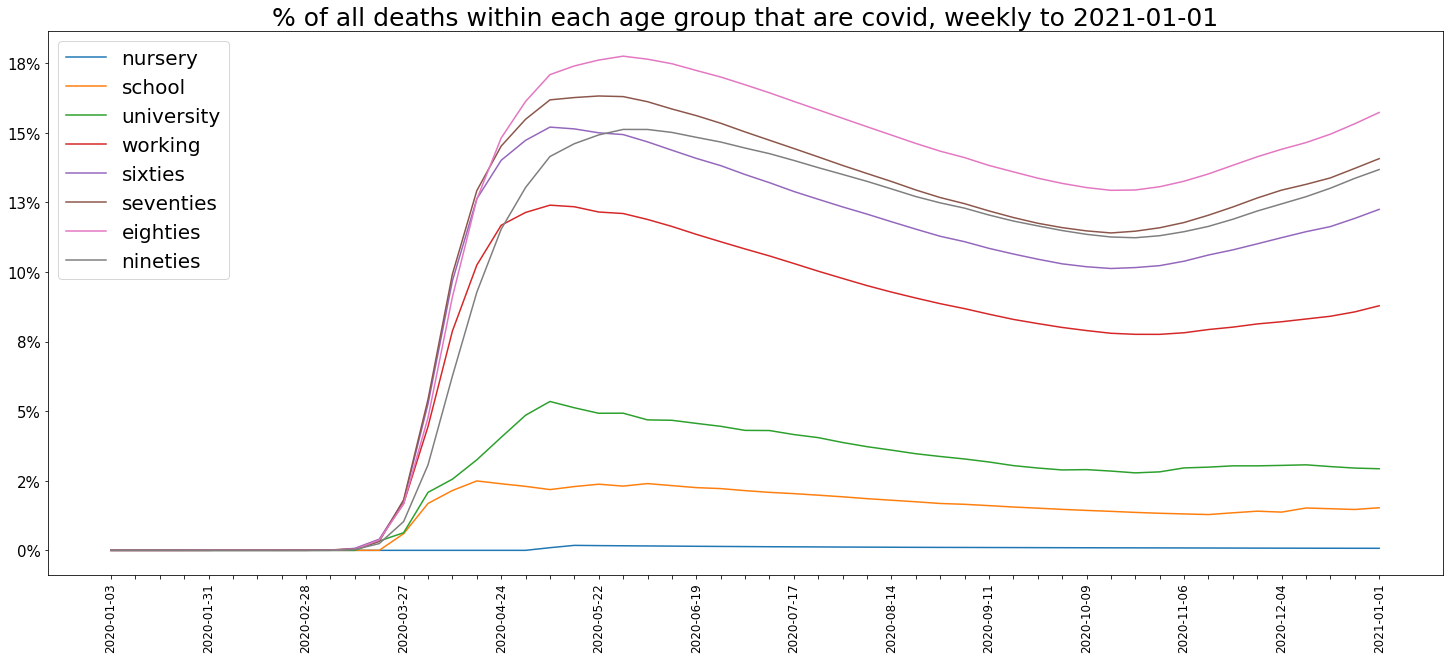

In [182]:
return1, return2, return3 = multiple_line_charts(df_deaths_comp, columns, chart_titles, '% of all deaths within each age group that are covid, weekly to ' + last_date)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [183]:
df_deathsAges_all_totals.head()

Week ended  2020-01-03  2020-01-10  \
0                             Total deaths, all ages     12254.0     14058.0   
1  week over the previous 5 years 1, 10, 11 (Engl...     12175.0     13822.0   

   2020-01-17  2020-01-24  2020-01-31  2020-02-07  2020-02-14  2020-02-21  \
0     12990.0     11856.0     11612.0     10986.0     10944.0     10841.0   
1     13216.0     12760.0     12206.0     11925.0     11627.0     11548.0   

   2020-02-28  2020-03-06  2020-03-13  2020-03-20  2020-03-27  2020-04-03  \
0     10816.0     10895.0     11019.0     10645.0     11141.0     16387.0   
1     11183.0     11498.0     11205.0     10573.0     10130.0     10305.0   

   2020-04-10  2020-04-17  2020-04-24  2020-05-01  2020-05-08  2020-05-15  \
0     18516.0     22351.0     21997.0     17953.0     12657.0     14573.0   
1     10520.0     10497.0     10458.0      9941.0      9576.0     10188.0   

   2020-05-22  2020-05-29  2020-06-05  2020-06-12  2020-06-19  2020-06-26  \
0     12288.0      9824.0     10709.0      9976.0      9339.0      8979.0   
1      9940.0      8171.0      9977.0      9417.0      9404.0      9293.0   

   2020-07-03  2020-07-10  2020-07-17  2020-07-24  2020-07-31  2020-08-07  \
0      9140.0      8690.0      8823.0      8891.0      8946.0      8945.0   
1      9183.0      9250.0      9093.0      9052.0      9036.0      9102.0   

   2020-08-14  2020-08-21  2020-08-28  2020-09-04  2020-09-11  2020-09-18  \
0      9392.0      9631.0      9032.0      7739.0      9811.0      9523.0   
1      9085.0      9157.0      8241.0      9182.0      9306.0      9264.0   

   2020-09-25  2020-10-02  2020-10-09  2020-10-16  2020-10-23  2020-10-30  \
0      9634.0      9945.0      9954.0     10534.0     10739.0     10887.0   
1      9377.0      9555.0      9811.0      9865.0      9759.0      9891.0   

   2020-11-06  2020-11-13  2020-11-20  2020-11-27  2020-12-04  2020-12-11  \
0     11812.0     12254.0     12535.0     12456.0     12303.0     12292.0   
1     10331.0     10350.0     10380.0     10357.0     10695.0     10750.0   

   2020-12-18  2020-12-25  2021-01-01  
0     13011.0     11520.0     10069.0  
1     11548.0      7954.0      7954.0

In [184]:
df_deathsAges_all_totals.set_index('Week ended', inplace=True)
df_deathsAges_all_totals = df_deathsAges_all_totals.T
df_deathsAges_all_totals.reset_index(inplace=True)
df_deathsAges_all_totals.rename(columns={"index": "date"}, inplace=True)
df_deathsAges_all_totals.columns.name=''

In [185]:
df_deathsAges_all_totals.head()

date  Total deaths, all ages  \
0  2020-01-03                 12254.0   
1  2020-01-10                 14058.0   
2  2020-01-17                 12990.0   
3  2020-01-24                 11856.0   
4  2020-01-31                 11612.0   

   week over the previous 5 years 1, 10, 11 (England and Wales)  
0                                            12175.0             
1                                            13822.0             
2                                            13216.0             
3                                            12760.0             
4                                            12206.0

In [186]:
df_deaths_comp = pd.merge(df_deaths_comp, df_deathsAges_all_totals, left_on='date', right_on='date', how='left')

In [187]:
final_column = df_deathsAges_all_totals.columns.tolist()[-1]

In [188]:
df_deaths_comp['5_year_average_cum'] = df_deaths_comp[final_column].cumsum()

In [189]:
df_deaths_comp['all_ex_covid'] = df_deaths_comp['total_cum_all'] - df_deaths_comp['total_cum']

In [190]:
df_deaths_comp['excess_deaths_incl_covid'] = df_deaths_comp['total_cum_all'] - df_deaths_comp['5_year_average_cum']
df_deaths_comp['excess_deaths_ex_covid'] = df_deaths_comp['all_ex_covid'] - df_deaths_comp['5_year_average_cum']

In [191]:
df_deaths_comp.head()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  40-44  \
0  2020-01-03  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1  2020-01-10  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2  2020-01-17  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3  2020-01-24  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4  2020-01-31  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   45-49  50-54  55-59  60-64  65-69  70-74  75-79  80-84  85-89  90+  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0  0.0   

   nursery  school  university  working  sixties  seventies  eighties  \
0      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
1      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
2      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
3      0.0     0.0         0.0      0.0      0.0        0.0       0.0   
4      0.0     0.0         0.0      0.0      0.0        0.0       1.0   

   nineties  nursery_cum  school_cum  university_cum  working_cum  \
0       0.0          0.0         0.0             0.0          0.0   
1       0.0          0.0         0.0             0.0          0.0   
2       0.0          0.0         0.0             0.0          0.0   
3       0.0          0.0         0.0             0.0          0.0   
4       0.0          0.0         0.0             0.0          0.0   

   sixties_cum  seventies_cum  eighties_cum  nineties_cum  <1_all  1-4_all  \
0          0.0            0.0           0.0           0.0    48.0      8.0   
1          0.0            0.0           0.0           0.0    50.0      9.0   
2          0.0            0.0           0.0           0.0    69.0      7.0   
3          0.0            0.0           0.0           0.0    53.0      9.0   
4          0.0            0.0           1.0           0.0    50.0      6.0   

   5-9_all  10-14_all  15-19_all  20-24_all  25-29_all  30-34_all  35-39_all  \
0      4.0        4.0        6.0       11.0       17.0       32.0       54.0   
1      8.0        9.0       16.0       23.0       37.0       46.0       68.0   
2      5.0        4.0       10.0       25.0       37.0       47.0       77.0   
3      4.0        8.0       15.0       30.0       36.0       38.0       79.0   
4      5.0        4.0       23.0       23.0       28.0       58.0       76.0   

   40-44_all  45-49_all  50-54_all  55-59_all  60-64_all  65-69_all  \
0       69.0      115.0      239.0      361.0      486.0      696.0   
1       85.0      191.0      279.0      426.0      604.0      857.0   
2      118.0      189.0      306.0      461.0      562.0      803.0   
3      116.0      160.0      280.0      381.0      535.0      791.0   
4      100.0      163.0      278.0      382.0      525.0      732.0   

   70-74_all  75-79_all  80-84_all  85-89_all  90+_all  nursery_all  \
0     1164.0     1535.0     2049.0     2457.0   2898.0         56.0   
1     1341.0     1724.0     2290.0     2697.0   3297.0         59.0   
2     1210.0     1612.0     2103.0     2421.0   2924.0         76.0   
3     1167.0     1474.0     1863.0     2188.0   2626.0         62.0   
4     1196.0     1445.0     1811.0     2124.0   2583.0         56.0   

   school_all  university_all  working_all  sixties_all  seventies_all  \
0        14.0            11.0        887.0       1182.0         2699.0   
1        33.0            23.0       1132.0       1461.0         3065.0   
2        19.0            25.0       1235.0       1365.0         2822.0   
3        27.0            30.0       1090.0       1326.0         2641.0   
4        32.0            23.0       1085.0       1257.0

In [192]:
columns = ['total_cum_all', 'all_ex_covid', '5_year_average_cum']
chart_titles = ['All deaths incl covid', 'All deaths ex covid', '5 year average']

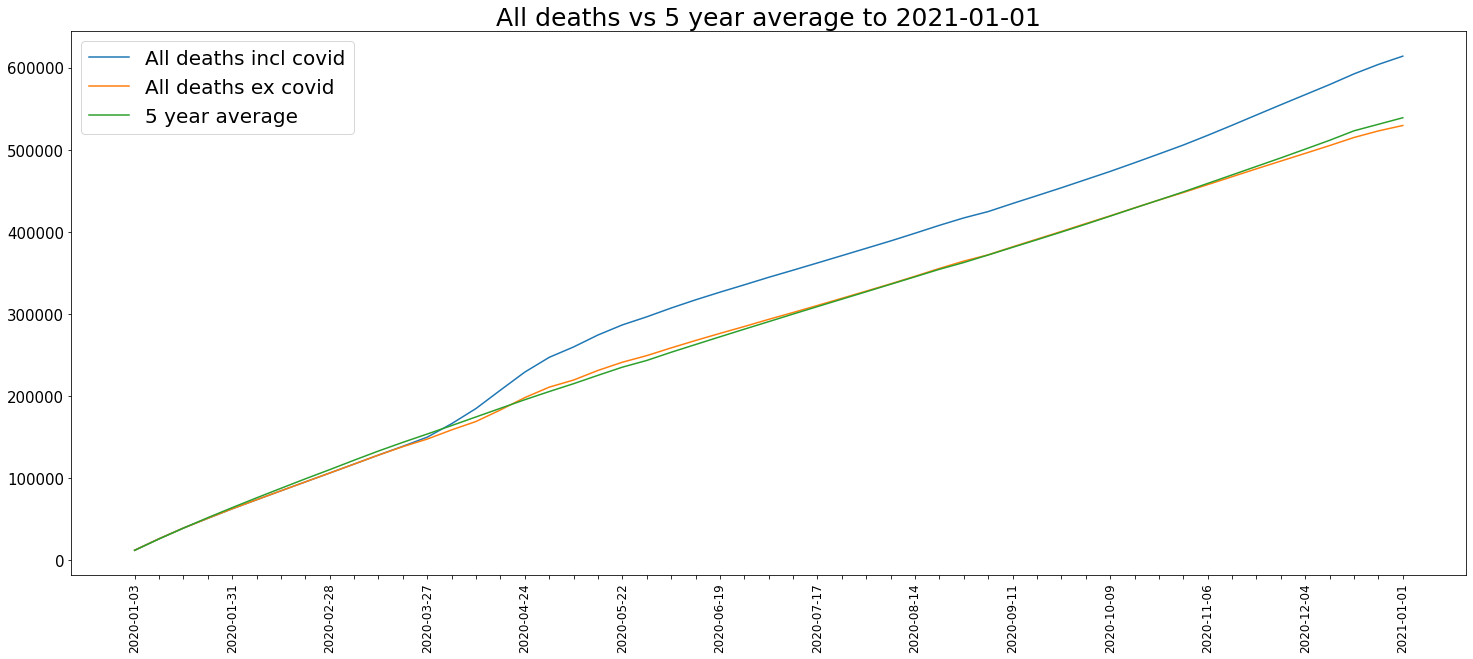

In [193]:
return1, return2, return3 = multiple_line_charts(df_deaths_comp, columns, chart_titles, 'All deaths vs 5 year average to '  + last_date)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [194]:
def one_chart_incl_df(df, column, chart_title, bar, percent):

    # plot 1 chart showing the % value  of STCs/STCM to total resi units on the site

    fig, ax = plt.subplots(figsize=(25,10))

    plt.subplots_adjust(hspace=0.6, wspace=0.2)

    x = df.index.values

    labels = list(df['date'])

    # prevent x-axis labels from overlapping by printing every nth label
    for i in range(4,len(labels),4):
        labels[i-1], labels[i-2], labels[i-3]='','',''

    labels[len(labels)-1]=list(df['date'])[-1]
    labels[len(labels)-2], labels[len(labels)-3], labels[len(labels)-4]='','',''

    y1 = df[column]
    #y2 = df_rightmove['STCs_value_scdhd']/df_rightmove['resi_value_scdhd']
    #y3 = df_rightmove['STCs_value_new']/df_rightmove['resi_value_new']

    ax.set_title(chart_title, fontsize=25)
    ax.set_xticklabels(labels, rotation=90, fontsize=12)
    ax.set_xticks(x)
    
    if percent == 1:
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    
    ax.yaxis.set_tick_params(labelsize=15)
    
    if bar == 1:
        ax.bar(x, y1)
    else:
        ax.plot(x, y1)
        
    #ax.plot(x, y2)
    #ax.plot(x, y3)
    #ax.legend(('New Cases by Specimen Date'),fontsize=20)

    # if savePNG == 1 or PwrptPrep == 1:
    #     savefig = 'Rightmove LD - STCs and STCMs as a % of all resi sale units.png'
    #     plt.savefig(savefig, bbox_inches = 'tight')    
    #     slideTitle.append('Weekly offers on the site as a % of all units')
    #     slideText.append(str(first_data) + ' to '+ str(monthNow))
    #     imagePath.append(savefig)

    start_date = df['date'].iloc[0]
    end_date = df['date'].iloc[-1]
    
    fileName = 'Coviduk - onechart ' + str(chart_title) + '.png'  

    plt.savefig(fileName.split('202')[0] + '.png', bbox_inches = 'tight')
    
    slideTitle_ = chart_title
    slideText_ = (str(start_date) + ' to ' + str(end_date))
    imagePath_ = (fileName.split('202')[0] + '.png')  
    
    plt.show()
    
    return slideTitle_, slideText_, imagePath_

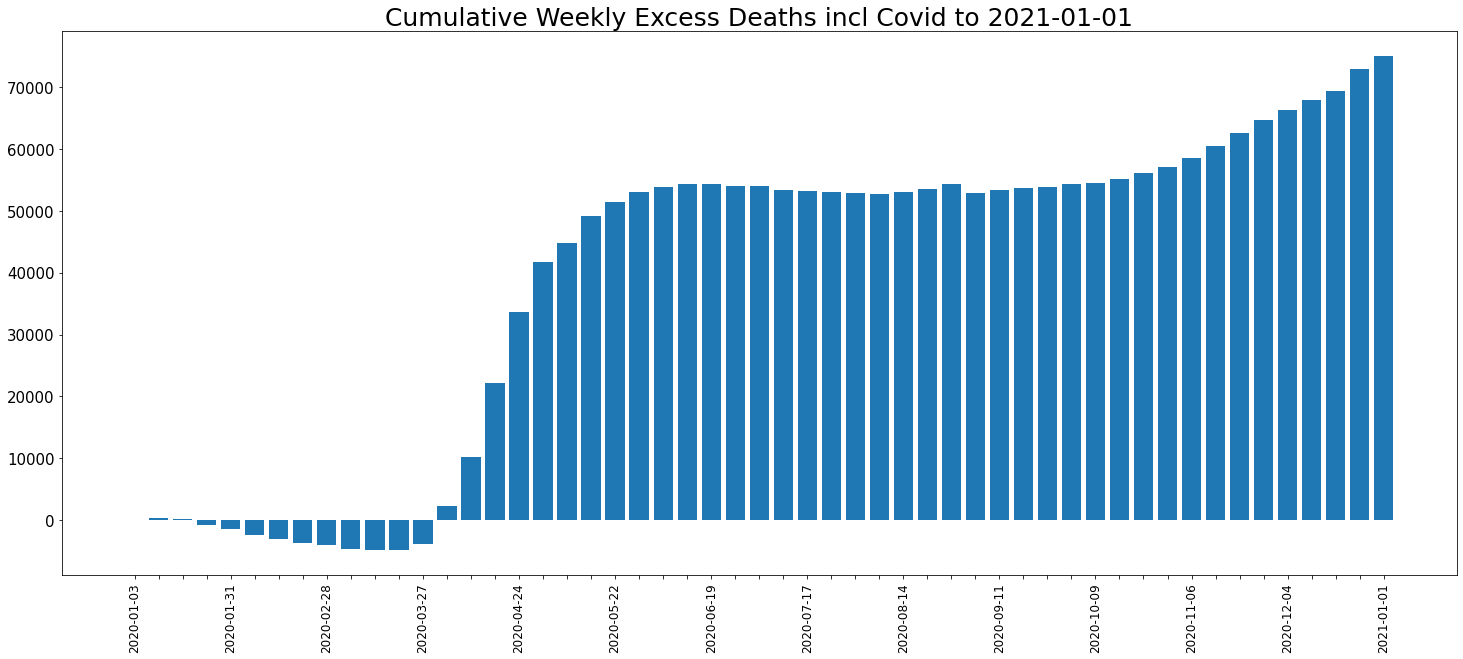

In [195]:
return1, return2, return3 = one_chart_incl_df(df_deaths_comp, 'excess_deaths_incl_covid', 'Cumulative Weekly Excess Deaths incl Covid to '  + last_date,1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

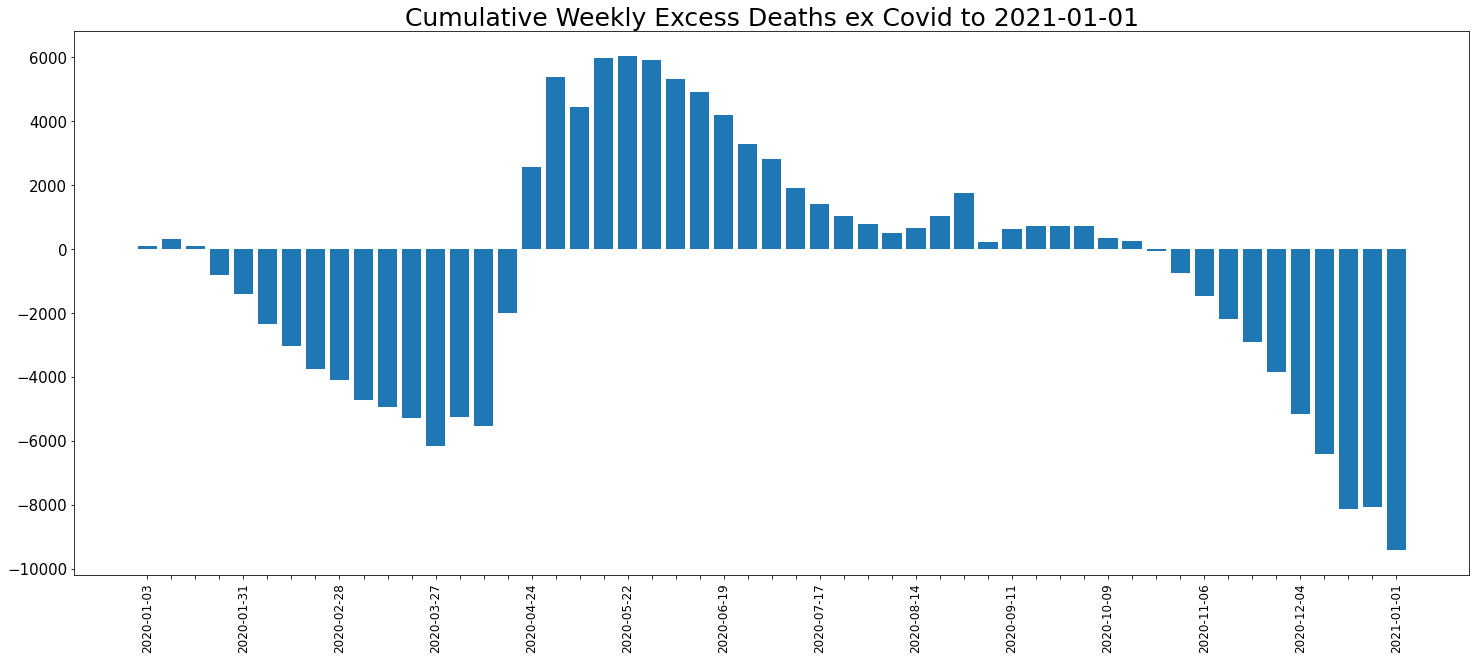

In [196]:
return1, return2, return3 = one_chart_incl_df(df_deaths_comp, 'excess_deaths_ex_covid', 'Cumulative Weekly Excess Deaths ex Covid to '  + last_date,1,0)

slideTitle.append(return1)
slideText.append(return2)
imagePath.append(return3)

In [197]:
df_deaths_comp.tail()

date   <1  1-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  \
48  2020-12-04  0.0  0.0  0.0    0.0    0.0    1.0    3.0    2.0    5.0   
49  2020-12-11  0.0  0.0  0.0    1.0    1.0    1.0    2.0    2.0    9.0   
50  2020-12-18  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    4.0   
51  2020-12-25  0.0  0.0  0.0    0.0    0.0    0.0    3.0    4.0    3.0   
52  2021-01-01  0.0  0.0  1.0    0.0    0.0    0.0    4.0    6.0   10.0   

    40-44  45-49  50-54  55-59  60-64  65-69  70-74  75-79  80-84  85-89  \
48   16.0   18.0   35.0   66.0  106.0  181.0  282.0  431.0  519.0  604.0   
49   10.0   23.0   37.0   70.0  129.0  160.0  235.0  404.0  494.0  589.0   
50   10.0   22.0   44.0   78.0  105.0  172.0  276.0  411.0  617.0  669.0   
51   11.0   27.0   53.0   78.0  130.0  209.0  358.0  455.0  643.0  744.0   
52   12.0   29.0   49.0   87.0  149.0  195.0  327.0  466.0  655.0  759.0   

      90+  nursery  school  university  working  sixties  seventies  eighties  \
48  632.0      0.0     0.0         1.0    145.0    287.0      713.0    1123.0   
49  647.0      0.0     2.0         1.0    153.0    289.0      639.0    1083.0   
50  757.0      0.0     0.0         0.0    158.0    277.0      687.0    1286.0   
51  789.0      0.0     0.0         0.0    179.0    339.0      813.0    1387.0   
52  722.0      0.0     1.0         0.0    197.0    344.0      793.0    1414.0   

    nineties  nursery_cum  school_cum  university_cum  working_cum  \
48     632.0          2.0        15.0            34.0       4454.0   
49     647.0          2.0        17.0            35.0       4607.0   
50     757.0          2.0        17.0            35.0       4765.0   
51     789.0          2.0        17.0            35.0       4944.0   
52     722.0          2.0        18.0            35.0       5141.0   

    sixties_cum  seventies_cum  eighties_cum  nineties_cum  <1_all  1-4_all  \
48       6945.0        16577.0       28194.0       15271.0    50.0      4.0   
49       7234.0        17216.0       29277.0       15918.0    45.0      3.0   
50       7511.0        17903.0       30563.0       16675.0    46.0      5.0   
51       7850.0        18716.0       31950.0       17464.0    33.0      7.0   
52       8194.0        19509.0       33364.0       18186.0    32.0      4.0   

    5-9_all  10-14_all  15-19_all  20-24_all  25-29_all  30-34_all  35-39_all  \
48      3.0        8.0       15.0       27.0       42.0       50.0       88.0   
49     11.0        6.0        8.0       25.0       35.0       58.0       69.0   
50      4.0        5.0       11.0       24.0       38.0       57.0       73.0   
51      5.0        6.0       10.0       21.0       35.0       46.0       70.0   
52      1.0        9.0        8.0       10.0       24.0       27.0       43.0   

    40-44_all  45-49_all  50-54_all  55-59_all  60-64_all  65-69_all  \
48      117.0      200.0      293.0      468.0      568.0      792.0   
49      115.0      190.0      299.0      433.0      603.0      765.0   
50      115.0      189.0      317.0      437.0      581.0      805.0   
51       99.0      179.0      262.0      359.0      515.0      729.0   
52       68.0      123.0      203.0      311.0      449.0      619.0   

    70-74_all  75-79_all  80-84_all  85-89_all  90+_all  nursery_all  \
48     1236.0     1528.0     1975.0     2237.0   2602.0         54.0   
49     1230.0     1619.0     1989.0     2193.0   2596.0         48.0   
50     1246.0     1614.0     2124.0     2439.0   2881.0         51.0   
51     1154.0     1436.0     1892.0     2154.0   2508.0         40.0   
52      990.0     1262.0     1651.0     1980.0   2255.0         36.0   

    school_all  university_all  working_all  sixties_all  seventies_all  \
48        26.0            27.0       1258.0       1360.0         2764.0   
49        25.0            25.0       1199.0       1368.0         2849.0   
50        20.0            24.0       1226.0       1386.0         2860.0   
51        21.0            21.0       1050.0       1244.0         2

In [198]:
# for the presentation, insert a new chapter slide

if savePNG == 1 or PwrptPrep == 1:
    #plt.savefig('Auto Trader - bar chart of Lookers cars on site.png', bbox_inches = 'tight')
    
    slideTitle.append('Data looking at the Vaccine Rollout)')
    slideText.append('')
    imagePath.append('')

plt.show()

In [199]:
df_vac.head()

date  areaType   areaCode        areaName  \
0  2020-12-20  overview  K02000001  United Kingdom   
1  2020-12-27  overview  K02000001  United Kingdom   
2  2021-01-03  overview  K02000001  United Kingdom   
3  2021-01-10  overview  K02000001  United Kingdom   

   cumPeopleVaccinatedFirstDoseByVaccinationDate  \
0                                         663809   
1                                         985479   
2                                        1344152   
3                                        2327671   

   cumPeopleVaccinatedSecondDoseByVaccinationDate  \
0                                               0   
1                                               0   
2                                           20977   
3                                          390487   

   weeklyPeopleVaccinatedFirstDoseByVaccinationDate  \
0                                            633108   
1                                            321670   
2                                            358673   
3                                            983519   

   weeklyPeopleVaccinatedSecondDoseByVaccinationDate  
0                                                  0  
1                                                  0  
2                                              20977  
3                                             369510

In [200]:
last_date = df_vac['date'].iloc[-1]

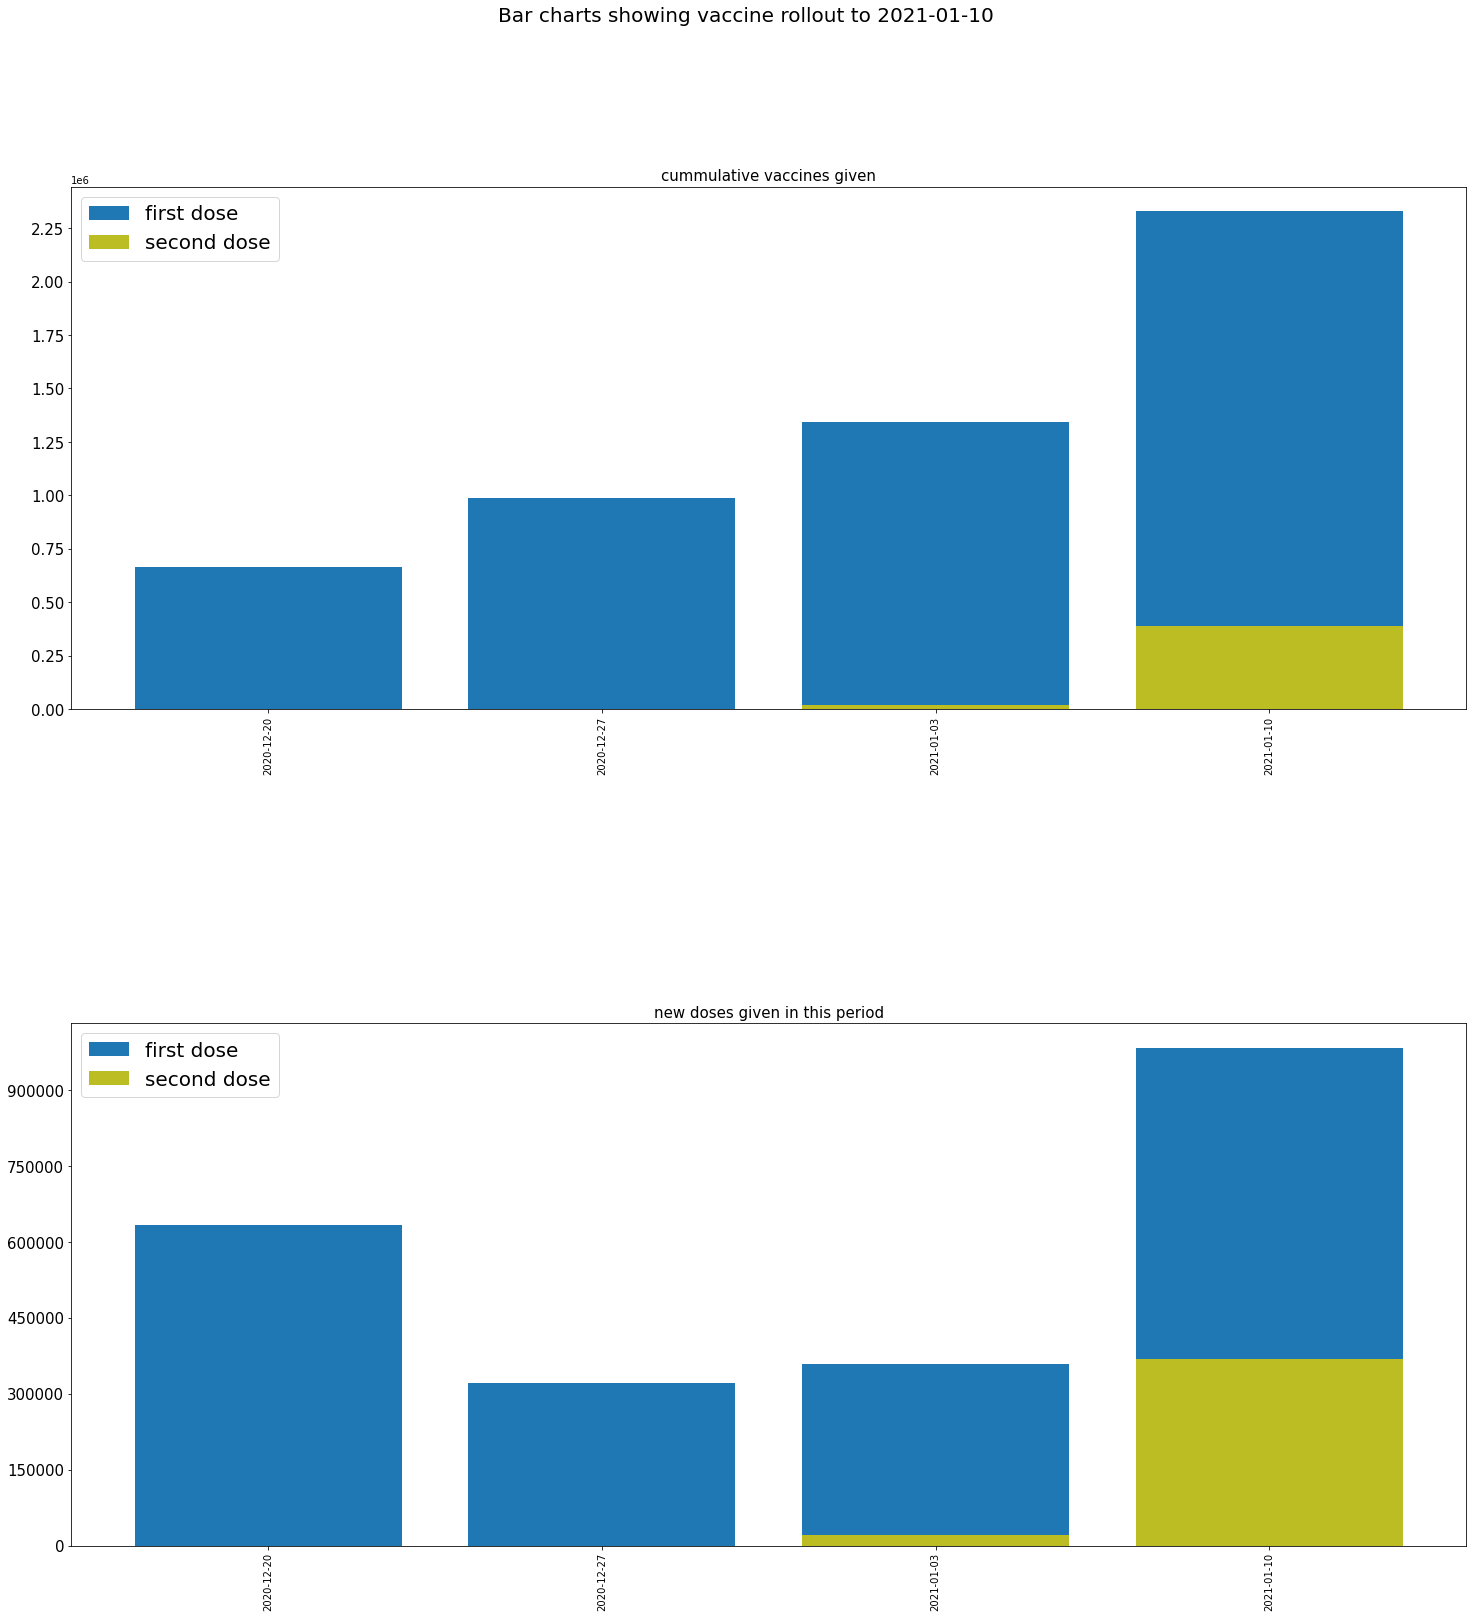

In [201]:
# bar charts showing vaccine rollout

col_names = ['cumPeopleVaccinatedFirstDoseByVaccinationDate', 'cumPeopleVaccinatedSecondDoseByVaccinationDate',
             'weeklyPeopleVaccinatedFirstDoseByVaccinationDate', 'weeklyPeopleVaccinatedSecondDoseByVaccinationDate']

titles = ['cummulative vaccines given', 'new doses given in this period']

#fig, ax = plt.subplots(nrows=int(len(col_names)/3)+1, ncols=3, figsize=(25,25))
fig, ax = plt.subplots(nrows=int(len(col_names)/2), ncols=1, figsize=(25,25))

plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.suptitle('Bar charts showing vaccine rollout to ' + last_date, fontsize = 20)
#plt.suptitle("anything over 'Less than a year' indicates that returning members keep their history", fontsize = 20)

x = df_vac.index.values

labels = list(df_vac['date'])

# for i in range(1,len(labels),2):
#     labels[i-1]=''
# if len(labels) % 2 != 0:
#     labels[-1]=''

for ii in range(0,len(col_names),2):
    #for i in range(len(df)):
    y1 = df_vac[col_names[ii]]
    y2 = df_vac[col_names[ii+1]]
    ax[int(ii/2)].set_title(titles[int(ii/2)], fontsize=15)
    ax[int(ii/2)].set_xticks(x)
    ax[int(ii/2)].set_xticklabels(labels, rotation = 90)
    ax[int(ii/2)].yaxis.set_tick_params(labelsize=15)
    ax[int(ii/2)].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[int(ii/2)].bar(x,y1, color='#1f77b4', label = 'first dose')
    ax[int(ii/2)].bar(x,y2, color='#bcbd22', label = 'second dose')
    #ax[int(ii/3),ii - 3*int(ii/3)].bar(df_deaths_comp['date'][i],y1[i], color='#1f77b4')
    ax[int(ii/2)].legend(fontsize=20)    

start_date = df_vac['date'].iloc[0]
end_date = df_vac['date'].iloc[-1]

if savePNG == 1 or PwrptPrep == 1:
    fileName = 'Coviduk - bar charts vaccine rollout.png'
    
    slideTitle.append('Bar charts showing vaccine rollout to ' + last_date)
    slideText.append(str(start_date) + ' to ' + str(end_date))
    imagePath.append(fileName)

    # need to remove any dates filename when saved as .png given they change
    plt.savefig(fileName, bbox_inches = 'tight')
    
#     slideTitle_ = 'Bar charts cumulative deaths each week by age group to ' + last_date
#     slideText_ = (str(start_date) + ' to ' + str(end_date))
#     imagePath_ = (fileName)  
    
plt.show()

In [202]:
#
# Preparing the presentation
#

In [203]:
if PwrptPrep == 1:
    prs = Presentation('Presentation - template.pptx')
    prs_type = 'agi'
    #prs = Presentation('Presentation - template2.pptx')
    #prs_type = 'plain'

In [204]:
# change the title and date on the front page
# the slide shapes do not go nicely 0,1,2 they go 1,2,0
if PwrptPrep == 1:
    
    #listShapes = [1,2,0]
    
    if prs_type !='plain':
        
        listShapes = [1,2,0]
        for i in range(3):
            slide = prs.slides[0]
            shape = slide.shapes[listShapes[i]]
            text_frame = shape.text_frame
            text_frame.paragraphs[0].runs[0].text = presentationTitle[i]
    
    else:        
        listShapes = [0,1,2]
        for i in range(3):
            slide = prs.slides[0]
            shape = slide.shapes[listShapes[i]]
            text_frame = shape.text_frame
            text_frame.paragraphs[0].text = presentationTitle[i]

In [205]:
# # add the Preamble and Summary slides
# if PwrptPrep == 1:

#     title_Preamble_Summary = ['Preamble', 'Summary']

#     for i in range(2):
#         blank_slide_layout = prs.slide_layouts[15]
#         slide = prs.slides.add_slide(blank_slide_layout)

#         title = slide.shapes.title
#         title.text = title_Preamble_Summary[i]

#         top = height = Inches(1.5)
#         width = Inches(10.25)
#         left = Inches(0.25)
#         txBox = slide.shapes.add_textbox(left, top, width, height)
#         tf = txBox.text_frame
#         tf.word_wrap = True
#         p = tf.add_paragraph()
#         p.level = 1
#         p.text = 'start writing here'

In [206]:
# add the Preamble and Summary slides
if PwrptPrep == 1:

    title_Preamble_Summary = ['Preamble']
    
    for i in range(1):
        if prs_type !='plain':
            blank_slide_layout = prs.slide_layouts[15]
            left_inches = 0.25
            p_level = 1
        else:
            blank_slide_layout = prs.slide_layouts[5]
            left_inches = 0.955
            p_level = 0
        
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = title_Preamble_Summary[i]

        top = height = Inches(1.5)
        width = Inches(10.25)
        left = Inches(left_inches)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        p = tf.add_paragraph()
        p.level = p_level
        if i == 0:
            p.text = 'Daily and some weekly charts showing UK Covid Testing, new cases, hospitalisations including occupied ventilation beds and deaths.  Data Further visualised by age and by region.  End of chart pack has excess deaths and vaccine rollout'
            p = tf.add_paragraph()
            p.level = p_level 
            p.text = 'The charts for England only given i could only find hospital admission by age for England'
            p = tf.add_paragraph()
            p.level = p_level
            p.text = 'All the data for these charts comes from UK government websites'
            p = tf.add_paragraph()
            p.level = p_level
            p.text = 'Some charts are derived from other charts'
            p = tf.add_paragraph()
            p.level = p_level
            p.text = 'For the daily charts, the latest data points are subject to revision as new data is submitted'         
#             p = tf.add_paragraph()
#             p.level = p_level
#             p.text = 'Sources:'
            
#             sources = [
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesBySpecimenDate%22:%22newCasesBySpecimenDate%22,%22cumCasesBySpecimenDate%22:%22cumCasesBySpecimenDate%22%7D&format=csv',
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newDeaths28DaysByDeathDate%22:%22newDeaths28DaysByDeathDate%22,%22cumDeaths28DaysByDeathDate%22:%22cumDeaths28DaysByDeathDate%22%7D&format=csv',
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newAdmissions%22:%22newAdmissions%22,%22cumAdmissions%22:%22cumAdmissions%22%7D&format=csv',
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22hospitalCases%22:%22hospitalCases%22%7D&format=csv',
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22covidOccupiedMVBeds%22:%22covidOccupiedMVBeds%22%7D&format=csv',
#             'https://coronavirus.data.gov.uk/api/v1/data?filters=areaName=United%2520Kingdom;areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newVirusTests%22:%22newVirusTests%22,%22cumVirusTests%22:%22cumVirusTests%22%7D&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newCasesBySpecimenDateAgeDemographics&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=newCasesBySpecimenDateAgeDemographics&metric=newDeaths28DaysByDeathDateAgeDemographics&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=cumAdmissionsByAge&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=cumPeopleVaccinatedFirstDoseByVaccinationDate&metric=cumPeopleVaccinatedSecondDoseByVaccinationDate&metric=weeklyPeopleVaccinatedFirstDoseByVaccinationDate&metric=weeklyPeopleVaccinatedSecondDoseByVaccinationDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000004&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',    
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000006&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000007&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000001&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000001&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000008&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000009&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000005&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
#             'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000003&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',   
#             ]
            
#             for i in range(len(sources)):
#                 p = tf.add_paragraph()
#                 p.level = p_level + 1
#                 p.font.size = Pt(6)
#                 p.text = sources[i]

In [207]:
# add the Preamble and Summary slides
if PwrptPrep == 1:

    title_Preamble_Summary = ['Sources']
    
    for i in range(1):
        if prs_type !='plain':
            blank_slide_layout = prs.slide_layouts[15]
            left_inches = 0.25
            p_level = 1
        else:
            blank_slide_layout = prs.slide_layouts[5]
            left_inches = 0.955
            p_level = 0
        
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = title_Preamble_Summary[i]

        top = height = Inches(1.5)
        width = Inches(10.25)
        left = Inches(left_inches)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        p = tf.add_paragraph()
        p.level = p_level
        if i == 0:
#             p.text = 'Daily and some weekly charts showing UK Covid Testing, new cases, hospitalisations including occupied ventilation beds, deaths.  And also looking at the data by age'
#             p = tf.add_paragraph()
#             p.level = p_level 
#             p.text = 'The charts at the end are for England only given i could only find hospital admission by age for England'
#             p = tf.add_paragraph()
#             p.level = p_level
#             p.text = 'All the data for these charts comes from UK government websites'
#             p = tf.add_paragraph()
#             p.level = p_level
#             p.text = 'Some charts are derived from other charts'
#             p = tf.add_paragraph()
#             p.level = p_level
#             p.text = 'For the daily charts, the latest data points are subject to revision as new data is submitted'         
#             p = tf.add_paragraph()
#             p.level = p_level
#             p.text = 'Sources:'
            
            sources = [
            'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesBySpecimenDate%22:%22newCasesBySpecimenDate%22,%22cumCasesBySpecimenDate%22:%22cumCasesBySpecimenDate%22%7D&format=csv',
            'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newDeaths28DaysByDeathDate%22:%22newDeaths28DaysByDeathDate%22,%22cumDeaths28DaysByDeathDate%22:%22cumDeaths28DaysByDeathDate%22%7D&format=csv',
            'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newAdmissions%22:%22newAdmissions%22,%22cumAdmissions%22:%22cumAdmissions%22%7D&format=csv',
            'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22hospitalCases%22:%22hospitalCases%22%7D&format=csv',
            'https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22covidOccupiedMVBeds%22:%22covidOccupiedMVBeds%22%7D&format=csv',
            'https://coronavirus.data.gov.uk/api/v1/data?filters=areaName=United%2520Kingdom;areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newVirusTests%22:%22newVirusTests%22,%22cumVirusTests%22:%22cumVirusTests%22%7D&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newCasesBySpecimenDateAgeDemographics&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=newCasesBySpecimenDateAgeDemographics&metric=newDeaths28DaysByDeathDateAgeDemographics&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=cumAdmissionsByAge&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=cumPeopleVaccinatedFirstDoseByVaccinationDate&metric=cumPeopleVaccinatedSecondDoseByVaccinationDate&metric=weeklyPeopleVaccinatedFirstDoseByVaccinationDate&metric=weeklyPeopleVaccinatedSecondDoseByVaccinationDate&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000004&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',    
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000006&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000007&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000001&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000001&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000008&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000009&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000005&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',
            'https://api.coronavirus.data.gov.uk/v2/data?areaType=region&areaCode=E12000003&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv',   
            ]
            
            for i in range(len(sources)):
                p = tf.add_paragraph()
                p.level = p_level + 1
                p.font.size = Pt(6)
                p.text = sources[i]

In [208]:
# add the Preamble and Summary slides
if PwrptPrep == 1:

    title_Preamble_Summary = ['Summary']
    
    for i in range(1):
        if prs_type !='plain':
            blank_slide_layout = prs.slide_layouts[15]
            left_inches = 0.25
            p_level = 1
        else:
            blank_slide_layout = prs.slide_layouts[5]
            left_inches = 0.955
            p_level = 0
        
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = title_Preamble_Summary[i]

        top = height = Inches(1.5)
        width = Inches(10.25)
        left = Inches(left_inches)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        p = tf.add_paragraph()
        p.level = p_level


In [209]:
# add the Chapter contents slide and Chapter 1 slide
if prs_type !='plain':

    if PwrptPrep == 1:

        if prs_type !='plain':
            blank_slide_layout = prs.slide_layouts[15]
        else:
            blank_slide_layout = prs.slide_layouts[5]

        slide = prs.slides.add_slide(blank_slide_layout)

        shapes = slide.shapes

        shapes.title.text = 'Contents'

        rows = cols = 2
        left = Inches(0.25)
        top = Inches(1.5)
        width = Inches(1.5)
        height = Inches(1.5)

        table = shapes.add_table(rows, cols, left, top, width, height).table

        # set column widths
        table.columns[0].width = Inches(1.5)
        table.columns[1].width = Inches(2.0)

        tableText = ['01', 'Charts', '02', 'Appendix']
        TableFont = [60, 14, 60, 14]
        tableCell1 = [0,0,1,1]
        tableCell2 = [0,1,0,1]

        for i in range(4):
            table.cell(tableCell1[i], tableCell2[i]).text = tableText[i]
            cell = table.cell(tableCell1[i], tableCell2[i])
            para = cell.text_frame.paragraphs[0]
            para.font.bold = True
            para.font.size = Pt(TableFont[i])
            para.font.color.rgb = RGBColor(0, 55, 129) 
            cell.vertical_anchor = MSO_ANCHOR.MIDDLE
            fill = cell.fill
            fill.background()

        slide = prs.slides.add_slide(prs.slide_layouts[9])
        placeholder = slide.placeholders[1]
        placeholder.text = '01'
        title = slide.shapes.title
        title.text = 'Charts'


In [210]:
# add a blank slide with title, text and saved graphic as per the list of items
if PwrptPrep == 1:
    
    for i in range(len(slideTitle)):

        if prs_type !='plain':
            blank_slide_layout = prs.slide_layouts[15]
            left_inches = 0.25
        else:
            blank_slide_layout = prs.slide_layouts[5]
            left_inches = 0.955
            
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = slideTitle[i]

        top = width = height = Inches(1.5)
        left = Inches(left_inches)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame

        p = tf.add_paragraph()
        p.text = slideText[i]
        p.font.bold = True
        p.font.size = Pt(14)

        left = Inches(left_inches)
        top = Inches(2.5)
        height = Inches(4)
        width = Inches(9)
        if imagePath[i] !='':
            pic = slide.shapes.add_picture(imagePath[i], left, top, width = width, height = height)

In [211]:
# # add the Appendix

if PwrptPrep == 1:
    if prs_type !='plain':
        blank_slide_layout = prs.slide_layouts[15]
    
        slide = prs.slides.add_slide(prs.slide_layouts[9])
        placeholder = slide.placeholders[1]
        placeholder.text = '02'
        title = slide.shapes.title
        title.text = 'Appendix'

In [212]:
# # add the 'First 5 lines of the latest upload slide'

# if PwrptPrep == 1:
    
#     blank_slide_layout = prs.slide_layouts[15]
#     slide = prs.slides.add_slide(blank_slide_layout)

#     shapes = slide.shapes

#     shapes.title.text = 'First 5 lines of most recent uploaded data file'

#     rows = 6
#     cols = 7
#     left = Inches(0.25)
#     top = Inches(1.5)
#     width = Inches(1.5)
#     height = Inches(0.25)

#     table = shapes.add_table(rows, cols, left, top, width, height).table

#     # set column widths
#     table.columns[0].width = Inches(0.5)
#     table.columns[1].width = Inches(2.5)
#     table.columns[2].width = Inches(2.5)
#     table.columns[3].width = Inches(1.0)
#     table.columns[4].width = Inches(1.5)
#     table.columns[5].width = Inches(1.0)
#     table.columns[6].width = Inches(1.0)
    
#     tableText = ['']
    
#     # table headers
#     for col in df[-1].columns[0:cols-1]:
#         tableText.append(col)
    
#     # populate rest of list with dataframe cells
#     for i in range((rows-1) * (cols-1)):
#         if i%(cols-1) == 0:
#             tableText.append(str(int(i/(cols-1))))          
#         tableText.append(str(df[-1].iat[int(i/(cols-1)), i%(cols-1)]))

#     for i in range((rows) * cols):
#         table.cell(int(i/(cols)), i%cols).text = tableText[i]
#         cell = table.cell(int(i/(cols)), i%cols)
#         para = cell.text_frame.paragraphs[0]
#         if i%cols == 0 or int(i/cols) == 0:
#             para.font.bold = True
#         else:
#             para.font.bold = False
#         para.font.size = Pt(10)
#         para.font.color.rgb = RGBColor(0, 0, 0) 
#         cell.vertical_anchor = MSO_ANCHOR.MIDDLE
#         fill = cell.fill
#         fill.background()
        

In [213]:
# # and the 'Code used to gather page', rotate the text
# # and upload the Python, github and Pandas pages

# if PwrptPrep == 1:
    
#     # list of appendix text files to take from my PC to be put into slides
#     appendixTitleList = ['Code used to gather the checkatrade data',
#                          'Appendix: Python Programming Language','Appendix: Github','Appendix: Pandas']
#     appendixFileList = ['Presentation - code checkatrade.txt',
#                         'Presentation - Python Slide.txt','Presentation - Github Slide.txt','Presentation - Pandas Slide.txt']
#     appendixFileList_alt = []
#     for element in appendixFileList:
#         appendixFileList_alt.append('C:/Users/andre/OneDrive/Documents/Big Data Project/Jupyter Notebook Items/' + element)
    
#     for i in range(len(appendixTitleList)):
#         blank_slide_layout = prs.slide_layouts[15]
#         slide = prs.slides.add_slide(blank_slide_layout)
#         title = slide.shapes.title
#         title.text = appendixTitleList[i]
#         try:
#             lines = [line.rstrip('\n') for line in open(appendixFileList[i])]
#         except:
#             lines = [line.rstrip('\n') for line in open(appendixFileList_alt[i])]
        
#         if (appendixTitleList[i] == 'Code used to gather the checkatrade data'): # rotate the text code -90
#             top = height = Inches(1.25)
#             width = Inches(10.25)
#             left = Inches(-4.25)
#             txBox = slide.shapes.add_textbox(left, top, width, height)
#             txBox.rotation = -90            
#         else: # other slides are normal
#             top = height = Inches(1.25)
#             width = Inches(10.25)
#             left = Inches(0.25)
#             txBox = slide.shapes.add_textbox(left, top, width, height)
#             txBox.rotation = 0
            
#         tf = txBox.text_frame
#         tf.word_wrap = True
        
#         for ii in range(len(lines)):
#             p = tf.add_paragraph()
#             p.level = 1
        
#             if (appendixTitleList[i] == 'Code used to gather the checkatrade data'): # reduce the font size
#                 p.font.size = Pt(8)
#                 p.level = 0  
#             else:
#                 txBox.rotation = 0
#                 p.font.size = Pt(12)            
            
#             if 'https' in lines[ii]:
#                 r = p.add_run()
#                 r.text = lines[ii].split('https')[0]
#                 r1 = p.add_run()
#                 r1.text = 'https' + lines[ii].split('https')[1]        
#                 hlink = r1.hyperlink
#                 hlink.address = r1.text
#             else:
#                 p.text = lines[ii]


In [214]:
# add closing slide

if PwrptPrep == 1:
    if prs_type !='plain':
        blank_slide_layout = prs.slide_layouts[40]
        slide = prs.slides.add_slide(blank_slide_layout)

In [215]:
# save completed presentation to file using name diven in the slide name cell
if PwrptPrep == 1:

    prs.save(saveFileName)

In [216]:
#
# all the slide types
# only to be run for reference
#

In [217]:
# prs = Presentation('Persentation - template.pptx')

In [218]:
# for i in range(43):

#     blank_slide_layout = prs.slide_layouts[i]
#     slide = prs.slides.add_slide(blank_slide_layout)

In [219]:
# prs.save('presentationPrep - all the slides.pptx')